# Regression Predict - Team EG3: Intelli Data

© Explore Data Science Academy

---
### Honour Code

I {**Christelle Coetzee, Destiny Owobu, Anthonia Omonayin, Edidiong Michael Udofia, Mashako Justice Manyelo, Pricilla Vhafuniwa Ndou**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents
<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages & Loading the Data</a>

<a href=#three>3. Data Overview & Data Cleaning</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Conclusion</a>

<a href=#ten>10. Appendix A: Model Deployment via API</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Introduction ⚡ |
| :--------------------------- |
| In this section we will discuss the 'why' and the 'how' of this project. |

---

## Intelli Data

![LOGO 2 WHITE.png](<attachment:LOGO 2 WHITE.png>)
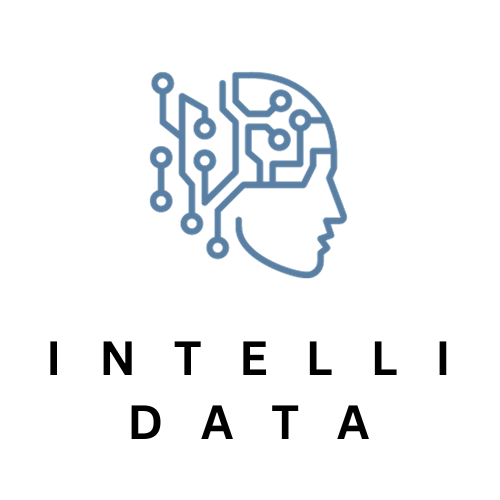

#### **1.1. About Us**:

Intelli Data is a cutting-edge data analysis company dedicated to transforming raw data into actionable insights. We were established in the year 2005, and since have rapidly become a leading player in the data analytics industry, providing robust solutions to businesses across diverse sectors.

#### **1.2. Our Brand**:

**MISSION:** 

Our mission is to empower organizations with data-driven decision-making capabilities. We believe that every piece of data holds untapped potential, and by employing advanced analytics and cutting-edge technologies, we strive to unlock valuable insights that drive innovation, efficiency, and success for our clients.

**VISION:**  

We envision a future where data is seamlessly integrated into every aspect of business operations. We aim to be a catalyst for positive change, where organizations harness the power of data to not only stay competitive but to lead and innovate in their respective industries.

**VALUES:** 
- Accuracy, 
- Innovation, 
- Integrity, 
- Service Excellence, 
- Continuous Learning, 
- Collaboration, 
- Client-Centric Approach.  

These values guide our actions and decisions as we strive to fulfill our mission and vision. 

#### **1.4. Project Overview**:

Spain faces an energy shortage, primarily due to an over-reliance on non-renewable sources. In the graph below, you can see the raise of energy use as well as a raise of energy prices. To address this vulnerability, Disaster Resilience Solution (DRS) sought our expertise. 

Armed with detailed meteorological data and historical energy shortfalls during adverse weather, our goal is to create predictive models. These models anticipate energy shortfalls during severe weather, like heatwaves, as well as the times shortfalls are more prominant.

Accurate predictions empower the agency to proactively allocate resources, prioritize regions, and deploy emergency teams. The objective is to minimize disruptions and enhance the resilience of energy supply systems during natural disasters. 

Our overarching aim is to mitigate the impact of energy shortages and contribute to a more resilient and sustainable energy infrastructure.

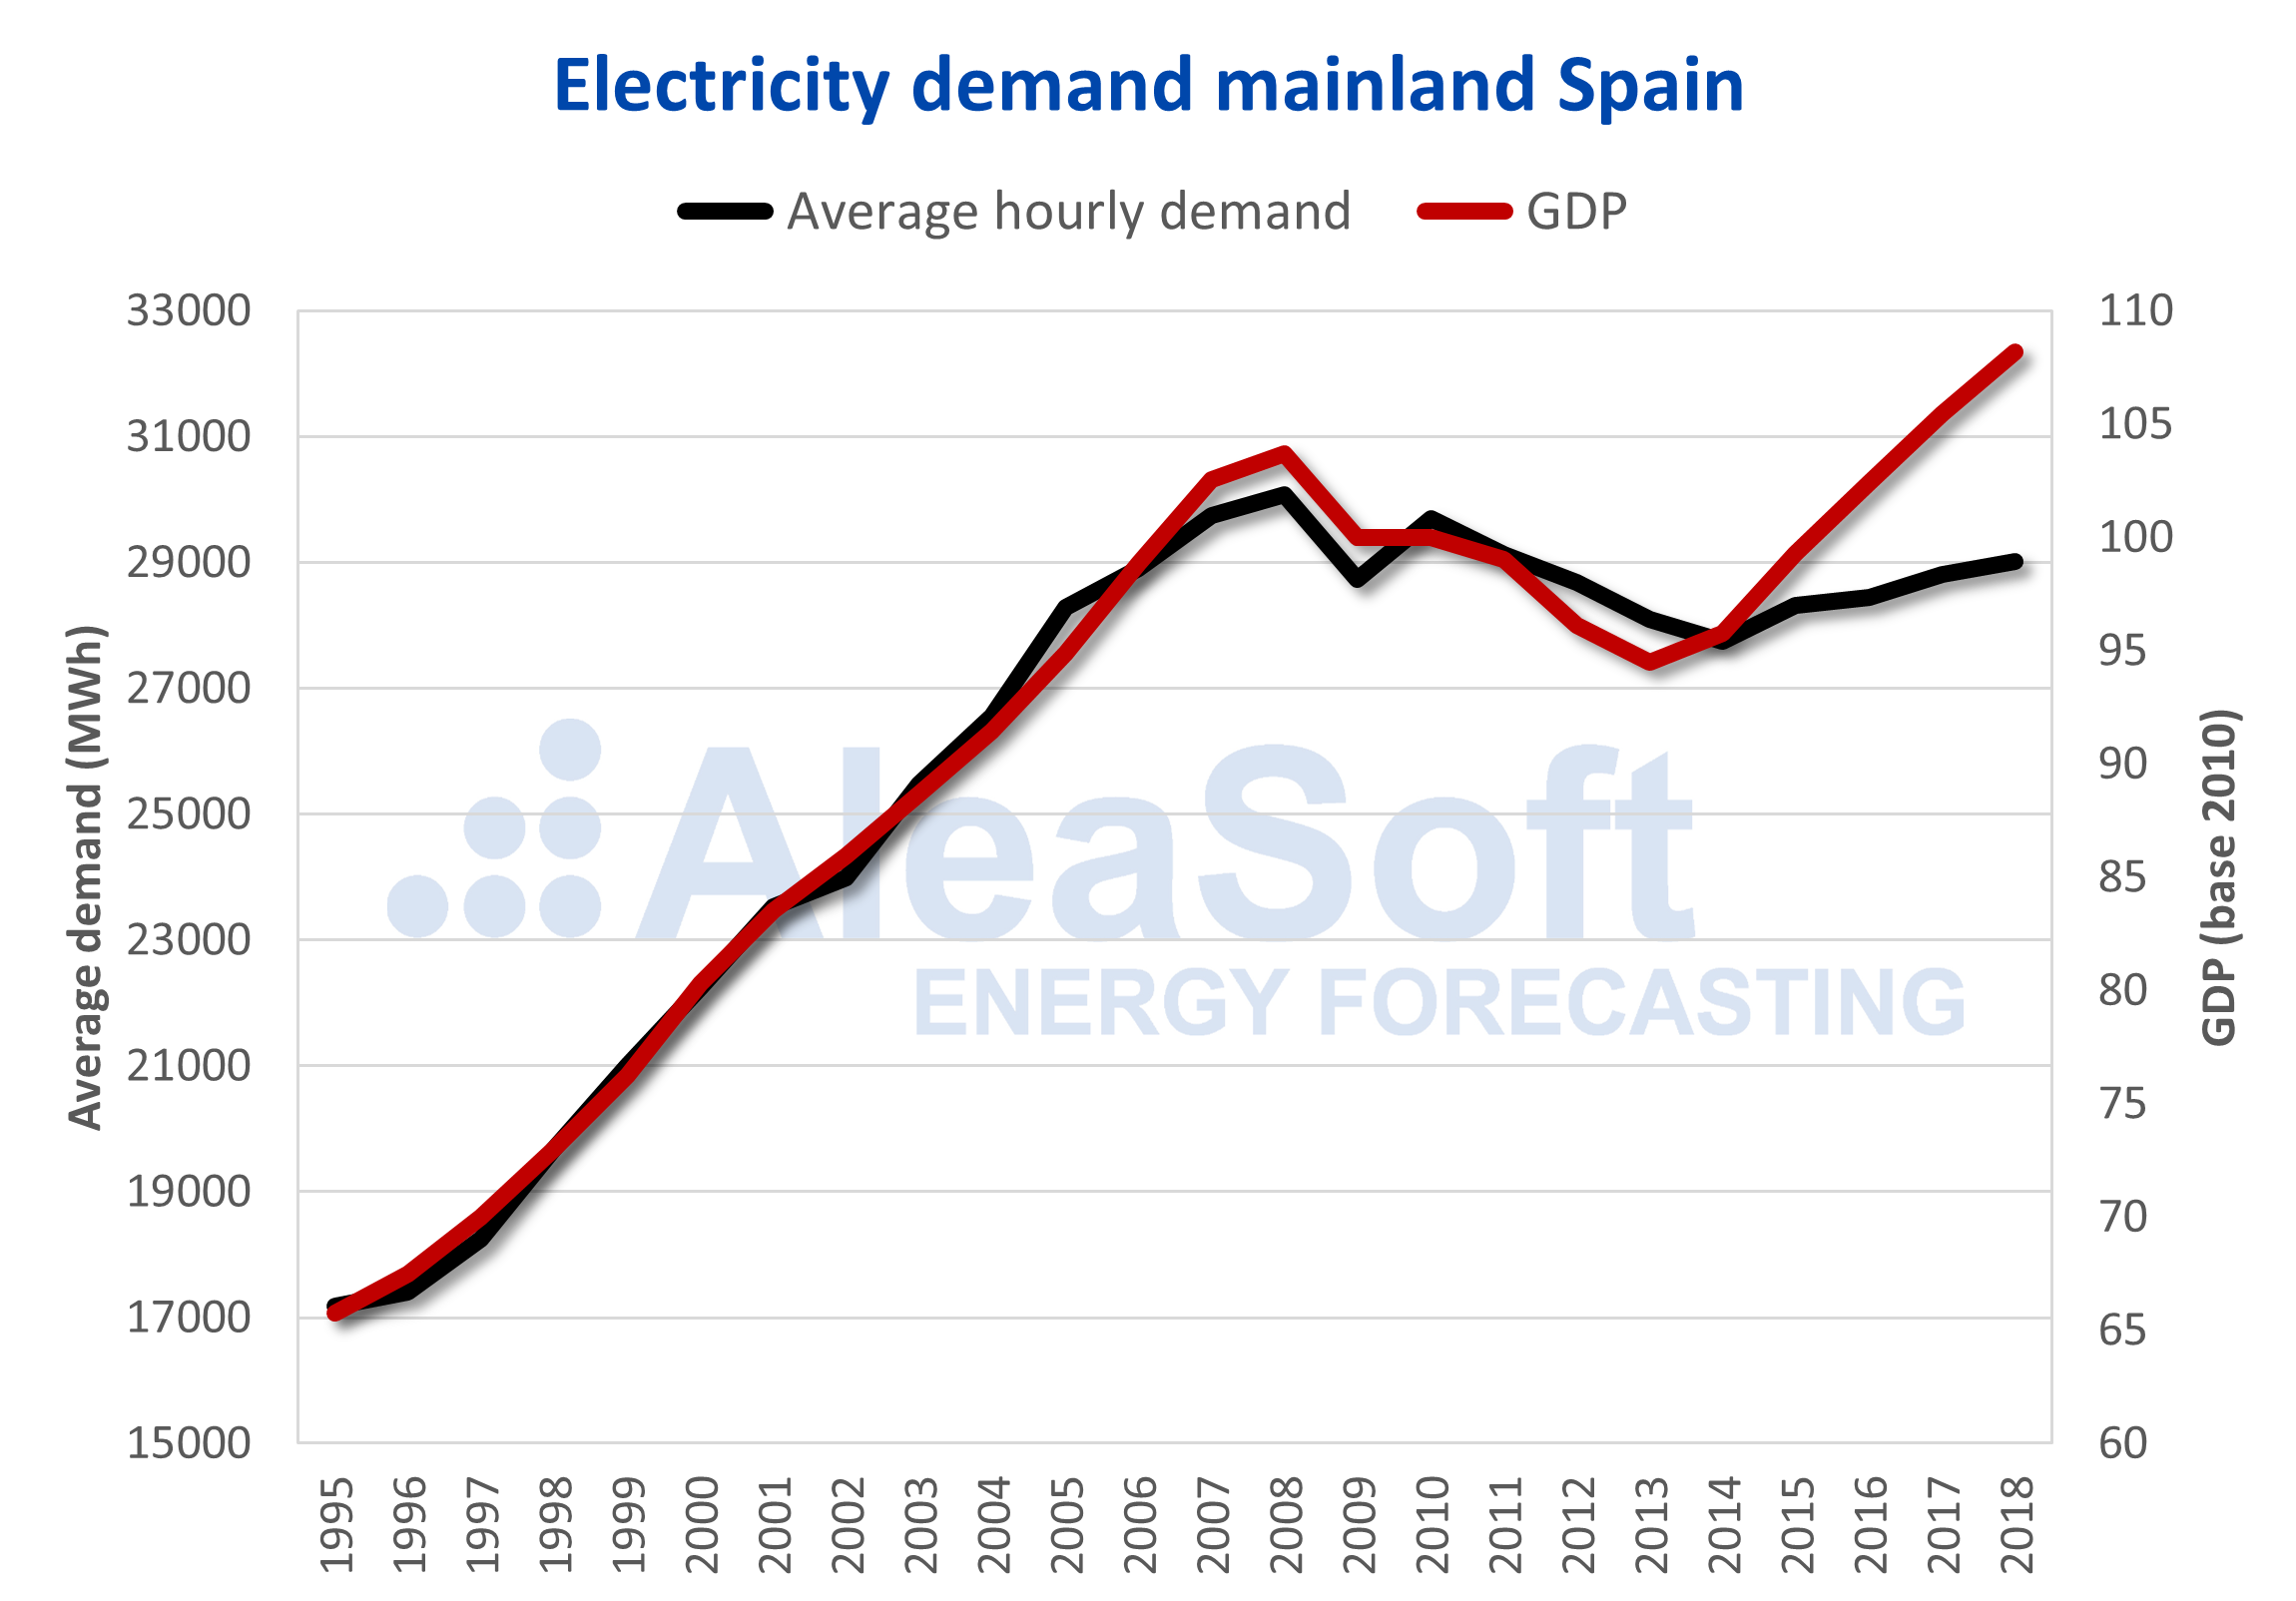
*https://aleasoft.com/energy-efficiency-increased-after-economic-crisis/*

 <a id="two"></a>
## 2. Importing Packages & Loading Data
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages & Loading the Data⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. Furthermore, we will load the data from the `df_train` file, as well as the `df_test` file, into a DataFrame. |

---

#### **2.1. Importing Packages**:

In [1606]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

# Libraries that helps with statistical methods and visualizations
from  scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence as influence
from sklearn.tree import plot_tree

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
import catboost as cb 
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
import pickle

# Setting global constants to ensure notebook results are reproducible
TRAIN_TEST_VAR = 0.2 #Variable indicating the ratio of Training to Testing data when splitting datasets for validation
RAND_STATE = 42 #Variable used to determine random state of methods in order to replicate model training results

**Python environment:**

- catboost==1.2.2
- pandas-dq==1.28
- pandas-profiling==3.6.6
- pep8==1.7.1
- scikit-learn-intelex==2021.20221004.171935
- scipy==1.9.1
- statsmodels==0.13.2
- xgboost==2.0.0

#### **2.2. Loading the Data**:

In [1607]:
df = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Data Overview & Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Overview & Data Cleaning⚡ |
| :--------------------------- |
| In this section we will look at the data and determine if there are any missing values, redundant variables, or object data that need to be converted into numerical data. |

---

#### **3.1. Data Overview**:

We employ the `head()` function to examine the initial two rows of our dataset. This preliminary inspection enables us to discern the nature of our data effectively. Through this examination, we classify columns into distinct categories: categorical and numerical. Presently, our dataset comprises a specific number of columns in each category, providing valuable insights into the composition of our data. This meticulous categorization forms the foundation for our subsequent data preprocessing and modeling endeavors.

In [1608]:
df.head(2)

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0                1.0  ...       265.938000      281.013000   
1                0.0                1.0  ...       266.386667      280.561667   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  

[2 rows x 49 columns]

In reviewing the provided dataframe, several key observations come to light:

- There is an `Unnamed: 0 column`, which appears to duplicate the dataframe's index.
- The time column captures the date and time corresponding to the data collection instances.
- The dataset contains multiple weather-related variables from various cities across Spain.
- Notably, the predictor variables are followed by our target variable, `load_shortfall_3h`, which occupies the final column in our dataframe. This structured arrangement facilitates a clear distinction between predictor and target variables, crucial for subsequent analysis and modeling endeavors.

The `shape()` function is employed to ascertain the dimensions of our data. Specifically, this method provides us with the count of rows and columns present in the dataset. Understanding the size of our dataset is fundamental to structuring our analysis and implementing appropriate data processing techniques.

In [1609]:
df.shape 

(8763, 49)

In [1610]:
df_test.shape 

(2920, 48)

Upon applying the `shape()` function, it is revealed that our dataset comprises 8763 rows and 49 columns. It is important to note that the test train dataset only has 2920 rows and 48 colums, since it doen't include our y-variable, `load_shortfall_3h`. This comprehensive understanding of the dataset's dimensions serves as a cornerstone for our subsequent data analysis, feature engineering, and model development processes.

Given the expansive nature of our dataset with 49 columns, it is impractical to visualize all the columns simultaneously. To gain insight into the available features, we employ the `df_train.columns` attribute. This allows us to view the names of all the columns, providing a concise overview of the variables at our disposal.

In [1611]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

We utilize the `info()` function. This method offers a comprehensive summary of our dataset, providing crucial information such as the presence of categorical and numerical features, as well as detecting any null or missing values. By leveraging this function, we ensure a thorough understanding of our data's structure, enabling us to address potential data inconsistencies and prepare a clean, reliable dataset for our analytical and modeling endeavors.

In [1612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In our comprehensive data summary, several key insights emerge:

- The majority of our data is numeric, although exceptions include the time, `Valencia_wind_deg`, and `Seville_pressure` columns.
- Our dataset comprises 8763 entries and encompasses 49 columns, with `load_shortfall_3h` serving as the target variable.
- Notably, upon closer inspection, it becomes apparent that the `Valencia_pressure` column contains fewer non-null values, suggesting the presence of missing data for this particular variable.

To facilitate a robust Exploratory Data Analysis (EDA), it is imperative to conduct preliminary data cleaning and feature engineering within our dataframe. 

#### **3.2. Data Cleaning**:

##### 3.2.1. Remove missing and redundant features in both the `train` and `test` datasets:

To maintain a clear demarcation between the cleaned and original datasets, we will create a new dataset named `df_clean`. This separation ensures that our cleaned data remains distinct and preserved, allowing us to conduct analysis and modeling on a curated dataset while retaining the integrity of the original data for reference and comparative purposes.

In [1613]:
df_clean = df

##### *3.2.1.1. Remove redundant values:*

Our initial cleaning step involves the removal of the `Unnamed: 0` column, which is redundant given the presence of an existing indexing column. This elimination optimizes the structure of our dataset, enhancing clarity and simplifying subsequent data analysis and modeling processes.

In [1614]:
df_clean.drop(columns=['Unnamed: 0'], inplace=True)

In [1615]:
df_test.drop(columns=['Unnamed: 0'], inplace=True)

##### *3.2.1.2. Replace null values:*

As a part of our data cleansing process, we will address the null values in the `Valencia_pressure` column. To do so, we will replace these missing values with the mode of the column. Utilizing the mode as the replacement strategy is appropriate for 'pressure' variables, as it signifies the most frequently occurring value and aligns with the nature of the data. This approach ensures the integrity of our dataset by imputing missing values with the most representative and common pressure reading.

In [1616]:
print('Mode:') 
print(df['Valencia_pressure'].mode())

Mode:
0    1018.0
Name: Valencia_pressure, dtype: float64


In [1617]:
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [1618]:
df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

To validate the success of our data cleaning procedure, we can use the `df_clean['Valencia_pressure'].isnull().sum()` function. This expression allows us to check if there are any remaining null values specifically within the `Valencia_pressure` column of the cleaned dataset. 

In [1619]:
vptr = df_clean.Valencia_pressure.isnull().sum()

print('Valencia_pressure in the train dataset now has ' + str(vptr) + ' missing values.')

Valencia_pressure in the train dataset now has 0 missing values.


In [1620]:
vpts = df_test.Valencia_pressure.isnull().sum()

print('Valencia_pressure in the test dataset now has ' + str(vpts) + ' missing values.')

Valencia_pressure in the test dataset now has 0 missing values.


A zero count of null values in this column confirms the effectiveness of our imputation method, ensuring the absence of missing data in the specified column after our cleaning process.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Engineering ⚡ |
| :--------------------------- |
| In this section we will create new features. |

---

#### **4.1. Create New Features**:

##### 4.1.1. Covert `time` into datetime:

As part of feature engineering, we will transform the `time` column into a datetime format. This conversion is essential for working with temporal data, allowing us to perform time-based analysis and modeling. By converting the `time` column to datetime format, we enhance the usability of this information, enabling more sophisticated insights into our dataset.

In [1621]:
df_clean['time'] = pd.to_datetime(df_clean['time'])

In [1622]:
df_test['time'] = pd.to_datetime(df_test['time'])

As an additional feature, we will create a new variable that represents the hour of the day based on the `time` column. Extracting the hour information is valuable for time-based analysis, allowing us to discern patterns and trends related to specific hours. This new variable will provide a granular perspective on our data, enhancing our ability to explore time-sensitive relationships within the dataset.

In [1623]:
df_clean['hourofday'] = df_clean['time'].dt.hour

In [1624]:
df_test['hourofday'] = df_test['time'].dt.hour

To ensure the successful transformation, we can use the `df_clean['hourofday']` function and confirm that the data is now represented as integers. This verification step ensures that the `hourofday` variable has been correctly processed and is in the desired integer data type, enabling seamless integration into our analysis and modeling workflows.

In [1625]:
df_clean['hourofday']

0        3
1        6
2        9
3       12
4       15
        ..
8758     9
8759    12
8760    15
8761    18
8762    21
Name: hourofday, Length: 8763, dtype: int64

In [1626]:
df_test['hourofday']

0        0
1        3
2        6
3        9
4       12
        ..
2915     9
2916    12
2917    15
2918    18
2919    21
Name: hourofday, Length: 2920, dtype: int64

We can confirm that the `hourofday` variable is now is `int64` data type.

##### 4.1.2. Seperate the `time` and `date`:

As part of data preprocessing, we will split the `time` column into separate `date` and `time` columns. This separation allows us to independently analyze date-related patterns. By organizing the data in this manner, we enhance the granularity of our analysis, enabling more focused exploration of temporal aspects in our dataset.

In [1627]:
df_clean['date'] = df_clean['time'].dt.date
df_clean['time'] = df_clean['time'].dt.time

In [1628]:
df_test['date'] = df_test['time'].dt.date
df_test['time'] = df_test['time'].dt.time

##### 4.1.3. Covert `date` into datetime:

To facilitate proper handling and analysis of the `date` column, we will convert it into datetime format. This conversion ensures that date-related operations can be performed accurately, allowing for meaningful temporal analysis and modeling.

In [1629]:
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [1630]:
df_test['date'] = pd.to_datetime(df_test['date'])

##### 4.1.3. Seperate `date` Into `year`, `month`, `day`, and `season`:

As part of our data processing, we will extract the `year`, `month`, and `day` information from the `date` column. This extraction process will yield separate variables representing the year, month, and day, allowing for detailed temporal analysis at different levels of granularity. By extracting these components, we enhance our ability to explore and understand date-related patterns within the dataset.

In [1631]:
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['day'] = df_clean['date'].dt.day

In [1632]:
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day

In the process of data preparation, a function has been defined to rigorously classify months into distinct seasonal categories. This meticulous categorization is essential for precise temporal analysis, allowing for in-depth exploration of seasonal patterns within the dataset.

In [1633]:
def get_season(month):
    if month in [3, 4, 5]:  # Spring: March (3) to May (5)
        return 2 # 2 = spring, coverted to an int for workability
    elif month in [6, 7, 8]:  # Summer: June (6) to August (8)
        return 3 # 3 = summer, coverted to an int for workability
    elif month in [9, 10, 11]:  # Autumn: September (9) to November (11)
        return 4 # 4 = autumn, coverted to an int for workability
    else:  # Winter: December (12), January (1), February (2)
        return 1 # 1 = winter, coverted to an int for workability

As a strategic step in our data transformation process, we have applied the meticulously crafted function to create a new column named `season`.

In [1634]:
df_clean['season'] = df_clean['month'].apply(get_season)

In [1635]:
df_test['season'] = df_test['month'].apply(get_season)

We have created a new dataframe featuring key temporal attributes. This includes the `year`, `month`, `day`, and `season` columns, meticulously extracted and classified from the original dataset. This refined dataframe serves as a comprehensive temporal representation of our data, providing essential granularity for our analytical pursuits. The inclusion of these structured features enhances our dataset's depth, ensuring it is poised for rigorous exploration and advanced modeling methodologies.

##### 4.1.4. Remove the `time` and `date` columns:

In our meticulous data preparation, we have identified both the `time` and `date` columns as redundant following the creation of more granular temporal features such as `hourofday`, `year`, `month`, `day`, and `season`. Consequently, we have prudently removed these redundant columns. This strategic decision streamlines our dataset, eliminating unnecessary information and promoting a streamlined, efficient structure. By eliminating these superfluous columns, we enhance the precision and focus of our data, reinforcing its readiness for advanced analytical methodologies and modeling processes.

In [1636]:
df_clean.drop(columns=['time'], inplace=True)

In [1637]:
df_test.drop(columns=['time'], inplace=True)

In [1638]:
df_clean.drop(columns=['date'], inplace=True)

In [1639]:
df_test.drop(columns=['date'], inplace=True)

In order to validate the applied enhancements, we will meticulously examine the initial two rows of the refined dataframe. This critical step ensures the accuracy and integrity of our data processing procedures, setting the stage for a robust and reliable modeling process.

In [1640]:
df_clean.head(2)

Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667           level_5             0.0             0.666667   
1           0.333333          level_10             0.0             1.666667   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0                1.0   
1         78.333333        64.666667                0.0                1.0   

   Seville_clouds_all  Bilbao_wind_deg  ...  Bilbao_temp_max  \
0                 0.0       223.333333  ...       269.338615   
1                 0.0       221.000000  ...       270.376000   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h  \
0        274.254667   265.938000       265.938000        6715.666667   
1        274.945000   266.386667       266.386667        4171.666667   

  hourofday  year  month  day  season  
0         3  2015      1    1       1  
1         6  2015      1    1       1  

[2 rows x 52 columns]

In [1641]:
df_test.head(2)

Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           5.000000           level_8             0.0             5.000000   
1           4.666667           level_8             0.0             5.333333   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0              87.0        71.333333               20.0           3.000000   
1              89.0        78.000000                0.0           3.666667   

   Seville_clouds_all  Bilbao_wind_deg  ...  Barcelona_temp_min  \
0                 0.0       193.333333  ...          286.816667   
1                 0.0       143.333333  ...          283.483333   

   Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min hourofday  \
0           285.15            283.15   279.866667           279.15         0   
1           284.15            281.15   279.193333           278.15         3   

   year  month  day  season  
0  2018      1    1       1  
1  2018      1    1       1  

[2 rows x 51 columns]

When scrolling to the conclusion of the dataset, one can observe the integration of the newly created columns.

##### 4.1.5. Convert `Valencia_wind_deg` into an `int`:

To refine the `Valencia_wind_deg` column further, we will extract only the numerical values.

In [1642]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

In [1643]:
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')

Next, we will transform the `Valencia_wind_deg` column to a numeric data type. his conversion ensures uniform numerical representation, aligning with the data type requirements for precise analysis and modeling.

In [1644]:
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

In [1645]:
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])

To validate the successful transformation, we will conduct a verification check to confirm the `Valencia_wind_deg` column has been converted to the numeric data type.

In [1646]:
df_clean.Valencia_wind_deg

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

In [1647]:
df_test.Valencia_wind_deg

0        8
1        8
2        7
3        7
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 2920, dtype: int64

As evident from the current data representation, the `Valencia_wind_deg` column has been successfully transformed into an integer data type. This confirmation reaffirms the accuracy of our data processing steps, ensuring a seamless transition to a numeric format.

##### 4.1.6. Convert `Seville_pressure` into an `int`:

To refine the `Seville_pressure` column further, we will extract only the numerical values.

In [1648]:
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')

In [1649]:
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)')

Next, we will transform the `Seville_pressure` column to a numeric data type. his conversion ensures uniform numerical representation, aligning with the datatype requirements for precise analysis and modeling.

In [1650]:
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])

In [1651]:
df_test['Seville_pressure'] = pd.to_numeric(df_test['Seville_pressure'])

To validate the successful transformation, we will conduct a verification check to confirm the `Seville_pressure` column has been converted to the numeric data type.

In [1652]:
df_clean.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

In [1653]:
df_test.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 2920, dtype: int64

As evident from the current data representation, the `Seville_pressure` column has been successfully transformed into an integer data type. This confirmation reaffirms the accuracy of our data processing steps, ensuring a seamless transition to a numeric format.

#### **4.2 Engineer Existing Features**:

##### 4.1.1. Change the order of the columns:

As a part of our data organization strategy, we will rearrange the columns based on the cities for enhanced convenience and readability. This restructuring will optimize the presentation of our data, ensuring a logical and intuitive arrangement. Crucially, we will preserve the predictive, `load_shortfall_3h`, at the very end of the dataset. This meticulous ordering not only fosters clarity but also facilitates streamlined data interpretation and analysis, setting the stage for effective modeling and insights extraction.

In [1654]:
desired_column_order = ['season' ,'year', 'month', 'day', 'hourofday', 'Barcelona_weather_id' , 'Barcelona_wind_speed', 
                        'Barcelona_wind_deg' , 'Barcelona_temp', 'Barcelona_temp_min', 'Barcelona_temp_max' , 'Barcelona_rain_1h', 
                        'Barcelona_rain_3h' , 'Barcelona_pressure', 'Bilbao_weather_id' , 'Bilbao_wind_speed' , 'Bilbao_wind_deg' , 
                        'Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure',
                        'Bilbao_clouds_all', 'Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' ,
                        'Madrid_rain_1h' , 'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity', 'Seville_weather_id' , 'Seville_wind_speed' , 
                        'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 'Seville_rain_3h' , 'Seville_pressure' , 
                        'Seville_clouds_all' , 'Seville_humidity', 'Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 
                        'Valencia_temp_min' , 'Valencia_snow_3h' , 'Valencia_pressure', 'Valencia_humidity', 'load_shortfall_3h']
df_clean = df_clean[desired_column_order]

In [1655]:
desired_column_order_test = ['season' ,'year', 'month', 'day', 'hourofday', 'Barcelona_weather_id' , 'Barcelona_wind_speed', 
                        'Barcelona_wind_deg' , 'Barcelona_temp', 'Barcelona_temp_min', 'Barcelona_temp_max' , 'Barcelona_rain_1h', 
                        'Barcelona_rain_3h' , 'Barcelona_pressure', 'Bilbao_weather_id' , 'Bilbao_wind_speed' , 'Bilbao_wind_deg' , 
                        'Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure',
                        'Bilbao_clouds_all', 'Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' ,
                        'Madrid_rain_1h' , 'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity', 'Seville_weather_id' , 'Seville_wind_speed' , 
                        'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 'Seville_rain_3h' , 'Seville_pressure' , 
                        'Seville_clouds_all' , 'Seville_humidity', 'Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 
                        'Valencia_temp_min' , 'Valencia_snow_3h' , 'Valencia_pressure', 'Valencia_humidity']
df_test = df_test[desired_column_order_test]

In [1656]:
df_clean

season  year  month  day  hourofday  Barcelona_weather_id  \
0          1  2015      1    1          3                 800.0   
1          1  2015      1    1          6                 800.0   
2          1  2015      1    1          9                 800.0   
3          1  2015      1    1         12                 800.0   
4          1  2015      1    1         15                 800.0   
...      ...   ...    ...  ...        ...                   ...   
8758       1  2017     12   31          9                 801.0   
8759       1  2017     12   31         12                 801.0   
8760       1  2017     12   31         15                 801.0   
8761       1  2017     12   31         18                 800.0   
8762       1  2017     12   31         21                 800.0   

      Barcelona_wind_speed  Barcelona_wind_deg  Barcelona_temp  \
0                 6.333333           42.666667      281.013000   
1                 4.000000          139.000000      280.561667   
2                 2.000000          326.000000      281.583667   
3                 2.333333          273.000000      283.434104   
4                 4.333333          260.000000      284.213167   
...                    ...                 ...             ...   
8758              1.666667           83.666667      281.276667   
8759              3.000000          213.333333      287.483333   
8760              5.333333          256.666667      289.816667   
8761              5.333333          250.000000      287.523333   
8762              4.333333          253.333333      287.483333   

      Barcelona_temp_min  ...  Seville_humidity  Valencia_wind_speed  \
0             281.013000  ...         74.333333             0.666667   
1             280.561667  ...         78.333333             1.666667   
2             281.583667  ...         71.333333             1.000000   
3             283.434104  ...         65.333333             1.000000   
4             284.213167  ...         59.000000             1.000000   
...                  ...  ...               ...                  ...   
8758          280.483333  ...         89.000000             2.666667   
8759          287.150000  ...         82.000000             2.000000   
8760          289.150000  ...         67.666667             7.333333   
8761          286.816667  ...         67.666667             7.333333   
8762          287.150000  ...         78.666667             7.000000   

      Valencia_wind_deg  Valencia_temp  Valencia_temp_max  Valencia_temp_min  \
0                     5     269.888000         269.888000         269.888000   
1                    10     271.728333         271.728333         271.728333   
2                     9     278.008667         278.008667         278.008667   
3                     8     284.899552         284.899552         284.899552   
4                     7     283.015115         283.015115         283.015115   
...                 ...            ...                ...                ...   
8758                  6     282.483333         282.483333         282.483333   
8759                  6     291.816667         291.816667         291.816667   
8760                  9     290.706333         290.706333         290.706333   
8761                  8     290.483333         290.483333         290.483333   
8762                  9     289.483333         289.483333         289.483333   

      Valencia_snow_3h  Valencia_pressure  Valencia_humidity  \
0                  0.0        1002.666667          75.666667   
1                  0.0        1004.333333          71.000000   
2                  0.0        1005.333333          65.666667   
3                  0.0        1009.000000          54.000000   
4                  0.0        1018.000000          58.333333   
...                ...                ...                ...   
8758               0.0        1018.000000          71.333333   
8759               0.0        1021.000000          40.333333   
8760  

In [1657]:
df_test

season  year  month  day  hourofday  Barcelona_weather_id  \
0          1  2018      1    1          0            800.000000   
1          1  2018      1    1          3            800.333333   
2          1  2018      1    1          6            800.000000   
3          1  2018      1    1          9            800.000000   
4          1  2018      1    1         12            800.333333   
...      ...   ...    ...  ...        ...                   ...   
2915       1  2018     12   31          9            800.000000   
2916       1  2018     12   31         12            800.000000   
2917       1  2018     12   31         15            800.000000   
2918       1  2018     12   31         18            800.000000   
2919       1  2018     12   31         21            800.000000   

      Barcelona_wind_speed  Barcelona_wind_deg  Barcelona_temp  \
0                 4.000000          176.666667      287.356667   
1                 4.666667          266.666667      284.190000   
2                 4.000000          263.333333      283.150000   
3                 2.333333           86.666667      283.190000   
4                 4.666667          283.333333      286.816667   
...                    ...                 ...             ...   
2915              6.333333          320.000000      278.140000   
2916              2.666667          293.333333      286.150000   
2917              2.666667          233.333333      288.820000   
2918              2.333333          253.333333      284.473333   
2919              4.666667          310.000000      281.133333   

      Barcelona_temp_min  ...  Seville_clouds_all  Seville_humidity  \
0             286.816667  ...            0.000000         87.000000   
1             283.483333  ...            0.000000         89.000000   
2             281.816667  ...            6.666667         89.000000   
3             282.150000  ...            6.666667         93.333333   
4             286.150000  ...            0.000000         65.333333   
...                  ...  ...                 ...               ...   
2915          276.483333  ...            0.000000         81.666667   
2916          285.816667  ...            0.000000         61.000000   
2917          288.150000  ...            0.000000         47.000000   
2918          283.150000  ...            0.000000         52.666667   
2919          278.483333  ...            0.000000         61.666667   

      Valencia_wind_speed  Valencia_wind_deg  Valencia_temp  \
0                5.000000                  8     287.483333   
1                5.333333                  8     284.150000   
2                5.000000                  7     282.816667   
3                5.333333                  7     283.483333   
4                8.666667                  7     287.150000   
...                   ...                ...            ...   
2915             2.000000                  9     279.323333   
2916             1.333333                  8     290.323333   
2917             3.000000                  6     293.483333   
2918             2.000000                  6     285.976667   
2919             2.333333                 10     280.313333   

      Valencia_temp_max  Valencia_temp_min  Valencia_snow_3h  \
0            287.483333         287.483333                 0   
1            284.150000         284.150000                 0   
2            282.816667         282.816667                 0   
3            283.483333         283.483333                 0   
4            287.150000         287.150000                 0   
...                 ...                ...               ...   
2915         279.816667         278.816667                 0   
2916         290.816667         289.816667                 0   
2917         293.483333         293.483333                 0   
2918         286.483333         285.483333                 0   
2919         281.150000         279.483333                 0   

      Valencia_pressure  Vale

With the completion of our data cleansing process and the meticulous arrangement of columns in a logical order, our dataset now stands as a refined and organized foundation for our analytical endeavors. This structured approach ensures data coherence, enhancing our ability to extract meaningful insights and develop robust models. The methodical organization of the dataset sets the stage for rigorous analysis, reinforcing the reliability and integrity of our research efforts.

<a id="five"></a>
## 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will perform an in-depth analysis of all the variables in the dataframe. |

---


#### **5.1. Data breakdown:**

Given the extensive nature of our dataset, to facilitate a more comprehensive understanding, we will partition it into manageable sections. This approach enables us to delve into specific segments of the data systematically, promoting a thorough exploration and insightful analysis. Breaking down the dataset in this manner ensures that each part receives due attention, allowing for a meticulous examination of the underlying patterns and trends, thus enhancing the depth and accuracy of our analysis.

##### 5.1.1. `df_time_y`:

In the creation of the first section, denoted as `df_time_y`, we have meticulously curated specific columns essential for our analysis. This refined subset includes `hourofday`, `year`, `month`, `day`, `season`, and `load_shortfall_3h`. By isolating these key features, `df_time_y` encapsulates the temporal, seasonal, and target variables critical for our modeling endeavors. This focused approach allows for a detailed examination of the dataset's temporal and target-related patterns, providing a foundational segment for our in-depth analysis.

In [1658]:
# New datframe including only the desired variables
df_time_y = df_clean[['hourofday', 'year', 'month', 'day', 'season', 'load_shortfall_3h']]

Let's examine the initial two rows of the `df_time_y` DataFrame to gain an initial insight into this specifically curated subset.

In [1659]:
df_time_y.head(2)

hourofday  year  month  day  season  load_shortfall_3h
0          3  2015      1    1       1        6715.666667
1          6  2015      1    1       1        4171.666667

Next, let's look at some descriptive statistics of our variables:

In [1660]:
df_time_y.describe()

hourofday         year        month          day       season  \
count  8763.000000  8763.000000  8763.000000  8763.000000  8763.000000   
mean     10.498459  2016.000571     6.524820    15.740157     2.503595   
std       6.874031     0.816054     3.447976     8.798664     1.114565   
min       0.000000  2015.000000     1.000000     1.000000     1.000000   
25%       4.500000  2015.000000     4.000000     8.000000     2.000000   
50%       9.000000  2016.000000     7.000000    16.000000     3.000000   
75%      15.000000  2017.000000    10.000000    23.000000     3.000000   
max      21.000000  2017.000000    12.000000    31.000000     4.000000   

       load_shortfall_3h  
count        8763.000000  
mean        10673.857612  
std          5218.046404  
min         -6618.000000  
25%          7390.333333  
50%         11114.666667  
75%         14498.166667  
max         31904.000000

##### *5.1.1.1. Skewness and kurtosis:*

Let us begin our analysis by directing our attention towards the focal point of our study, the target variable `load_shortfall_3h`. This variable represents a crucial aspect of our dataset, embodying the essence of our predictive modeling endeavor. 

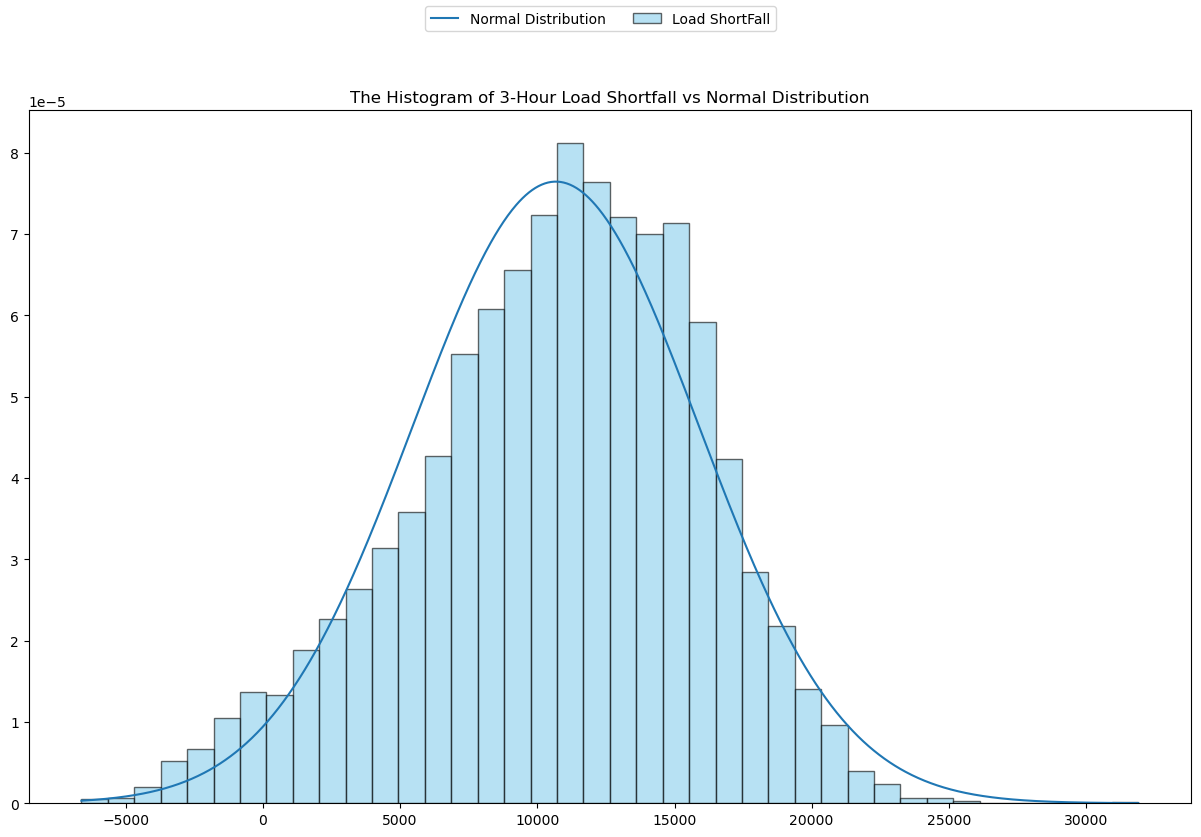

In [1661]:
# Create a new figure object
fig, ax = plt.subplots(figsize=(15,9))

# Calculate important metrics from dataframe
mean_val =  df_time_y['load_shortfall_3h'].mean()
std_dev = df_time_y['load_shortfall_3h'].std()
min_val, max_val = df_clean['load_shortfall_3h'].min(), df_clean['load_shortfall_3h'].max()

# Plot the theoretical normal distribution of target variable
x = np.linspace(min_val, max_val, 1000)
ax.plot(x, norm.pdf(x, mean_val, std_dev), label = "Normal Distribution")

# Plot the normalized histogram of target variable
ax.hist(df_clean['load_shortfall_3h'].values,
        alpha=0.6,
        label='Load ShortFall',
        bins=40,
        density=True,
        color='skyblue', 
        edgecolor='black'
       )

# Set title of figure
ax.set_title("The Histogram of 3-Hour Load Shortfall vs Normal Distribution")

# Create lines and labels for use in legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Insert figure legend and show the final figure
fig.legend(lines, labels, loc='upper center', ncol=2)
plt.show()

We see that our target variable is slightly skewed to the left from an ideal normal distribution. This can also be shown when we investigate the skew and kurtosis of our data explicitly, as done below.

In [1662]:
print(f"The Skew is {df_time_y.load_shortfall_3h.skew()}")
print(f"The Kurtosis is {df_time_y.load_shortfall_3h.kurtosis()}")

The Skew is -0.384847070902431
The Kurtosis is -0.11899877049908492


Upon analyzing our target variable, `load_shortfall_3h`, we observe a negative skewness, suggesting a slightly more pronounced tail on the left side of the distribution. This indicates that there are more values clustered to the right of the mean, indicating a leftward skew. The relatively small skew value signifies a fairly symmetric distribution of our target variable. Furthermore, the low kurtosis value suggests a lack of outliers, indicating a relatively tight distribution. These statistical insights provide valuable context, guiding our understanding of the variable's distribution and aiding in the formulation of our modeling strategies.

In an effort to enhance the interpretability of our dataset, we acknowledge the challenges posed by the current tabular representation. To address this, we will categorize our variables based on their skewness. Variables demonstrating significant departure from symmetry will be labeled as heavily skewed, those with moderate skewness will be categorized as moderately skewed, and those exhibiting relative symmetry will be identified as relatively symmetrical. This classification will not only streamline our understanding of the dataset but also pave the way for a more intuitive and insightful analysis.

In [1663]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_time_y.drop('load_shortfall_3h', axis=1).skew().to_frame()

# Display variables with high skewness
Highly_Pos_Skew = skew_df[(skew_df[0] >= 1)]
Highly_Neg_Skew = skew_df[(skew_df[0] <= -1)]
print("High positive skew:", Highly_Pos_Skew, "\n \n")
print("High negative skew:", Highly_Neg_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Pos_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Neg_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate positive skew:", Mod_Pos_Skew, "\n \n")
print("Moderate negative skew:", Mod_Neg_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

High positive skew: Empty DataFrame
Columns: [0]
Index: [] 
 

High negative skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate positive skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate negative skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Relatively Symmetrical:                   0
hourofday  0.000719
year      -0.001048
month     -0.009544
day        0.005984
season    -0.003834 
 



Upon a careful analysis of the variables in this section, it is evident that all the data exhibits a relatively symmetrical distribution. This symmetry implies a balanced distribution of values, contributing to a stable and predictable pattern within these features. The absence of heavily skewed or excessively skewed variables in this context underscores the dataset's balanced nature, allowing for a more straightforward interpretation and modeling process. This observation provides valuable insights, affirming the stability and uniformity of the data in this specific section.

Let's repeat the same process for calculating the kurtosis:

In [1664]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_time_y.drop('load_shortfall_3h', axis=1).kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers): Empty DataFrame
Columns: [0]
Index: [] 
 

Low kurtosis (Small amount of outliers):                   0
hourofday -1.237868
year      -1.498369
month     -1.207760
day       -1.193873
season    -1.351966 
 



Similarly, our analysis indicates a low kurtosis across the dataset, signifying a limited presence of outliers within the variables. The low kurtosis values reinforce the observation of a relatively tight distribution, indicating that the majority of data points are clustered near the mean. This characteristic enhances the dataset's stability and consistency, reinforcing the reliability of our data and bolstering the foundation for our subsequent analytical and modeling efforts.

Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. These visualizations will not only corroborate the metrics calculated earlier but also offer nuanced insights into the distributional patterns of each variable. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

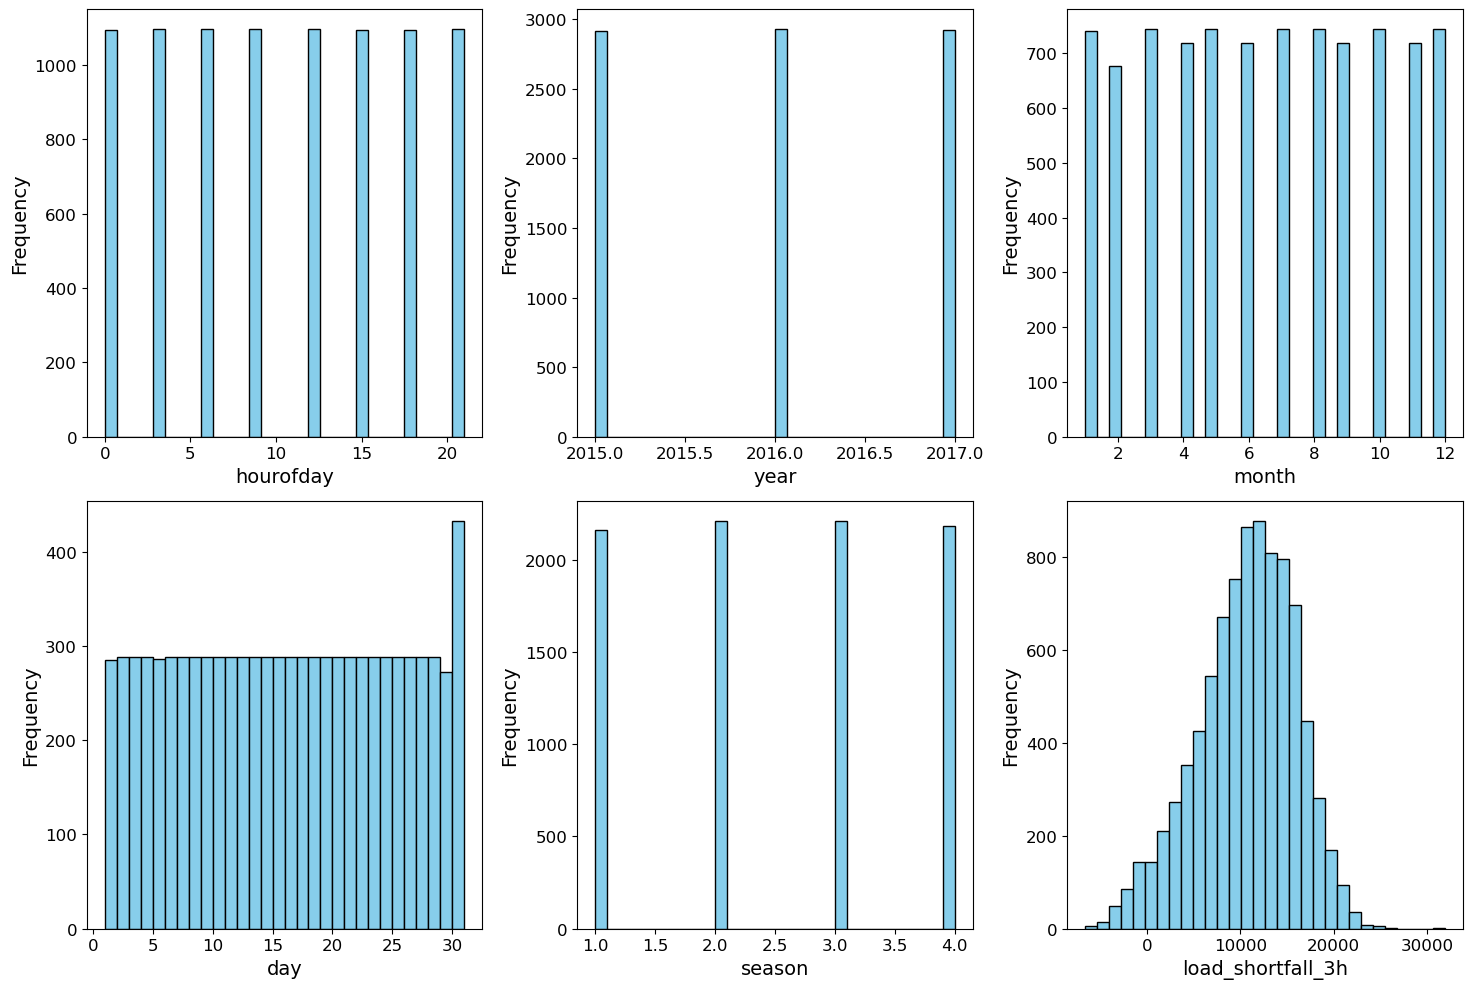

In [1665]:
# Define the number of rows and columns for subplots
number_of_rows = 2  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_time_y.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_time_y[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In this section, the data exhibits a generally uniform distribution, with subtle variations. February stands out with a noticeable decrease in frequency, indicating a unique pattern specific to this month. Additionally, there is a discernible increase in frequency on the last day of each month.

##### *5.1.1.1. `load_shortfall_3h` by `season`:*

To gain a more direct and focused insight into the relationship between `load_shortfall_3h` and `season`, we will visualize this interaction using a line graph. This graphical representation will provide a clear and concise depiction of how energy load shortfalls vary across different months, enabling us to discern any prominent patterns, seasonal trends, or outliers in the data.

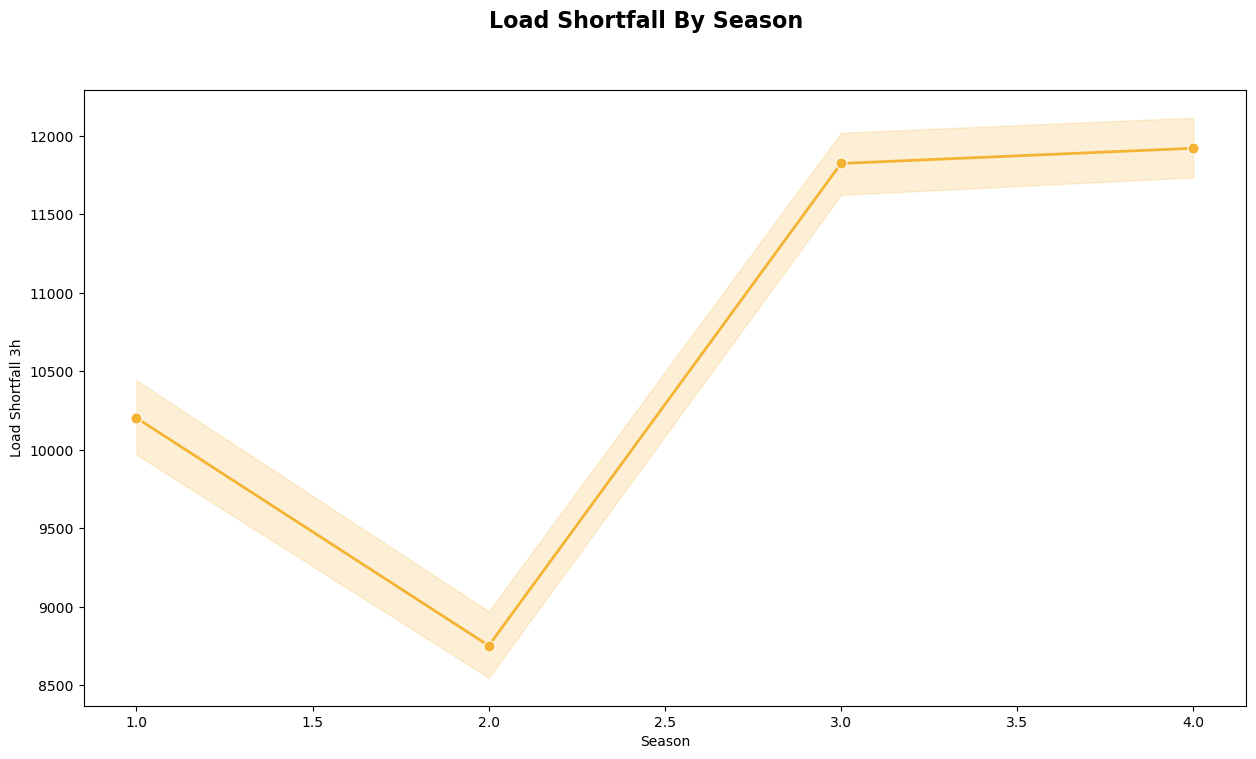

In [1666]:
# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15, 8))

# Specify the color you want to use for the line (for example, 'green' or '#FF5733' - a shade of orange)
line_color = '#F5B334'

# Plot the line graph of load shortfall per year with the specified color
sns.lineplot(data=df_time_y, x="season", y="load_shortfall_3h", marker='o', markersize=8, linewidth=2, color=line_color)

# Set the main title for the graph
plt.suptitle('Load Shortfall By Season', fontsize=16, fontweight='bold')

# Set labels for x and y axes
ax.set_xlabel('Season')
ax.set_ylabel('Load Shortfall 3h')

# Show the line graph
plt.show()

Upon examining the line graph, distinct patterns emerge in the distribution of `load_shortfall_3h` across different seasons. 

**Winter (1):** The average load shortfall during winter months remains relatively stable, indicating a consistent level of energy demand exceeding supply.

**Spring (2):** In spring, there is a significant drop in the load shortfall, suggesting a more balanced energy supply and demand during this season.

**Summer (3):** The load shortfall experiences a sharp increase during summer, indicating a higher demand for energy supply, potentially due to increased cooling needs, longer daylight hours, or other factors.

**Autumn (4):** As autumn arrives, there is a slight rise in the load shortfall. Although there is an increase, it is not as dramatic as during summer, indicating a moderate uptick in energy demand as the weather cools down.

In summary, this analysis reveals fluctuations in energy demand throughout the year, with notable peaks in summer and relatively stable periods in winter and spring.

By observing the load shortfall patterns throughout the year, we can glean valuable insights into the energy demand fluctuations during different seasons. This understanding is crucial for Disaster Resilience Solutions (DRS), as accurate predictions empower them to proactively allocate resources, prioritize vulnerable regions, and deploy emergency response teams. 

Additionally, DRS could harness the power of solar panels in the summer when load shortfall is at it's highest. This will be able to augment the non-renewable sources.

##### *5.1.1.2. `load_shortfall_3h` by `month`:*

Let's compare the `load_shortfall_3h` with the `month`.  By exploring this relationship, we aim to identify specific hours during which load shortfalls are more prevalent or exhibit distinct patterns.

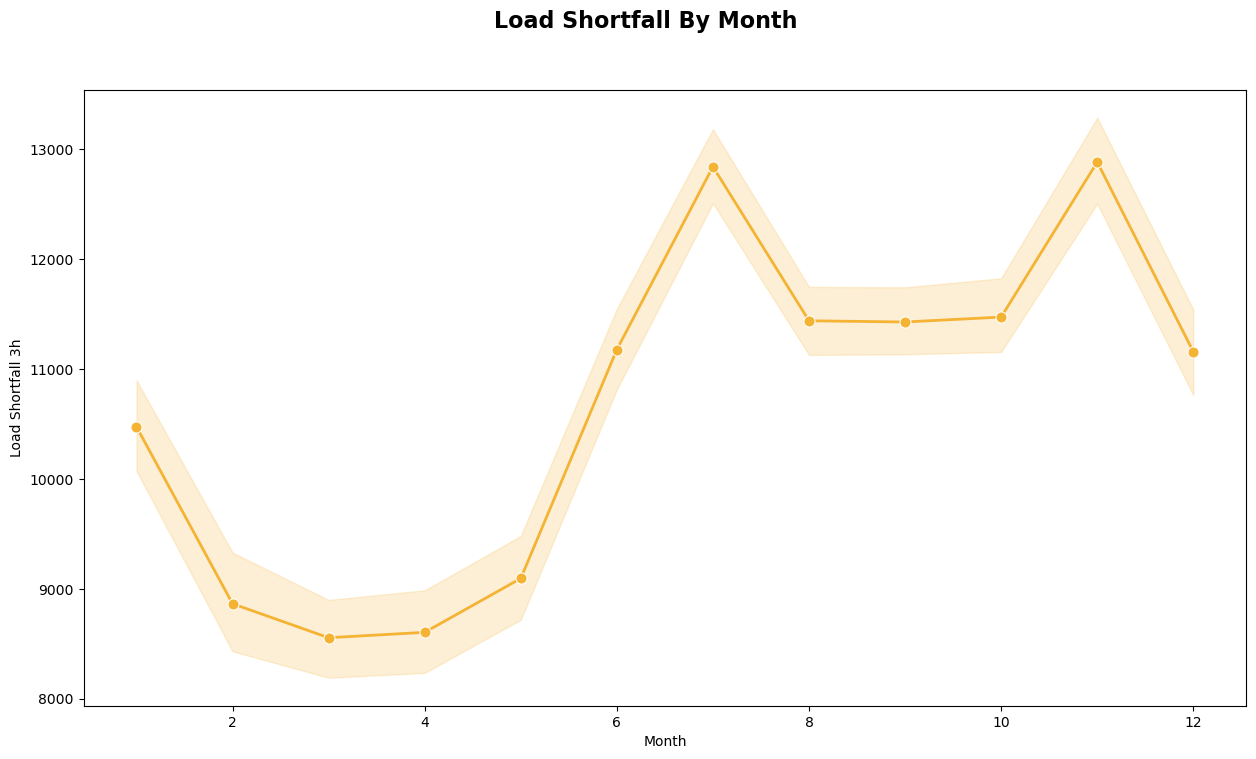

In [1667]:
# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15, 8))

# Specify the color you want to use for the line (for example, 'blue' or '#FF5733' - a shade of orange)
line_color = '#F5B334'

# Plot the line graph of load shortfall per hour of the day with the specified color
sns.lineplot(data=df_time_y, x="month", y="load_shortfall_3h", marker='o', markersize=8, linewidth=2, color=line_color)

# Set the main title for the graph
plt.suptitle('Load Shortfall By Month', fontsize=16, fontweight='bold')

# Set labels for x and y axes
ax.set_xlabel('Month')
ax.set_ylabel('Load Shortfall 3h')

# Show the line graph
plt.show()

**February to March:**
During these months, there is a gradual decline in the load shortfall. This decline could be attributed to milder weather conditions, leading to reduced energy consumption. For Disaster Resilience Solutions, this trend signifies a period of relative stability. It offers an opportunity for preparedness efforts, such as conducting drills, updating emergency response protocols, and ensuring resources are in place for the upcoming challenges.

**March to May:**
A slight incline in load shortfall from March to May suggests a gradual increase in energy demand. This could be due to transitioning weather conditions, such as the arrival of spring and the accompanying rise in temperature. Disaster Resilience Solutions needs to closely monitor this upward trend, preparing for heightened energy requirements and potential strain on the supply system.

**June to July:**
A significant incline in load shortfall during these months points to a substantial surge in energy demand. This period likely corresponds with the onset of summer, leading to increased use of air conditioning and cooling systems. For Disaster Resilience Solutions, this sharp rise underscores the urgency of preparedness measures. Adequate resources, manpower, and strategic planning are essential to manage the escalating energy needs during this critical phase.

**August to October:**
Following the peak in July, there is a drop in load shortfall, stabilizing at an average level from August to October. This period of stability provides a breathing space for Disaster Resilience Solutions. It allows for the review of response strategies, assessment of resource utilization, and readiness for any unexpected spikes in demand. It also enables the agency to focus on long-term resilience-building initiatives.

**November:**
Another upward trend in load shortfall is observed in November, indicating a rise in energy demand as winter approaches. Disaster Resilience Solutions must be prepared for this resurgence, ensuring that the energy supply system can accommodate the growing needs. Timely interventions, such as increasing energy reserves and coordinating with utility providers, become vital during this phase.

**December to February:**
The year concludes with a return to average load shortfall. This relatively stable period offers an opportunity for Disaster Resilience Solutions to conduct a comprehensive year-end review. Lessons learned, challenges faced, and successes achieved can inform future disaster preparedness strategies. It also allows for strategic planning for the upcoming year, incorporating insights from the entire year's data.

For DRS, this detailed analysis of the load shortfall patterns equips them with actionable insights. By aligning their preparedness efforts with these seasonal fluctuations, they can optimize resource allocation, enhance response strategies, and ensure the uninterrupted supply of energy during extreme weather events. This proactive approach ultimately strengthens the agency's disaster resilience planning, minimizing disruptions and safeguarding communities during natural disasters.

##### *5.1.1.3. `load_shortfall_3h` by `year`:*

Extending our analysis to examine the relationship between `load_shortfall_3h` and `year` provides a broader perspective on the dataset. By conducting similar analyses per year, we aim to uncover potential trends, fluctuations, or patterns in energy load shortfalls over different years. 

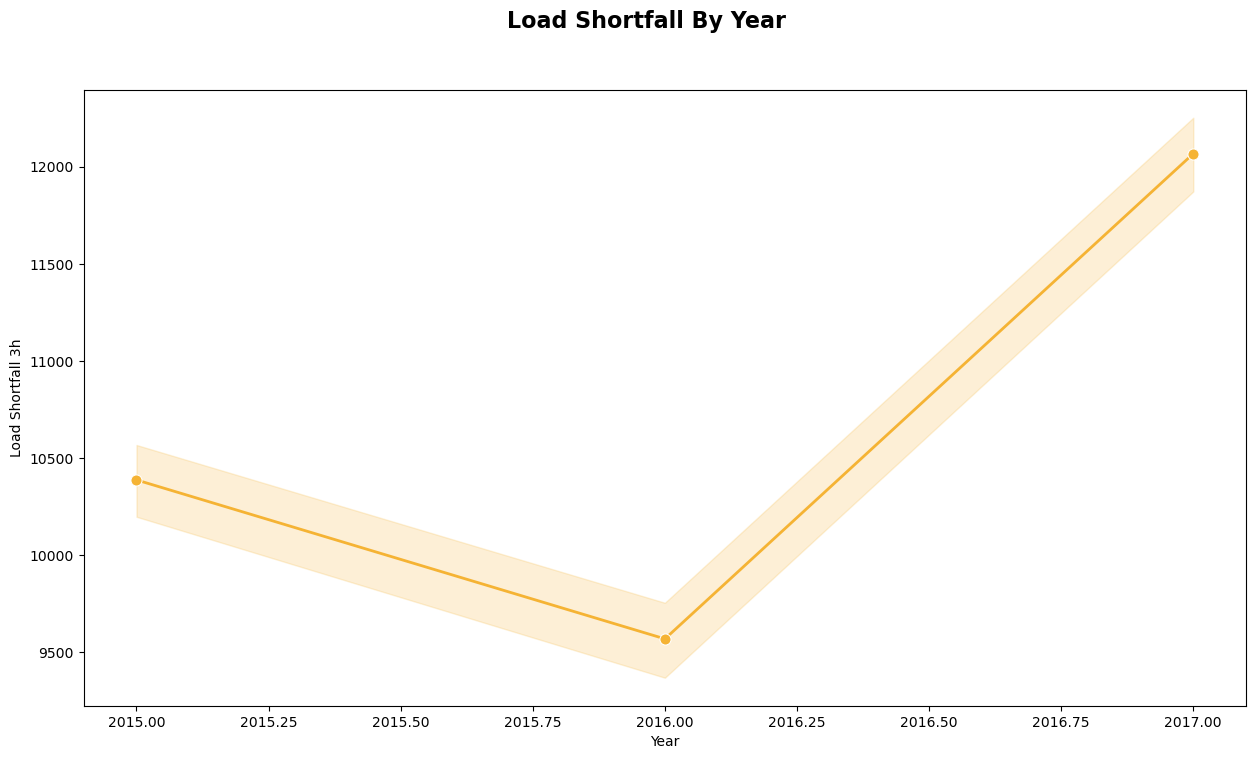

In [1668]:
# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15, 8))

# Specify the color you want to use for the line (for example, 'purple' or '#FF5733' - a shade of orange)
line_color = '#F5B334'

# Plot the line graph of load shortfall per year with the specified color
sns.lineplot(data=df_time_y, x="year", y="load_shortfall_3h", marker='o', markersize=8, linewidth=2, color=line_color)

# Set the main title for the graph
plt.suptitle('Load Shortfall By Year', fontsize=16, fontweight='bold')

# Set labels for x and y axes
ax.set_xlabel('Year')
ax.set_ylabel('Load Shortfall 3h')

# Show the line graph
plt.show()

In 2015, the load shortfall starts at an average level and gradually decreases. However, a significant spike is observed in 2017, making it the year with the highest load shortfall among the three years analyzed. This substantial increase from 2016 to 2017 indicates a noteworthy surge in energy demand or a decrease in energy supply resilience. Understanding these fluctuations is crucial for DRS' planning, as it highlights a period of heightened vulnerability and emphasizes the need for enhanced preparedness strategies to effectively manage energy shortages during adverse weather conditions.

##### *5.1.1.4. `load_shortfall_3h` by `houroftheday`:*

Let's compare the `load_shortfall_3h` with the `houroftheday`.  By exploring this relationship, we aim to identify specific hours during which load shortfalls are more prevalent or exhibit distinct patterns.

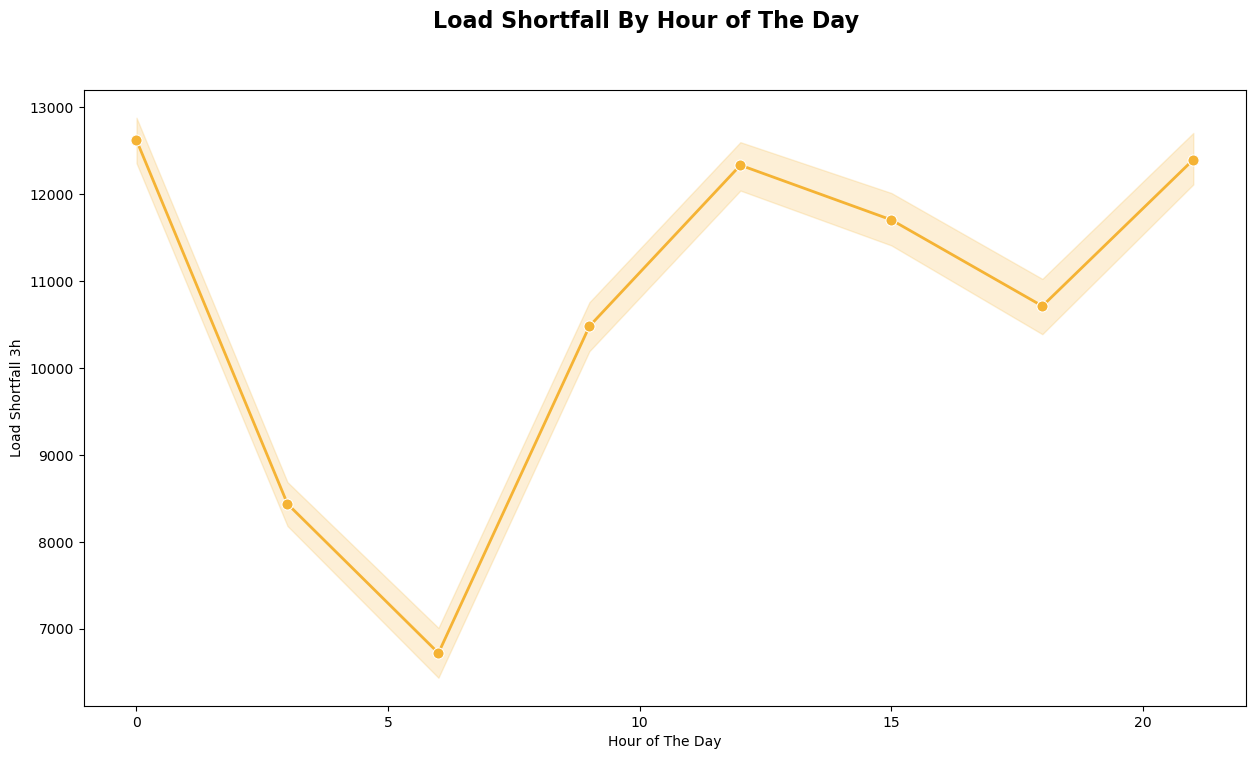

In [1669]:
# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15, 8))

# Specify the color you want to use for the line (for example, 'blue' or '#FF5733' - a shade of orange)
line_color = '#F5B334'

# Plot the line graph of load shortfall per hour of the day with the specified color
sns.lineplot(data=df_time_y, x="hourofday", y="load_shortfall_3h", marker='o', markersize=8, linewidth=2, color=line_color)

# Set the main title for the graph
plt.suptitle('Load Shortfall By Hour of The Day', fontsize=16, fontweight='bold')

# Set labels for x and y axes
ax.set_xlabel('Hour of The Day')
ax.set_ylabel('Load Shortfall 3h')

# Show the line graph
plt.show()

The load shortfall data reveals crucial insights into the energy demand patterns throughout the day. At midnight, when energy usage typically drops as most people are asleep, the load shortfall starts at a high level. As the day progresses, there's a substantial decrease in load shortfall, indicating a relatively stable energy supply during the early morning hours until 6 am.

However, a significant surge in energy demand occurs from 6 am to 12 pm, likely due to the start of the workday and increased industrial activities. This sharp increase suggests a strain on the energy grid during these morning hours. Subsequently, there's a slight drop in load shortfall around 7 pm, possibly due to reduced commercial activities or the transition to evening hours.

Interestingly, energy consumption spikes again from 7 pm to midnight, highlighting another period of heightened demand, likely attributed to domestic usage during peak evening hours. These detailed fluctuations in load shortfall underscore specific time frames when the energy supply system is under increased pressure. For DRS, this detailed breakdown serves as a valuable guide to strategically allocate resources and reinforce the energy infrastructure, ensuring uninterrupted supply, especially during these critical periods of high demand.

Subsequently, this again highlights the possibility for DRS to use solar power during the day to augment non-renewable sources and prevent shortfalls. 

##### *5.1.1.5. `load_shortfall_3h` by `day`:*

Finally, lets compare `load_shortfall_3h` and the `day` of the month.

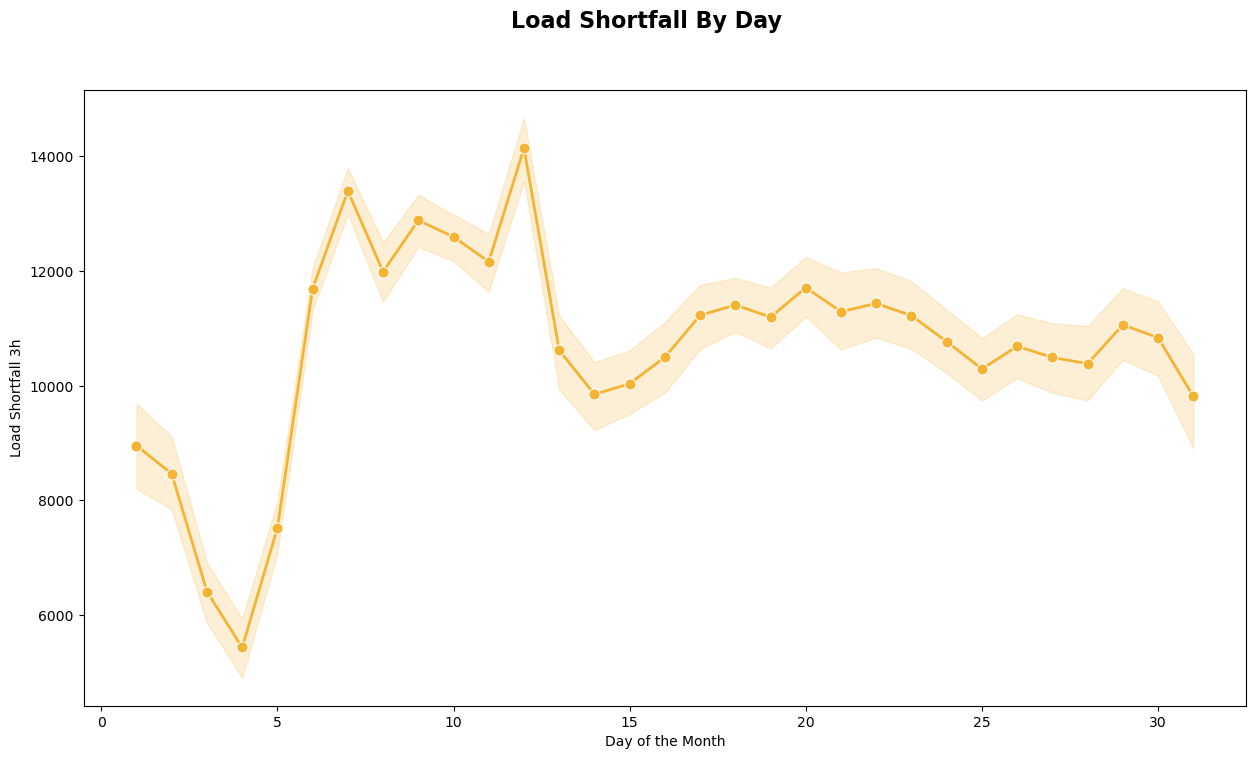

In [1670]:
# Initialize a new figure object
fig, ax = plt.subplots(figsize=(15, 8))

# Specify the color you want to use for the line (for example, 'green' or '#FF5733' - a shade of orange)
line_color = '#F5B334'

# Plot the line graph of load shortfall per day of the week with the specified color
sns.lineplot(data=df_time_y, x="day", y="load_shortfall_3h", marker='o', markersize=8, linewidth=2, color=line_color)

# Set the main title for the graph
plt.suptitle('Load Shortfall By Day', fontsize=16, fontweight='bold')

# Set labels for x and y axes
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Load Shortfall 3h')

# Show the line graph
plt.show()

The load shortfall data across the month provides a detailed picture of energy demand patterns. At the beginning of the month, the load shortfall starts at an average level, indicating a relatively stable energy supply. As the days progress, there is a consistent decrease in load shortfall until the 4th, suggesting a balanced energy demand and supply.

However, a sharp increase in load shortfall occurs from the 4th to the 7th, indicating a sudden surge in energy demand, possibly due to specific events or increased industrial activities. Following this peak, there are minor fluctuations in load shortfall from the 7th to the 11th, with the 11th being the peak day of the month in terms of energy demand challenges.

The load shortfall then decreases again, returning to an average level by the 13th. From this point onward, there are slight fluctuations in load shortfall, indicating relatively stable energy demand for the remainder of the month.

This detailed analysis allows DRS to identify critical periods of heightened energy demand, particularly around the 4th to 7th and the 11th of the month. By understanding these fluctuations, the agency can proactively prepare for increased demand, ensuring a robust energy supply system, even during challenging periods, and enhancing overall disaster preparedness and resilience planning. 

##### 5.1.2. `df_Barcelona`:

Subsequently, we will conduct a comprehensive examination of all the data related to Barcelona. This detailed scrutiny will encompass various features specific to this city, providing a nuanced understanding of the dataset's Barcelona-centric attributes. By immersing ourselves in this focused exploration, we aim to uncover city-specific patterns and trends, thus enriching our overall insights into the dataset.

In [1671]:
df_Barcelona = df_clean[['Barcelona_weather_id' , 'Barcelona_wind_speed', 'Barcelona_wind_deg' , 'Barcelona_temp', 'Barcelona_temp_min', 
           'Barcelona_temp_max' , 'Barcelona_rain_1h', 'Barcelona_rain_3h' , 'Barcelona_pressure', 'load_shortfall_3h']]

 We will commence our exploration by examining the initial entries of the `df_Barcelona` DataFrame. This pivotal step allows us to glean essential insights from the first two rows of the dataset, laying the foundation for our comprehensive analysis and informed decision-making in the modeling process.

In [1672]:
df_Barcelona.head(2)

Barcelona_weather_id  Barcelona_wind_speed  Barcelona_wind_deg  \
0                 800.0              6.333333           42.666667   
1                 800.0              4.000000          139.000000   

   Barcelona_temp  Barcelona_temp_min  Barcelona_temp_max  Barcelona_rain_1h  \
0      281.013000          281.013000          281.013000                0.0   
1      280.561667          280.561667          280.561667                0.0   

   Barcelona_rain_3h  Barcelona_pressure  load_shortfall_3h  
0                0.0         1036.333333        6715.666667  
1                0.0         1037.333333        4171.666667

Next, let's look at some descriptive statistics for the rest of our variables:

In [1673]:
df_Barcelona.describe()

Barcelona_weather_id  Barcelona_wind_speed  Barcelona_wind_deg  \
count           8763.000000           8763.000000         8763.000000   
mean             765.979687              2.870497          190.544848   
std               88.142235              1.792197           89.077337   
min              200.666667              0.000000            0.000000   
25%              800.000000              1.666667          118.166667   
50%              800.333333              2.666667          200.000000   
75%              801.000000              4.000000          260.000000   
max              804.000000             12.666667          360.000000   

       Barcelona_temp  Barcelona_temp_min  Barcelona_temp_max  \
count     8763.000000         8763.000000         8763.000000   
mean       289.855459          288.447422          291.157644   
std          6.528111            6.102593            7.273538   
min        270.816667          269.483333          272.150000   
25%        284.973443          284.150000          285.483333   
50%        289.416667          288.150000          290.150000   
75%        294.909000          292.966667          296.855000   
max        307.316667          304.816667          314.076667   

       Barcelona_rain_1h  Barcelona_rain_3h  Barcelona_pressure  \
count        8763.000000        8763.000000        8.763000e+03   
mean            0.128906           0.000439        1.377965e+03   
std             0.634730           0.003994        1.407314e+04   
min             0.000000           0.000000        6.706667e+02   
25%             0.000000           0.000000        1.014000e+03   
50%             0.000000           0.000000        1.018000e+03   
75%             0.000000           0.000000        1.022000e+03   
max            12.000000           0.093000        1.001411e+06   

       load_shortfall_3h  
count        8763.000000  
mean        10673.857612  
std          5218.046404  
min         -6618.000000  
25%          7390.333333  
50%         11114.666667  
75%         14498.166667  
max         31904.000000

##### *5.1.2.1. Skewness and kurtosis:*

To quantify the skewness of the data in the Barcelona dataset, we will utilize the `skew()` function. This analytical tool will provide precise numerical values, allowing us to quantitatively assess the distributional characteristics of the variables in the dataset. By leveraging this method, we aim to gain a deeper understanding of the skewness patterns, essential for our meticulous analysis and modeling efforts in the Barcelona context.

In [1674]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_Barcelona.skew().to_frame()

# Display variables with high skewness
High_right_Skew = skew_df[(skew_df[0] >= 1)]
High_left_Skew = skew_df[(skew_df[0] <= -1)]
print("Highly right skew:", High_right_Skew, "\n \n")
print("High left skew:", High_left_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Right_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Left_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate Right skew:", Mod_Right_Skew, "\n \n")
print("Moderate Left skew:", Mod_Left_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

Highly right skew:                               0
Barcelona_wind_speed   1.057331
Barcelona_rain_1h      8.726988
Barcelona_rain_3h     12.696605
Barcelona_pressure    57.979664 
 

High left skew:                              0
Barcelona_weather_id -2.584011 
 

Moderate Right skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Left skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Relatively Symmetrical:                            0
Barcelona_wind_deg -0.180001
Barcelona_temp      0.128095
Barcelona_temp_min -0.018057
Barcelona_temp_max  0.276925
load_shortfall_3h  -0.384847 
 



Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

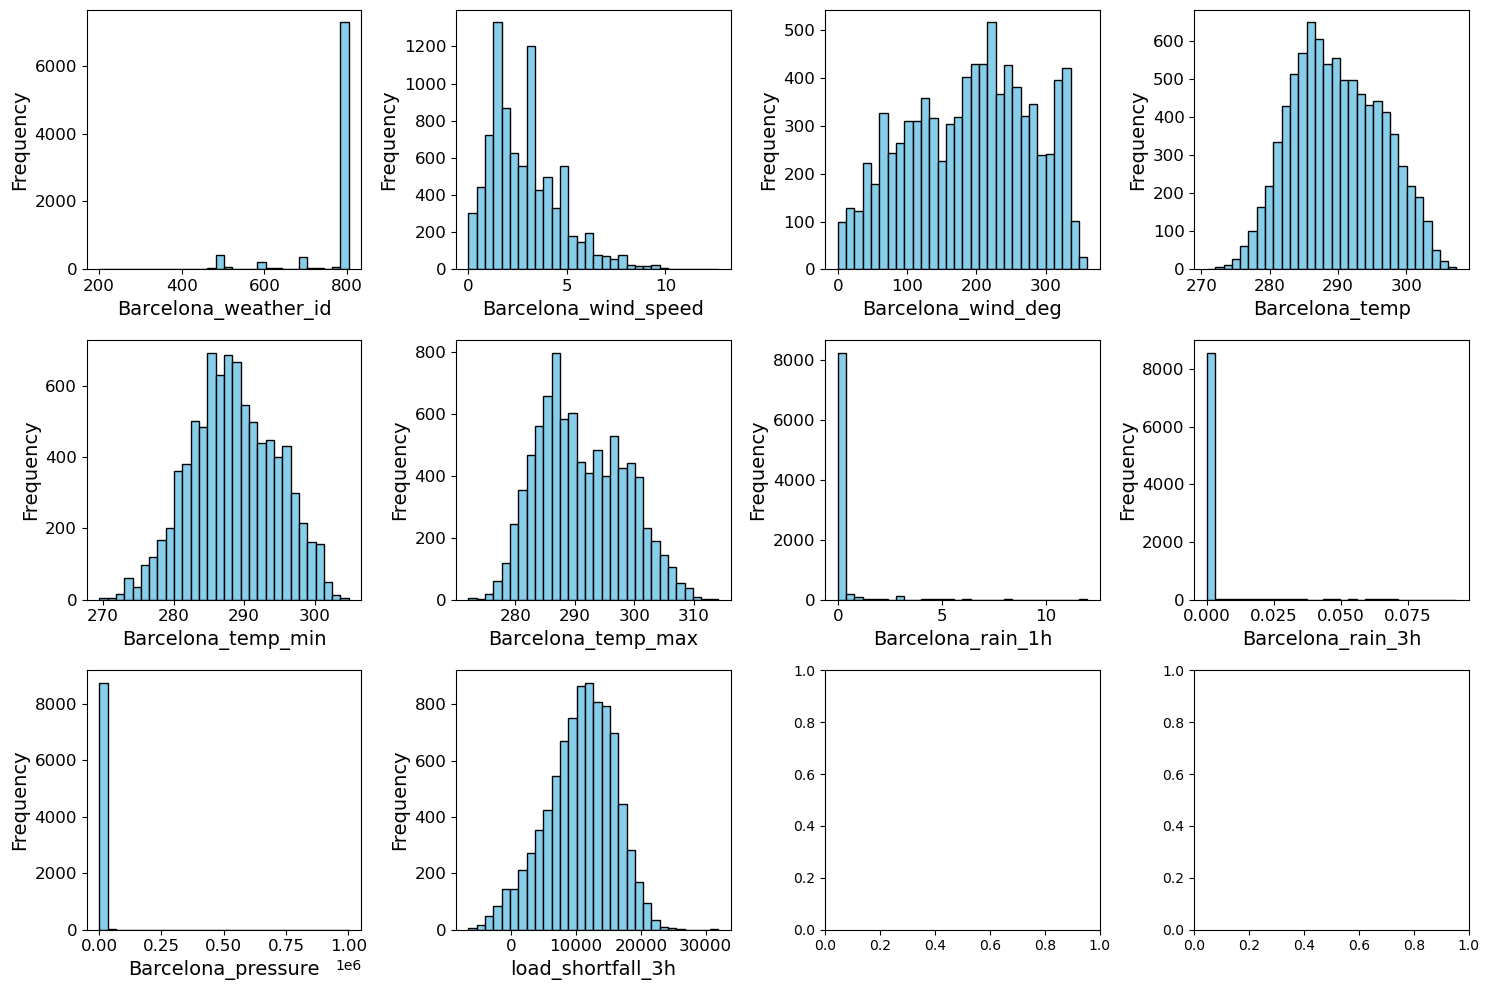

In [1675]:
# Define the number of rows and columns for subplots
number_of_rows = 3  # Number of rows in the subplot grid
number_of_columns = 4  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_Barcelona.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_Barcelona[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In our examination of Barcelona's weather data, specific skewness patterns have emerged within various weather variables.

**Highly Right Skew:**
Four variables, including wind speed, rainfall for 1 hour, rainfall for 3 hours, and atmospheric pressure, display a significant rightward or positive skew. This indicates a prevalence of higher values in these categories. Barcelona experiences occasional strong winds, heavy short-term and prolonged rainfall, as well as higher atmospheric pressure values, contributing to these skewed patterns.

**High Left Skew:**
`Barcelona_weather_id` demonstrates a significant leftward or negative skew. This suggests frequent occurrences of specific weather conditions, represented by lower weather IDs. Barcelona tends to experience certain consistent weather states, contributing to this skewed pattern.

**Relatively Symmetrical:**
Several variables, including wind degree and temperature-related metrics, exhibit a more symmetrical distribution around their means. This means that these aspects of weather, such as wind direction and temperature levels, are fairly evenly spread around their average values, indicating a balanced climate in these aspects in Barcelona.

These skewness patterns offer qualitative insights into Barcelona's weather characteristics, vital for our subsequent analyses and modeling efforts, guiding our predictions and interpretations related to Barcelona's weather dynamics.

Finally, we will use the `kurtosis()` function to assess the shape and tail behavior of a probability distribution.

In [1676]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_Barcelona.kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers):                                 0
Barcelona_weather_id     5.701882
Barcelona_rain_1h      101.578931
Barcelona_rain_3h      187.800460
Barcelona_pressure    3687.564230 
 

Low kurtosis (Small amount of outliers):                              0
Barcelona_wind_speed  1.493635
Barcelona_wind_deg   -0.959160
Barcelona_temp       -0.696555
Barcelona_temp_min   -0.474890
Barcelona_temp_max   -0.728757
load_shortfall_3h    -0.118999 
 



The presented findings reveal the kurtosis values for specific variables in the dataset, indicating the presence of outliers.

**High Kurtosis (Large Amount of Outliers):**
Variables such as `Barcelona_weather_id`, `Barcelona_rain_1h`, `Barcelona_rain_3h`, and `Barcelona_pressure` exhibit high kurtosis, indicating a substantial number of outliers in these data sets. `Barcelona_rain_1h` and `Barcelona_rain_3h` indicate instances of heavy rainfall, with the former potentially signifying intense short-term rainfall events. `Barcelona_pressure` displays extreme outlier values, suggesting irregular atmospheric pressure readings. 

**Low Kurtosis (Small Amount of Outliers):**
Variables like `Barcelona_wind_speed`, `Barcelona_wind_deg`, `Barcelona_temp`, `Barcelona_temp_min`, and `Barcelona_temp_max` demonstrate low kurtosis, indicating a distribution where most values cluster close to the mean. These variables have few outliers, suggesting a stable and predictable range of values. For example, `Barcelona_temp` reflects a consistent temperature range in Barcelona. 

##### 5.1.3. `df_Bilbao`:

In the refinement of our dataset, a specific subset, denoted as `df_Bilbao`, has been meticulously curated. By isolating these key features, `df_Bilbao` encapsulates the weather-related parameters critical for our analysis and modeling endeavors. This focused approach enables a detailed examination of Bilbao's weather patterns, enriching our understanding of the city-specific climatic dynamics.

In [1677]:
df_Bilbao = df_clean[['Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure','Bilbao_clouds_all']]

 We will commence our exploration by examining the initial entries of the `df_Bilbao` DataFrame. This pivotal step allows us to glean essential insights from the first two rows of the dataset, laying the foundation for our comprehensive analysis and informed decision-making in the modeling process.

In [1678]:
df_Bilbao.head(2)

Bilbao_temp  Bilbao_temp_min  Bilbao_temp_max  Bilbao_rain_1h  \
0   269.338615       269.338615       269.338615             0.0   
1   270.376000       270.376000       270.376000             0.0   

   Bilbao_snow_3h  Bilbao_pressure  Bilbao_clouds_all  
0             0.0      1035.000000                0.0  
1             0.0      1035.666667                0.0

Next, let's look at some descriptive statistics for the rest of our variables:

In [1679]:
df_Bilbao.describe()

Bilbao_temp  Bilbao_temp_min  Bilbao_temp_max  Bilbao_rain_1h  \
count  8763.000000      8763.000000      8763.000000     8763.000000   
mean    286.422929       285.017973       287.966027        0.135753   
std       6.818682         6.705672         7.105590        0.374901   
min     267.483333       264.483333       269.063000        0.000000   
25%     281.374167       280.085167       282.836776        0.000000   
50%     286.158333       284.816667       287.630000        0.000000   
75%     291.034167       289.816667       292.483333        0.100000   
max     310.710000       309.816667       317.966667        3.000000   

       Bilbao_snow_3h  Bilbao_pressure  Bilbao_clouds_all  
count     8763.000000      8763.000000        8763.000000  
mean         0.031912      1017.739549          43.469132  
std          0.557264        10.046124          32.551044  
min          0.000000       971.333333           0.000000  
25%          0.000000      1013.000000          10.000000  
50%          0.000000      1019.000000          45.000000  
75%          0.000000      1024.000000          75.000000  
max         21.300000      1042.000000         100.000000

##### *5.1.3.1. Skewness and kurtosis:*

To quantify the skewness of the data in the Bilbao dataset, we will utilize the `skew()` function. This analytical tool will provide precise numerical values, allowing us to quantitatively assess the distributional characteristics of the variables in the dataset. By leveraging this method, we aim to gain a deeper understanding of the skewness patterns, essential for our meticulous analysis and modeling efforts in the Bilbao context.

In [1680]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_Bilbao.skew().to_frame()

# Display variables with high skewness
High_right_Skew = skew_df[(skew_df[0] >= 1)]
High_left_Skew = skew_df[(skew_df[0] <= -1)]
print("Highly right skew:", High_right_Skew, "\n \n")
print("High left skew:", High_left_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Right_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Left_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate Right skew:", Mod_Right_Skew, "\n \n")
print("Moderate Left skew:", Mod_Left_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

Highly right skew:                         0
Bilbao_rain_1h   5.222802
Bilbao_snow_3h  26.177568 
 

High left skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Right skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Left skew:                         0
Bilbao_pressure -0.999642 
 

Relatively Symmetrical:                           0
Bilbao_temp        0.293686
Bilbao_temp_min    0.194912
Bilbao_temp_max    0.393932
Bilbao_clouds_all -0.053085 
 



Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

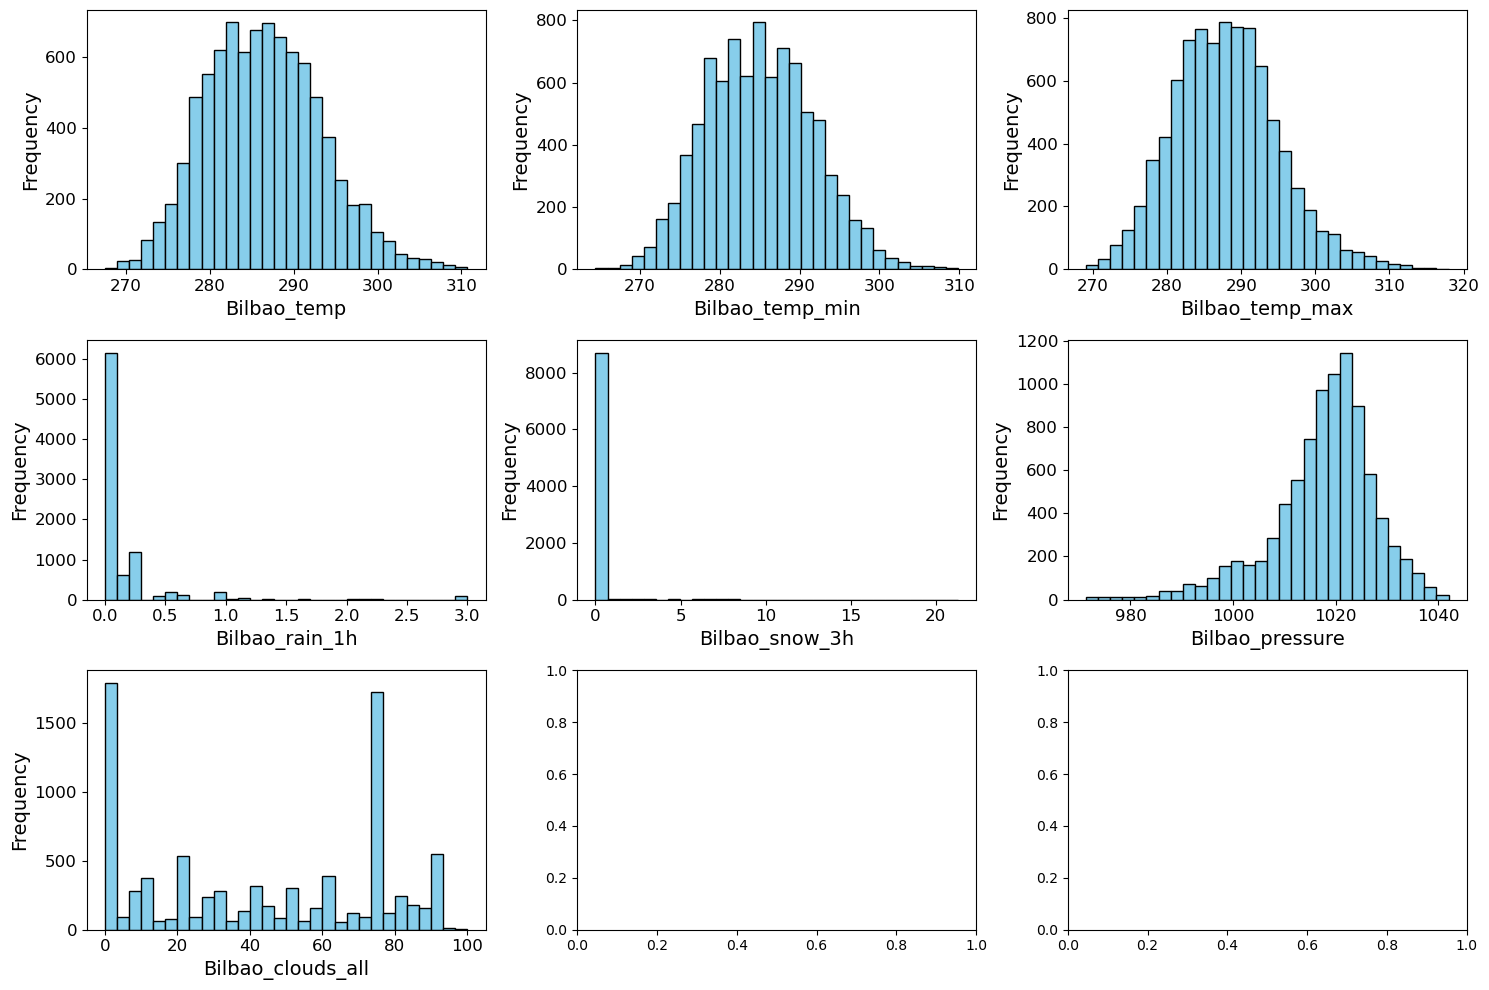

In [1681]:
# Define the number of rows and columns for subplots
number_of_rows = 3  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_Bilbao.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_Bilbao[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In our analysis of Bilbao's weather data, we've identified distinct skewness patterns within various weather variables.

**Highly Right Skew:**
Two variables, rain for 1 hour and snowfall for 3 hours, exhibit a significant rightward or positive skew. This suggests a prevalence of higher values in these categories. Bilbao experiences occasional heavy short-term rainfall and rare instances of significant snowfall, contributing to these skewed patterns.

**Relatively Symmetrical:**
Several variables, including temperature, temperature minimum and maximum, and cloud coverage, exhibit a more symmetrical distribution around their means. This means that these aspects of weather, such as temperature levels and cloud coverage, are fairly evenly spread around their average values, indicating a balanced climate in these aspects in Bilbao.

These skewness patterns provide qualitative insights into Bilbao's weather characteristics, essential for our subsequent analyses and modeling efforts, guiding our predictions and interpretations related to Bilbao's weather dynamics.

Finally, we will use the `kurtosis()` function to assess the shape and tail behavior of a probability distribution.

In [1682]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_Bilbao.kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers):                          0
Bilbao_rain_1h   32.904656
Bilbao_snow_3h  806.128471 
 

Low kurtosis (Small amount of outliers):                           0
Bilbao_temp       -0.086363
Bilbao_temp_min   -0.230342
Bilbao_temp_max    0.283366
Bilbao_pressure    1.825323
Bilbao_clouds_all -1.533417 
 



The presented findings reveal the kurtosis values for specific variables in the dataset, indicating the presence of outliers.

**High Kurtosis (Large Amount of Outliers):**
Variables like `Bilbao_rain_1h` and `Bilbao_snow_3h` display high kurtosis, indicating a significant number of outliers. These variables contain extreme values that deviate significantly from the typical range. For instance, `Bilbao_snow_3h` exhibits high kurtosis, suggesting infrequent but intense snowfall events in Bilbao. 

**Low Kurtosis (Small Amount of Outliers):**
Variables such as `Bilbao_temp`, `Bilbao_temp_min`, `Bilbao_temp_max`, `Bilbao_pressure`, and `Bilbao_clouds_all` demonstrate low kurtosis, indicating a distribution where most values cluster around the mean. These variables have fewer outliers, signifying a more stable and typical range of values. For example, `Bilbao_temp` shows low kurtosis, indicating that temperatures in Bilbao generally fall within a predictable range. 

##### 5.1.4. `df_Madrid`:

In the upcoming section dedicated to the analysis of Madrid city, a focused dataset, named `df_Madrid`, has been meticulously crafted, encompassing exclusively the variables pertinent to Madrid. 

In [1683]:
df_Madrid = df_clean[['Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' , 'Madrid_rain_1h' , 
           'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity']]

 We will commence our exploration by examining the initial entries of the `df_Madrid` dataframe. This pivotal step allows us to glean essential insights from the first two rows of the dataset, laying the foundation for our comprehensive analysis and informed decision-making in the modeling process.

In [1684]:
df_Madrid.head(2)

Madrid_weather_id  Madrid_wind_speed  Madrid_temp  Madrid_temp_min  \
0              800.0           0.666667   265.938000       265.938000   
1              800.0           0.333333   266.386667       266.386667   

   Madrid_temp_max  Madrid_rain_1h  Madrid_pressure  Madrid_clouds_all  \
0       265.938000             0.0       971.333333                0.0   
1       266.386667             0.0       972.666667                0.0   

   Madrid_humidity  
0        64.000000  
1        64.666667

Next, let's look at some descriptive statistics:

In [1685]:
df_Madrid.describe()

Madrid_weather_id  Madrid_wind_speed  Madrid_temp  Madrid_temp_min  \
count        8763.000000        8763.000000  8763.000000      8763.000000   
mean          773.527594           2.425729   288.419439       287.202203   
std            77.313315           1.850371     9.346796         9.206237   
min           211.000000           0.000000   264.983333       264.983333   
25%           800.000000           1.000000   281.404281       280.299167   
50%           800.000000           2.000000   287.053333       286.083333   
75%           800.666667           3.333333   295.154667       293.884500   
max           804.000000          13.000000   313.133333       310.383333   

       Madrid_temp_max  Madrid_rain_1h  Madrid_pressure  Madrid_clouds_all  \
count      8763.000000     8763.000000      8763.000000        8763.000000   
mean        289.540309        0.037818      1010.316920          19.473392   
std           9.752047        0.152639        22.198555          28.053660   
min         264.983333        0.000000       927.666667           0.000000   
25%         282.150000        0.000000      1012.333333           0.000000   
50%         288.116177        0.000000      1017.333333           0.000000   
75%         296.816667        0.000000      1022.000000          33.333333   
max         314.483333        3.000000      1038.000000         100.000000   

       Madrid_humidity  
count      8763.000000  
mean         57.414717  
std          24.335396  
min           6.333333  
25%          36.333333  
50%          58.000000  
75%          78.666667  
max         100.000000

##### *5.1.4.1. Skewness and kurtosis:*

To quantify the skewness of the data in the Madrid dataset, we will utilize the `skew()` function. This analytical tool will provide precise numerical values, allowing us to quantitatively assess the distributional characteristics of the variables in the dataset. By leveraging this method, we aim to gain a deeper understanding of the skewness patterns, essential for our meticulous analysis and modeling efforts in the Madrid context.

In [1686]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_Madrid.skew().to_frame()

# Display variables with high skewness
High_right_Skew = skew_df[(skew_df[0] >= 1)]
High_left_Skew = skew_df[(skew_df[0] <= -1)]
print("Highly right skew:", High_right_Skew, "\n \n")
print("High left skew:", High_left_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Right_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Left_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate Right skew:", Mod_Right_Skew, "\n \n")
print("Moderate Left skew:", Mod_Left_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

Highly right skew:                           0
Madrid_wind_speed  1.441144
Madrid_rain_1h     7.074308
Madrid_clouds_all  1.246745 
 

High left skew:                           0
Madrid_weather_id -3.107722
Madrid_pressure   -1.850768 
 

Moderate Right skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Left skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Relatively Symmetrical:                         0
Madrid_temp      0.304123
Madrid_temp_min  0.275083
Madrid_temp_max  0.298707
Madrid_humidity -0.057378 
 



Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

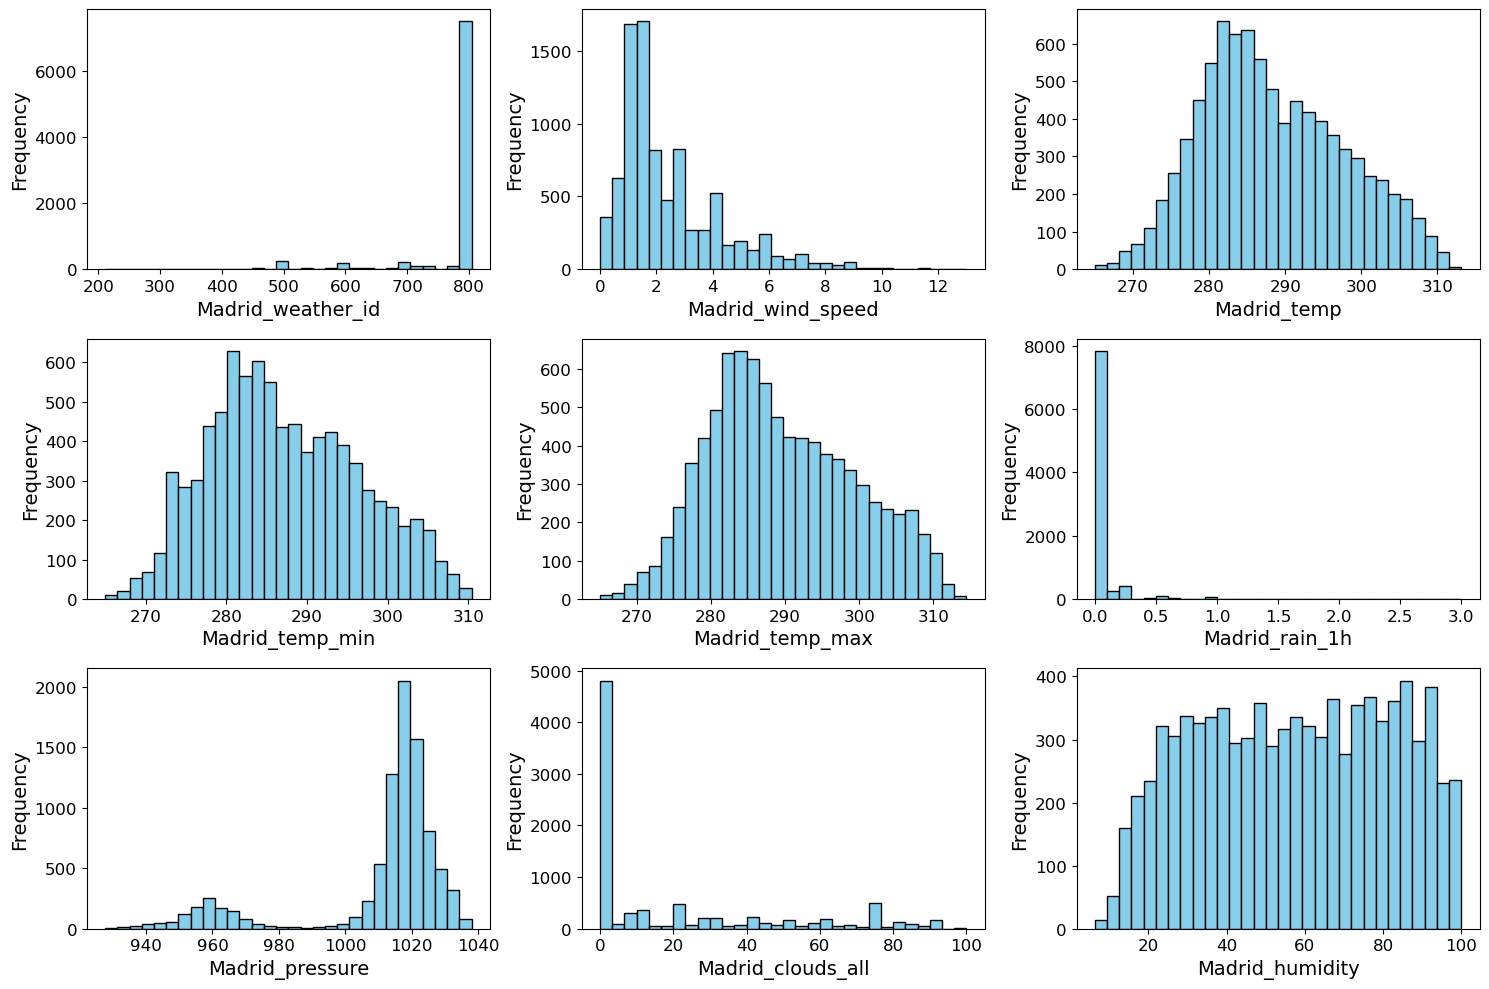

In [1687]:
# Define the number of rows and columns for subplots
number_of_rows = 3  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_Madrid.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_Madrid[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In the context of our analysis of Madrid's weather data, we've observed distinct skewness patterns, providing valuable insights into the distributional characteristics of various weather variables.

**Highly Right Skew:**
Certain variables, like wind speed, rainfall, and cloud coverage, exhibit a significant rightward or positive skew. This indicates a prevalence of higher values in these categories, suggesting occasional strong winds, heavy rainfall, and cloudier weather in Madrid.

**High Left Skew:**
Other variables, such as weather ID and atmospheric pressure, display a significant leftward or negative skew. This suggests frequent occurrences of specific weather conditions, represented by lower weather IDs, and lower atmospheric pressure values.

**Relatively Symmetrical:**
Certain variables, including temperature and humidity, showcase a symmetrical distribution around their means. This means that these aspects of weather, such as temperature levels and humidity, are fairly evenly spread around their average values.

These skewness patterns, even without specific numerical values, offer a qualitative understanding of how various weather factors are distributed in Madrid. This understanding is instrumental in our subsequent analyses and modeling efforts, guiding our predictions and interpretations related to Madrid's weather dynamics.

Finally, we will use the `kurtosis()` function to assess the shape and tail behavior of a probability distribution.

In [1688]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_Madrid.kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers):                            0
Madrid_weather_id   9.259047
Madrid_rain_1h     76.584491 
 

Low kurtosis (Small amount of outliers):                           0
Madrid_wind_speed  2.036462
Madrid_temp       -0.612299
Madrid_temp_min   -0.666646
Madrid_temp_max   -0.662861
Madrid_pressure    2.216199
Madrid_clouds_all  0.142079
Madrid_humidity   -1.167537 
 



The presented findings reveal the kurtosis values for specific variables in the dataset, indicating the presence of outliers.

**High Kurtosis (Large Amount of Outliers):**
Variables like `Madrid_weather_id` and `Madrid_rain_1h` exhibit high kurtosis, indicating a substantial number of outliers. These variables contain extreme values that deviate significantly from the typical range. For instance, `Madrid_rain_1h` has a high kurtosis, suggesting infrequent but intense rainfall events in Madrid. 

**Low Kurtosis (Small Amount of Outliers):**
Variables such as `Madrid_wind_speed`, `Madrid_temp`, `Madrid_temp_min`, `Madrid_temp_max`, `Madrid_pressure`, `Madrid_clouds_all`, and `Madrid_humidity` demonstrate low kurtosis, indicating a distribution where most values cluster around the mean. These variables have fewer outliers, signifying a more stable and typical range of values. For example, Madrid_wind_speed exhibits low kurtosis, indicating that wind speeds in Madrid generally fall within a predictable range. 

##### 5.1.5. `df_Seville`

In the next section dedicated to the analysis of Seville city, a focused dataset, named `df_Seville`, has been meticulously crafted, encompassing exclusively the variables pertinent to Seville. 

In [1689]:
df_Seville = df_clean[['Seville_weather_id' , 'Seville_wind_speed' , 'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 
           'Seville_rain_3h' , 'Seville_pressure' , 'Seville_clouds_all' , 'Seville_humidity']]

 We will commence our exploration by examining the initial entries of the `df_Seville` DataFrame. This pivotal step allows us to glean essential insights from the first two rows of the dataset, laying the foundation for our comprehensive analysis and informed decision-making in the modeling process.

In [1690]:
df_Seville.head(2)

Seville_weather_id  Seville_wind_speed  Seville_temp  Seville_temp_min  \
0               800.0            3.333333    274.254667        274.254667   
1               800.0            3.333333    274.945000        274.945000   

   Seville_temp_max  Seville_rain_1h  Seville_rain_3h  Seville_pressure  \
0        274.254667              0.0              0.0                25   
1        274.945000              0.0              0.0                25   

   Seville_clouds_all  Seville_humidity  
0                 0.0         74.333333  
1                 0.0         78.333333

Next, let's look at some descriptive statistics:

In [1691]:
df_Seville.describe()

Seville_weather_id  Seville_wind_speed  Seville_temp  Seville_temp_min  \
count         8763.000000         8763.000000   8763.000000       8763.000000   
mean           774.658818            2.425045    293.978903        291.633356   
std             71.940009            1.672895      7.920986          8.178220   
min            200.000000            0.000000    272.063000        270.150000   
25%            800.000000            1.000000    288.282917        285.816667   
50%            800.000000            2.000000    293.323333        290.816667   
75%            800.000000            3.333333    299.620333        297.150000   
max            804.000000           11.666667    314.976667        314.816667   

       Seville_temp_max  Seville_rain_1h  Seville_rain_3h  Seville_pressure  \
count       8763.000000      8763.000000      8763.000000       8763.000000   
mean         297.479527         0.039439         0.000243         13.507246   
std            8.875812         0.175857         0.003660          7.237267   
min          272.063000         0.000000         0.000000          1.000000   
25%          291.312750         0.000000         0.000000          7.000000   
50%          297.101667         0.000000         0.000000         14.000000   
75%          304.150000         0.000000         0.000000         20.000000   
max          320.483333         3.000000         0.093333         25.000000   

       Seville_clouds_all  Seville_humidity  
count         8763.000000       8763.000000  
mean            13.714748         62.658793  
std             24.272482         22.621226  
min              0.000000          8.333333  
25%              0.000000         44.333333  
50%              0.000000         65.666667  
75%             20.000000         82.000000  
max             97.333333        100.000000

##### *5.1.5.1. Skewness and kurtosis:*

To quantify the skewness of the data in the Seville dataset, we will utilize the `skew()` function. This analytical tool will provide precise numerical values, allowing us to quantitatively assess the distributional characteristics of the variables in the dataset. By leveraging this method, we aim to gain a deeper understanding of the skewness patterns, essential for our meticulous analysis and modeling efforts in the Seville context.

In [1692]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_Seville.skew().to_frame()

# Display variables with high skewness
High_right_Skew = skew_df[(skew_df[0] >= 1)]
High_left_Skew = skew_df[(skew_df[0] <= -1)]
print("Highly right skew:", High_right_Skew, "\n \n")
print("High left skew:", High_left_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Right_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Left_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate Right skew:", Mod_Right_Skew, "\n \n")
print("Moderate Left skew:", Mod_Left_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

Highly right skew:                             0
Seville_wind_speed   1.151006
Seville_rain_1h      8.067341
Seville_rain_3h     19.342574
Seville_clouds_all   1.814452 
 

High left skew:                            0
Seville_weather_id -3.275574 
 

Moderate Right skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Left skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Relatively Symmetrical:                          0
Seville_temp      0.157238
Seville_temp_min  0.265482
Seville_temp_max -0.033931
Seville_pressure -0.086022
Seville_humidity -0.310175 
 



Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

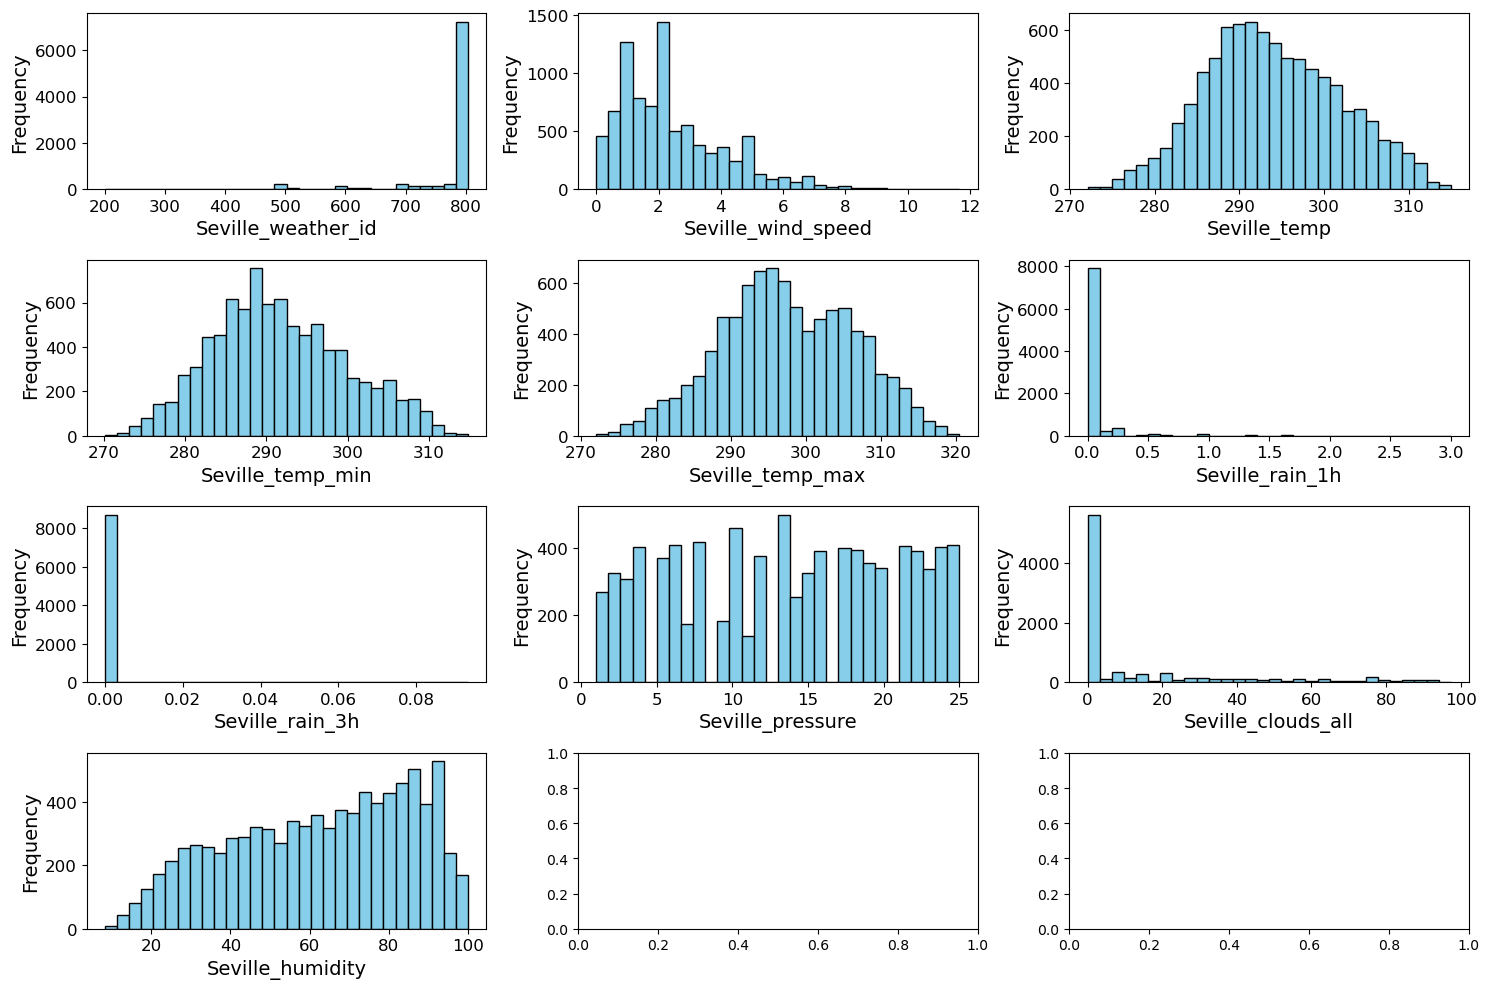

In [1693]:
# Define the number of rows and columns for subplots
number_of_rows = 4  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_Seville.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_Seville[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In the examination of Seville's weather data, we've identified distinct skewness patterns within various weather variables.

**Highly Right Skew:**
Certain variables, like wind speed, rainfall for 1 and 3 hours, and cloud coverage, exhibit a significant rightward or positive skew. This implies a prevalence of higher values in these categories. Seville experiences occasional strong winds, heavy short-term and prolonged rainfall, as well as cloudier weather, which aligns with these skewed patterns.

**High Left Skew:**
Other variables such as `Seville_weather_id`, displays a significant leftward or negative skew. This suggests frequent occurrences of specific weather conditions, denoted by lower weather IDs. Seville tends to experience certain consistent weather states, which contribute to this skewed pattern.

**Relatively Symmetrical:**
Certain variables, including temperature, temperature minimum and maximum, pressure, and humidity, exhibit a more symmetrical distribution around their means. This means that these aspects of weather, such as temperature levels and humidity, are fairly evenly spread around their average values, indicating a balanced climate in these aspects.

These skewness patterns offer qualitative insights into Seville's weather characteristics, which are essential for our subsequent analyses and modeling efforts, guiding our predictions and interpretations related to Seville's weather dynamics.

Finally, we will use the `kurtosis()` function to assess the shape and tail behavior of a probability distribution.

In [1694]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_Seville.kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers):                              0
Seville_weather_id   10.710308
Seville_rain_1h      93.840746
Seville_rain_3h     413.136592 
 

Low kurtosis (Small amount of outliers):                            0
Seville_wind_speed  1.398580
Seville_temp       -0.504132
Seville_temp_min   -0.475564
Seville_temp_max   -0.515989
Seville_pressure   -1.220040
Seville_clouds_all  2.155921
Seville_humidity   -1.017983 
 



The presented findings reveal the kurtosis values for specific variables in the dataset, indicating the presence of outliers.

**High Kurtosis (Large Amount of Outliers):**
Variables like `Seville_weather_id`, `Seville_rain_1h`, and `Seville_rain_3h` demonstrate high kurtosis, indicating a significant number of outliers. These variables contain extreme values that deviate substantially from the typical range. For instance, `Seville_rain_3h` has a very high kurtosis, suggesting rare but impactful events where there is an exceptionally heavy rainfall over a 3-hour period. 

**Low Kurtosis (Small Amount of Outliers):**
Variables such as `Seville_wind_speed`, `Seville_temp`, `Seville_temp_min`, `Seville_temp_max`, `Seville_pressure`, `Seville_clouds_all`, and `Seville_humidity` exhibit low kurtosis, indicating a distribution where most values cluster around the mean. These variables have fewer outliers, suggesting a more stable and typical range of values. For example, Seville_wind_speed has a low kurtosis, indicating that wind speeds in Seville generally fall within a predictable range. 

##### 5.1.6. `df_Valencia`:

In the final section dedicated to the analysis of Valencia city, a focused dataset, named `df_Valencia`, has been meticulously crafted, encompassing exclusively the variables pertinent to Valencia. 

In [1695]:
df_Valencia = df_clean[['Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 'Valencia_temp_min' , 'Valencia_snow_3h' , 
           'Valencia_pressure', 'Valencia_humidity']]

 We will commence our exploration by examining the initial entries of the `df_Valencia` DataFrame. This pivotal step allows us to glean essential insights from the first two rows of the dataset, laying the foundation for our comprehensive analysis and informed decision-making in the modeling process.

In [1696]:
df_Valencia.head(2)

Valencia_wind_speed  Valencia_wind_deg  Valencia_temp  Valencia_temp_max  \
0             0.666667                  5     269.888000         269.888000   
1             1.666667                 10     271.728333         271.728333   

   Valencia_temp_min  Valencia_snow_3h  Valencia_pressure  Valencia_humidity  
0         269.888000               0.0        1002.666667          75.666667  
1         271.728333               0.0        1004.333333          71.000000

Next, let's look at some descriptive statistics:

In [1697]:
df_Valencia.describe()

Valencia_wind_speed  Valencia_wind_deg  Valencia_temp  \
count          8763.000000        8763.000000    8763.000000   
mean              2.586272           5.276389     290.592152   
std               2.411190           2.877642       7.162274   
min               0.000000           1.000000     269.888000   
25%               1.000000           3.000000     285.150000   
50%               1.666667           5.000000     290.176667   
75%               3.666667           8.000000     296.056667   
max              52.000000          10.000000     310.426667   

       Valencia_temp_max  Valencia_temp_min  Valencia_snow_3h  \
count        8763.000000        8763.000000       8763.000000   
mean          291.337233         289.867648          0.000205   
std             7.565692           6.907402          0.011866   
min           269.888000         269.888000          0.000000   
25%           285.550167         284.783333          0.000000   
50%           291.037000         289.550000          0.000000   
75%           297.248333         294.820000          0.000000   
max           314.263333         310.272000          0.791667   

       Valencia_pressure  Valencia_humidity  
count        8763.000000        8763.000000  
mean         1013.455228          65.247727  
std             8.684485          19.262322  
min           972.666667          10.333333  
25%          1012.666667          51.333333  
50%          1017.000000          67.000000  
75%          1018.000000          81.333333  
max          1021.666667         100.000000

##### *5.1.6.1. Skewness and kurtosis:*

To quantify the skewness of the data in the Valencia dataset, we will utilize the `skew()` function. This analytical tool will provide precise numerical values, allowing us to quantitatively assess the distributional characteristics of the variables in the dataset. By leveraging this method, we aim to gain a deeper understanding of the skewness patterns, essential for our meticulous analysis and modeling efforts in the Valencia context.

In [1698]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_Valencia.skew().to_frame()

# Display variables with high skewness
High_right_Skew = skew_df[(skew_df[0] >= 1)]
High_left_Skew = skew_df[(skew_df[0] <= -1)]
print("Highly right skew:", High_right_Skew, "\n \n")
print("High left skew:", High_left_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Right_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Left_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate Right skew:", Mod_Right_Skew, "\n \n")
print("Moderate Left skew:", Mod_Left_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

Highly right skew:                              0
Valencia_wind_speed   3.499637
Valencia_snow_3h     63.298084 
 

High left skew:                           0
Valencia_pressure -2.121882 
 

Moderate Right skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Left skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Relatively Symmetrical:                           0
Valencia_wind_deg  0.088354
Valencia_temp      0.057476
Valencia_temp_max  0.082672
Valencia_temp_min  0.081832
Valencia_humidity -0.305757 
 



Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

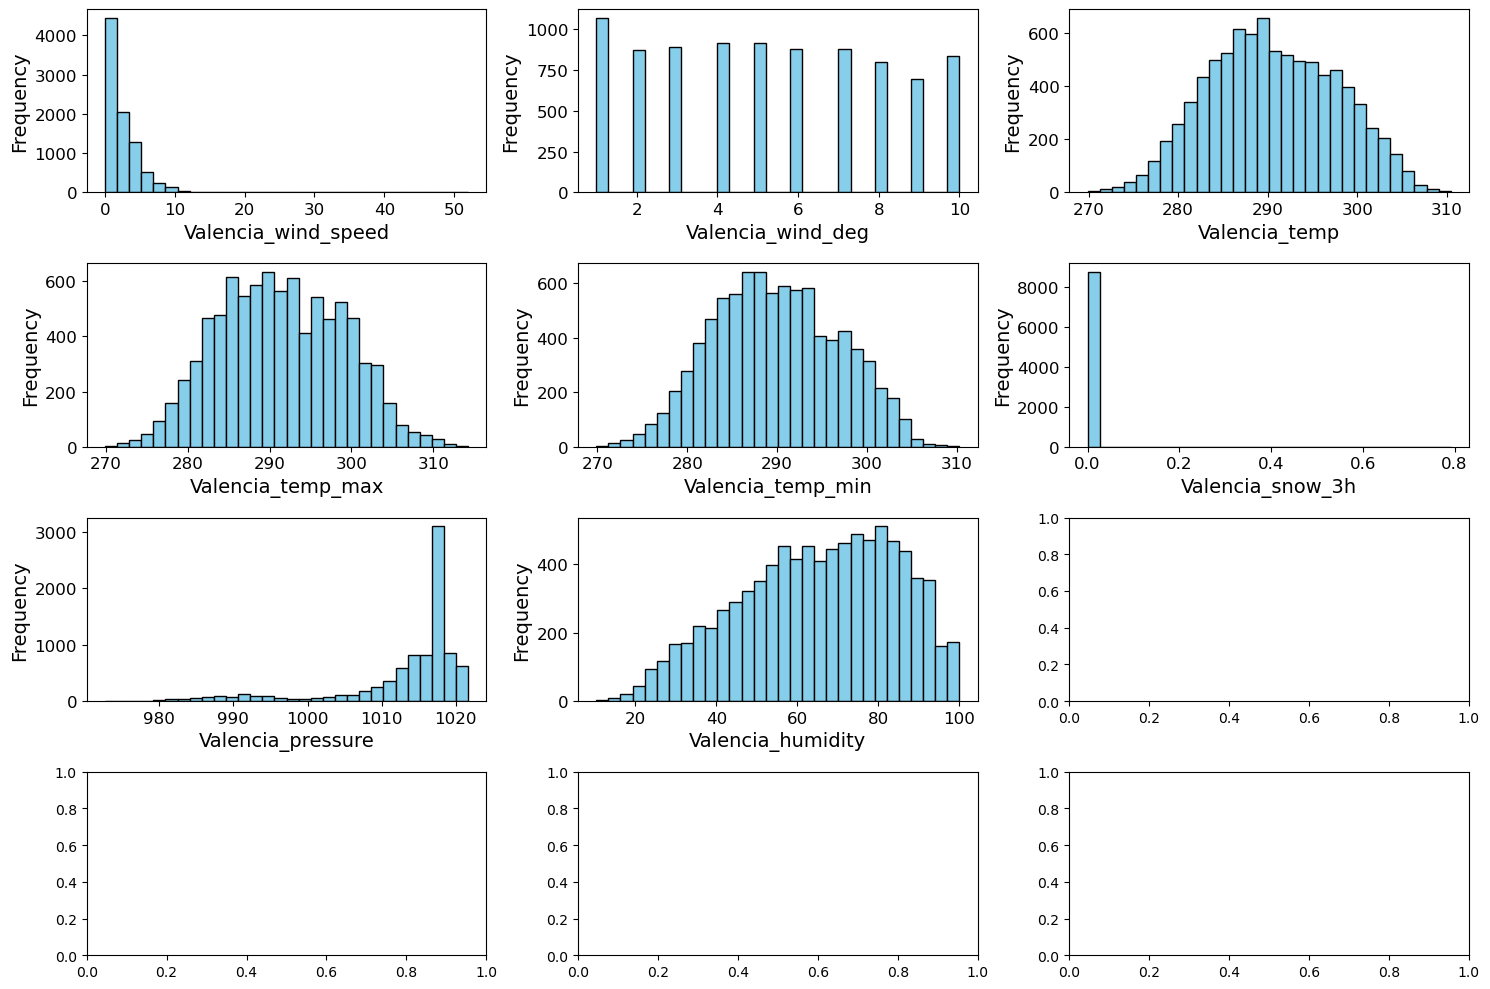

In [1699]:
# Define the number of rows and columns for subplots
number_of_rows = 4  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_Valencia.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_Valencia[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In our analysis of Valencia's weather data, we've identified notable skewness patterns within various weather variables.

**Highly Right Skew:**
Two variables, wind speed and snowfall for 3 hours, exhibit a significant rightward or positive skew. This suggests a prevalence of higher values in these categories. Valencia experiences occasional strong winds and rare instances of heavy snowfall, contributing to these skewed patterns.

**High Left Skew:**
Valencia_pressure displays a significant leftward or negative skew. This indicates frequent occurrences of lower pressure values in Valencia, highlighting a consistent atmospheric pressure pattern in the region.

**Relatively Symmetrical:**
Several variables, including wind degree, temperature, temperature minimum and maximum, and humidity, exhibit a more symmetrical distribution around their means. This means that these aspects of weather, such as wind direction, temperature levels, and humidity, are fairly evenly spread around their average values, indicating a balanced climate in these aspects in Valencia.

These skewness patterns provide qualitative insights into Valencia's weather characteristics, essential for our subsequent analyses and modeling efforts, guiding our predictions and interpretations related to Valencia's weather dynamics.

Finally, we will use the `kurtosis()` function to assess the shape and tail behavior of a probability distribution.

In [1700]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_Valencia.kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers):                                0
Valencia_wind_speed    35.645426
Valencia_snow_3h     4089.323165
Valencia_pressure       3.982718 
 

Low kurtosis (Small amount of outliers):                           0
Valencia_wind_deg -1.186661
Valencia_temp     -0.643793
Valencia_temp_max -0.613755
Valencia_temp_min -0.599551
Valencia_humidity -0.734345 
 



The presented findings reveal the kurtosis values for specific variables in the dataset, indicating the presence of outliers.

**High Kurtosis (Large Amount of Outliers):**
Variables like `Valencia_wind_speed`, `Valencia_snow_3h`, and `Valencia_pressure` exhibit high kurtosis, indicating a significant number of outliers. These variables contain extreme values that deviate substantially from the typical range, denoting rare but impactful events such as extreme wind speeds and unusual atmospheric pressure readings. 

**Low Kurtosis (Small Amount of Outliers):**
Variables including `Valencia_wind_deg`, `Valencia_temp`, `Valencia_temp_max`, `Valencia_temp_min`, and `Valencia_humidity` demonstrate low kurtosis, suggesting a distribution where most values cluster around the mean. These variables have fewer outliers, indicating a more stable and typical range of values. 

#### **5.2 Overall Data Analysis:**

##### 5.2.1 Compare variables with `load_shortfall_3h`:

Let's convert our data in order to analyze the average values across all cities:

In [1701]:
df_analyst = df_clean

We will extract and combine specific columns from `df_analyst`. We will gather columns related to cloud coverage, temperature, wind speed, and rainfall. The selected columns are then used to create `df_analyst[temp]`, showcasing the relevant information.

In [1702]:
# Harvesting unique features in the analyst data

# Initializing empty lists for different types of features
cloud = []
temp = []
speed = []
rain = []

# Extracting columns related to cloud cover
for col in df_analyst.columns:
    if "cloud" in col:
        cloud.append(col)

# Extracting columns related to temperature (ending with the letter "p")
for col in df_analyst.columns:
    if col[-1] == "p" in col:
        temp.append(col)

# Adding cloud columns to the temperature features for a comprehensive set
for i in cloud:
    temp.append(i)

# Extracting columns related to wind speed
for col in df_analyst.columns:
    if "speed" in col:
        speed.append(col)

# Extracting columns related to rainfall (specifically "rain_3h")
for col in df_analyst.columns:
    if "rain_3h" in col:
        rain.append(col)

# Creating a DataFrame with the selected features (temperature, cloud, speed, rain)
df_analyst[temp].head()

Barcelona_temp  Bilbao_temp  Madrid_temp  Seville_temp  Valencia_temp  \
0      281.013000   269.338615   265.938000    274.254667     269.888000   
1      280.561667   270.376000   266.386667    274.945000     271.728333   
2      281.583667   275.027229   272.708667    278.792000     278.008667   
3      283.434104   281.135063   281.895219    285.394000     284.899552   
4      284.213167   282.252063   280.678437    285.513719     283.015115   

   Bilbao_clouds_all  Madrid_clouds_all  Seville_clouds_all  
0                0.0                0.0                 0.0  
1                0.0                0.0                 0.0  
2                0.0                0.0                 0.0  
3                0.0                0.0                 0.0  
4                2.0                0.0                 0.0

This code extracts columns related to cloud cover from `df_analyst`. It creates a subset of the dataframe containing only these cloud-related columns and displays the first row of this subset for quick examination.

In [1703]:
# Extracting columns related to cloud cover

# Initializing an empty list for cloud-related columns
cloud = []

# Iterating through columns in the DataFrame
for col in df_analyst.columns:
    # Checking if the column name contains the term "cloud"
    if "cloud" in col:
        # Appending cloud-related column to the list
        cloud.append(col)

# Creating a DataFrame subset with the selected cloud-related columns and displaying the first row
df_analyst[cloud].head(1)

Bilbao_clouds_all  Madrid_clouds_all  Seville_clouds_all
0                0.0                0.0                 0.0

In this code, we are processing temperature and cloud-related data from `df_analyst`. We collect temperature-related columns by iterating through the DataFrame columns and selecting those ending with the letter "p." Additionally, we include specific columns (`year`, `month`, `load_shortfall_3h`) and previously gathered cloud-related columns. The code then creates a grouped summary based on `year` and `month`, calculating the mean for each group. Two new columns are computed, representing the average temperature and cloud cover across various locations. The last row of this grouped dataframe is displayed, providing a concise summary of the calculated values.

In [1704]:
# Initializing an empty list for temperature-related columns
temp = []

# Iterating through columns in the DataFrame
for col in df_analyst.columns:
    # Checking if the column name ends with the letter "p"
    if col[-1] == "p" in col:
        # Appending temperature-related column to the list
        temp.append(col)

# Adding specific columns and previously collected cloud-related columns to the list
temp.append("year")
temp.append("month")
temp.append("load_shortfall_3h")
for i in cloud:
    temp.append(i)

# Creating a grouped summary DataFrame based on "year" and "month," calculating mean for each group
groupsp = df_analyst[temp].groupby(["year", "month"], as_index=False).mean()

# Calculating additional columns for total temperature and total cloud cover
groupsp["total temp"] = (groupsp["Valencia_temp"] + groupsp["Seville_temp"] + groupsp["Barcelona_temp"]
                        + groupsp["Bilbao_temp"] + groupsp["Madrid_temp"]) / 5
groupsp["total cloud"] = (groupsp["Bilbao_clouds_all"] + groupsp["Seville_clouds_all"] + groupsp["Madrid_clouds_all"]) / 3

# Displaying the last row of the grouped summary DataFrame
groupsp.tail(1)

year  month  Barcelona_temp  Bilbao_temp  Madrid_temp  Seville_temp  \
35  2017     12      281.514933   280.072594   278.887647    283.420023   

    Valencia_temp  load_shortfall_3h  Bilbao_clouds_all  Madrid_clouds_all  \
35     283.713895       10041.087366          54.913978          24.333333   

    Seville_clouds_all  total temp  total cloud  
35           16.775538  281.521818    32.007616

We will process temperature-related columns from `df_analyst`, creating a grouped summary based on `year` and `month` with mean calculations. Subsequently, the `year` and `month` columns in the grouped dataframe are converted to string types. A new column, `ym`, is then created by concatenating the `year` and `month` columns, separated by a forward slash. The result is a concise representation of the year and month in a single string format, and the code displays the first few entries of this new `ym` column.

In [1705]:
# Creating a grouped summary DataFrame based on "year" and "month," calculating mean for each group
group = df_analyst[temp].groupby(["year", "month"], as_index=False).mean()

# Converting "year" and "month" columns to string type
group["year"] = group["year"].astype("str")
group["month"] = group["month"].astype("str")

# Creating a new column "ym" by concatenating "year" and "month" with a forward slash
group["ym"] = group["year"] + "/" + group["month"]

# Displaying the first few entries of the "ym" column
group["ym"].head()

0    2015/1
1    2015/2
2    2015/3
3    2015/4
4    2015/5
Name: ym, dtype: object

##### *5.2.1.1 Total cloud coverage VS load shortfall 3h in Spain:*

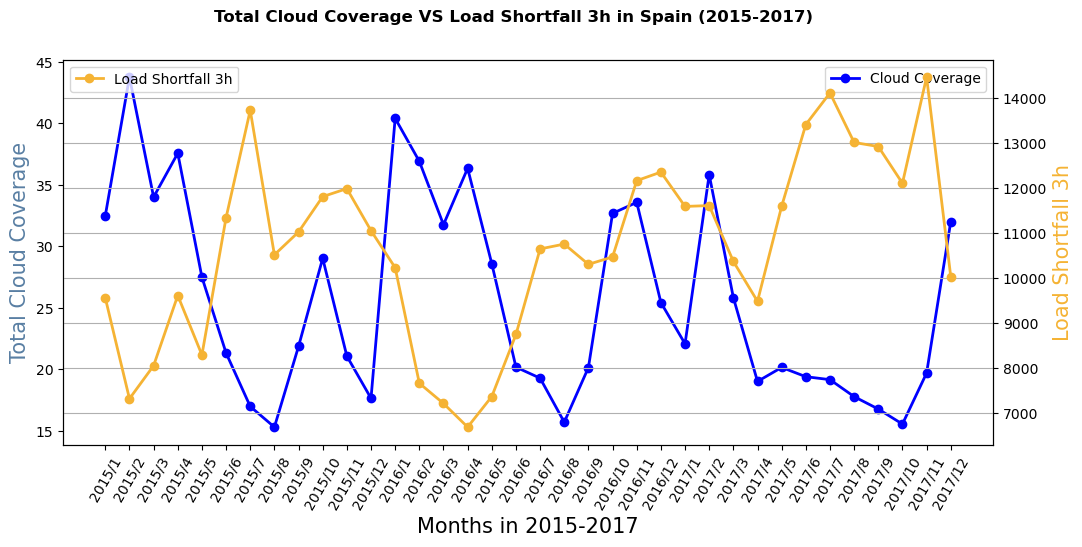

In [1706]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group["ym"], groupsp['total cloud'] ,
        color='b', linewidth=2, marker='o', label="Cloud Coverage")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('Total Cloud Coverage',  color='#597FA3', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()
l=groupsp["load_shortfall_3h"].loc[0:37]
# Now, plot the second line with ax2 axes
ax2.plot([col for col in range(len(l))],
         l,
         color='#F5B334', linewidth=2, marker='o', label="Load Shortfall 3h")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=9)
fig.suptitle('Total Cloud Coverage VS Load Shortfall 3h in Spain (2015-2017)', fontweight ="bold")
ax2.set_ylabel('Load Shortfall 3h', color="#F5B334",fontsize=15)
plt.legend()
plt.show()

Our analysis of the graph reveals an intriguing inverse relationship between total cloud coverage and load shortfall across the cities during the period from 2015 to 2017. Specifically, when examining the data, it becomes apparent that the peaks in load shortfall align with dips in total cloud coverage, indicating a potential correlation between these two factors.

During the initial period between May 2015 and July 2015, and then again from April 2017 to October 2017, load shortfall reaches its highest points. Interestingly, these periods coincide with lower total cloud coverage. This inverse pattern suggests that there might be a connection between decreased cloud coverage and increased energy demand or potential weather-related challenges leading to higher load shortfalls.

This observation is crucial for DRS' preparedness efforts. By recognizing this inverse relationship, the agency can anticipate potential energy demand spikes during periods of reduced cloud coverage, allowing for strategic resource allocation, targeted response planning, and enhanced disaster resilience measures, ensuring a more proactive and effective approach to managing energy supply challenges during adverse weather conditions.

Additionally, this proves yet again that solar power will be a good way to augment their renewable sources, since high shortfalls usually coincides with low cloud coverage, providing an optimal environment for solar power.

##### *5.2.1.2 Total temperature VS load shortfall 3h in Spain:*

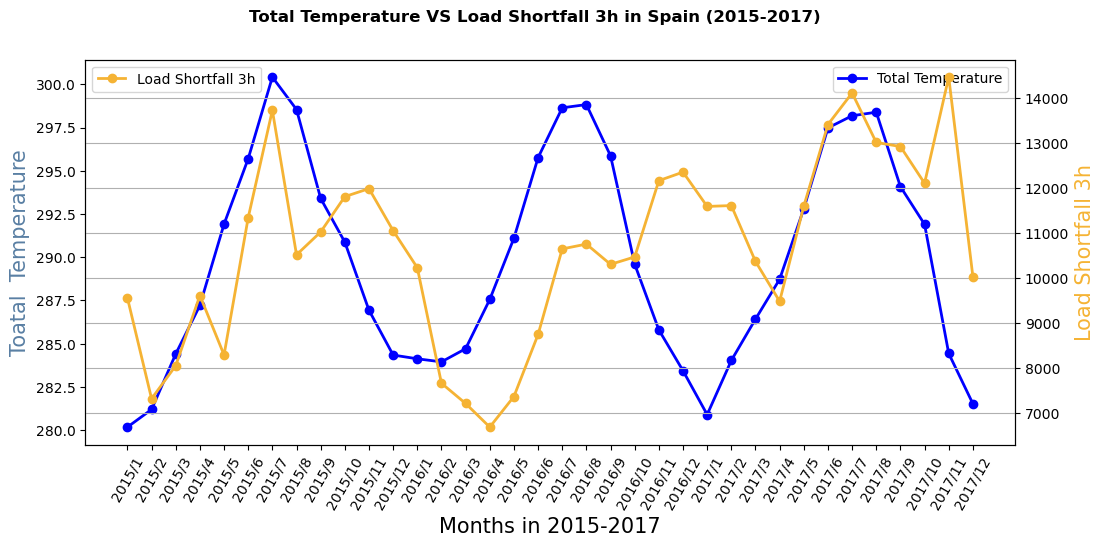

In [1707]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['ym'], groupsp["total temp"],
        color='b', linewidth=2, marker='o', label="Total Temperature")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('Toatal  Temperature',  color='#597FA3', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["ym"],
         group["load_shortfall_3h"].loc[0:37],
         color='#F5B334', linewidth=2, marker='o', label="Load Shortfall 3h")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Total Temperature VS Load Shortfall 3h in Spain (2015-2017)', fontweight ="bold")
ax2.set_ylabel('Load Shortfall 3h', color="#F5B334",fontsize=15)
plt.legend()
plt.show()

Upon close examination of the data, a clear direct correlation emerges between the total temperature of all cities and the load shortfall, underscoring the influence of temperature variations on energy demand. Throughout most of the analyzed period, the total temperature trends align with the load shortfall trends, indicating that higher temperatures generally coincide with increased energy demand and load shortfalls.

However, it is noteworthy that between October 2016 and April 2017, this direct correlation appears to deviate. During this period, despite fluctuations in temperature, the load shortfall remains relatively stable. This anomaly suggests that other factors might have mitigated the typical impact of temperature on energy demand during these specific months.

Additionally, two specific instances stand out from the overall pattern: July 2017 and November 2017. During these months, there is a notable mismatch between total temperature and load shortfall. Despite temperatures, the load shortfall is unexpectedly high. This divergence implies that there might be external factors or specific events influencing energy demand during these particular months, warranting further investigation.

Understanding these nuanced correlations and anomalies is pivotal for DRS' resilience planning. By recognizing the typical relationship between temperature and energy demand, the agency can anticipate and prepare for heightened load shortfalls during periods of elevated temperatures. Moreover, the identification of atypical months, such as July 2017 and November 2017, emphasizes the importance of exploring external variables and regional events that might impact energy demand, enabling the agency to refine its predictive models and enhance disaster preparedness strategies effectively.

Additionally, this proves yet again that solar power will be a good way to augment their renewable sources, since high shortfalls usually coincides with increased tempretures, providing an optimal environment for solar power.

##### *5.2.1.3 Total wind speed across VS load shortfall 3h in Spain:*

In this code segment, the `year` and `month` columns in the existing DataFrame group are converted to string type and then combined into a new column `ym` using a forward slash as a separator. Subsequently, a list of columns related to wind speed, including `year`, `month`, and `load_shortfall_3h`, is created. `groupsp` is then generated by grouping the original dataframe based on `year` and `month`, calculating the mean for each group. Additionally, a new column, `Avg_Wind_speed`, is computed as the mean wind speed across various locations. The resulting dataframe includes the `ym` column for time representation and displays the first few entries.

In [1708]:
# Converting "year" and "month" columns to string type and creating a new column "ym"
group["year"] = group["year"].astype("str")
group["month"] = group["month"].astype("str")
group["ym"] = group["year"] + "/" + group["month"]

# Creating a list of columns related to wind speed, including "year," "month," and "load_shortfall_3h"
speed = []
for col in df_analyst.columns:
    if "speed" in col:
        speed.append(col)
speed.append("year")
speed.append("month")
speed.append("load_shortfall_3h")

# Creating a new DataFrame "groupsp" by grouping based on "year" and "month," calculating mean
groupsp = df_analyst[speed].groupby(["year", "month"], as_index=False).mean()

# Computing a new column "Avg_Wind_speed" as the mean wind speed across locations
groupsp["Avg_Wind_speed"] = groupsp.drop(columns=["year", "month", "load_shortfall_3h"]).mean(axis=1)

# Adding the "ym" column from the previous DataFrame for time representation
groupsp["ym"] = group["ym"]

# Displaying the first few entries of the resulting DataFrame
groupsp.head()

year  month  Barcelona_wind_speed  Bilbao_wind_speed  Madrid_wind_speed  \
0  2015      1              2.289796           1.651701           2.191837   
1  2015      2              3.033033           1.827327           3.614114   
2  2015      3              4.055780           1.090054           2.475806   
3  2015      4              2.643056           1.162500           2.919444   
4  2015      5              2.981183           1.295699           3.263441   

   Seville_wind_speed  Valencia_wind_speed  load_shortfall_3h  Avg_Wind_speed  \
0            3.004082             4.776871        9567.351701        2.782857   
1            3.241742             5.929429        7327.774775        3.529129   
2            2.393145             2.579301        8062.243280        2.518817   
3            2.408333             2.290278        9621.084722        2.284722   
4            2.778226             2.067204        8300.656586        2.477151   

       ym  
0  2015/1  
1  2015/2  
2  2015/3  
3  2015/4  
4  2015/5

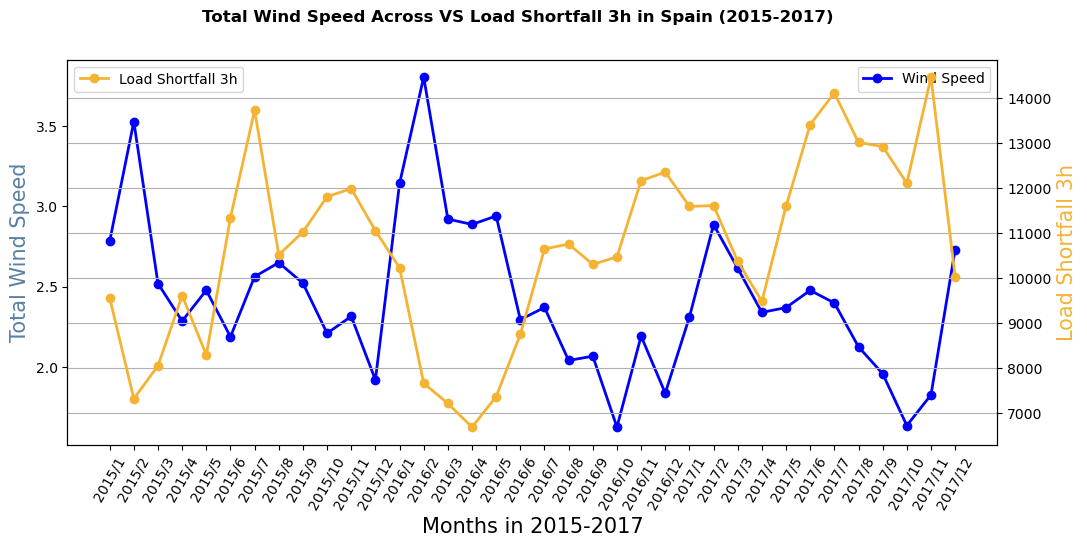

In [1709]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['ym'], groupsp["Avg_Wind_speed"].loc[0:37],
        color='b', linewidth=2, marker='o', label="Wind Speed")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('Total Wind Speed',  color='#597FA3', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["ym"],
         group["load_shortfall_3h"].loc[0:37],
         color='#F5B334', linewidth=2, marker='o', label="Load Shortfall 3h")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Total Wind Speed Across VS Load Shortfall 3h in Spain (2015-2017)', fontweight ="bold")
ax2.set_ylabel('Load Shortfall 3h', color="#F5B334",fontsize=15)
plt.legend()
plt.show()

A striking inverse relationship is evident between total wind speed and load shortfall across the analyzed period. This inverse correlation implies that as wind speed increases, the load shortfall tends to decrease, and vice versa. This pattern underscores the impact of wind speed on energy generation and distribution, with higher wind speeds potentially contributing to increased energy production, thus mitigating load shortfalls.

Notably, three specific periods stand out due to significant load shortfall spikes: July 2015, July 2017, and November 2017. During these months, despite varying wind speeds, the load shortfalls reach their peak levels. This discrepancy suggests that factors beyond wind speed alone are influencing energy demand and supply, leading to pronounced load shortfalls during these specific periods.

Understanding this inverse relationship between total wind speed and load shortfall provides valuable insights for DRS' resilience planning efforts. By leveraging this correlation, the agency can anticipate periods of potential energy shortfalls based on wind speed forecasts. However, the identified anomalies in July 2015, July 2017, and November 2017 indicate that there are additional factors contributing to load shortfalls during these months.

Additionally, this indicates tha wind power will be a good way to augment their renewable sources, since high shortfalls usually coincides with low wind speeds, providing an optimal environment for wind power.

##### *5.2.1.4 Total rain 3h VS load shortfall 3h in Spain:*

In this code, a list of columns related to `rain_3h` is created, including `year`, `month`, and `load_shortfall_3h`. Subsequently, `rains` is generated by grouping the original dataframe based on `year` and `month` and calculating the mean for each group. Additionally, a new column, `rain_3h`, is computed as the mean rainfall across various locations. The resulting dataframe provides insights into the average rainfall for each month. Lastly, the `ym` column from the previous dataframe (`groupsp`) is added to this rainfall dataframe for time representation, and the first few entries are displayed.

In [1710]:
# Creating a list of columns related to 3-hour rainfall, including "year," "month," and "load_shortfall_3h"
rain = []
for col in df_analyst.columns:
    if "rain_3h" in col:
        rain.append(col)
rain.append("year")
rain.append("month")
rain.append("load_shortfall_3h")

# Creating a new DataFrame "rains" by grouping based on "year" and "month," calculating mean
rains = df_analyst[rain].groupby(["year", "month"], as_index=False).mean()

# Computing a new column "rain_3h" as the mean rainfall across locations
rains["rain_3h"] = rains.drop(columns=["year", "month", "load_shortfall_3h"]).mean(axis=1)

# Displaying the resulting DataFrame providing insights into average rainfall for each month
rains

# Adding the "ym" column from the previous DataFrame for time representation
groupsp["ym"] = group["ym"]

# Displaying the first few entries of the DataFrame related to wind speed ("groupsp")
groupsp.head()

year  month  Barcelona_wind_speed  Bilbao_wind_speed  Madrid_wind_speed  \
0  2015      1              2.289796           1.651701           2.191837   
1  2015      2              3.033033           1.827327           3.614114   
2  2015      3              4.055780           1.090054           2.475806   
3  2015      4              2.643056           1.162500           2.919444   
4  2015      5              2.981183           1.295699           3.263441   

   Seville_wind_speed  Valencia_wind_speed  load_shortfall_3h  Avg_Wind_speed  \
0            3.004082             4.776871        9567.351701        2.782857   
1            3.241742             5.929429        7327.774775        3.529129   
2            2.393145             2.579301        8062.243280        2.518817   
3            2.408333             2.290278        9621.084722        2.284722   
4            2.778226             2.067204        8300.656586        2.477151   

       ym  
0  2015/1  
1  2015/2  
2  2015/3  
3  2015/4  
4  2015/5

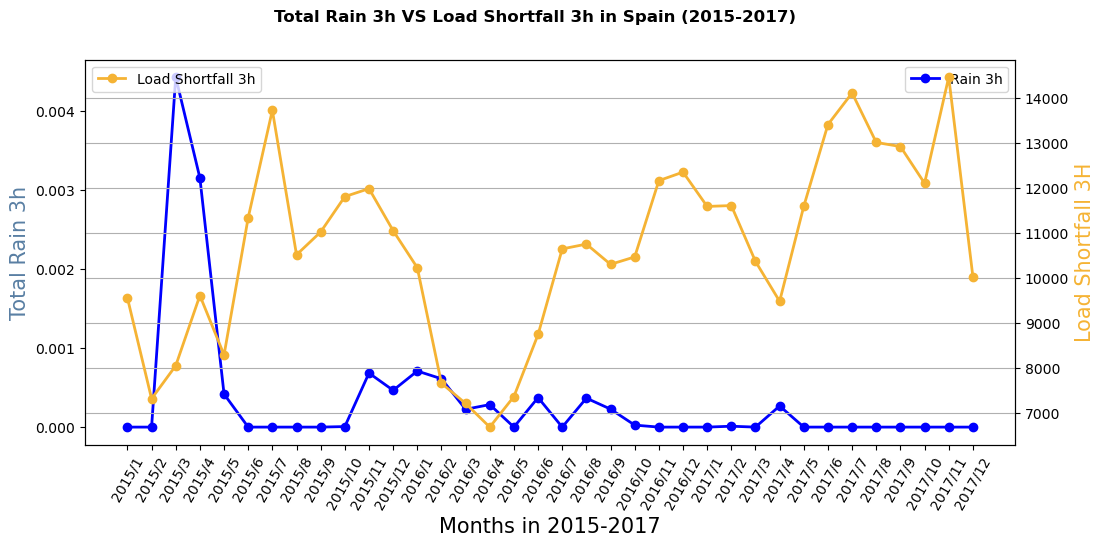

In [1711]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['ym'], rains["rain_3h"],
        color='b', linewidth=2, marker='o', label="Rain 3h")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('Total Rain 3h',  color='#597FA3', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["ym"],
         group["load_shortfall_3h"],
         color='#F5B334', linewidth=2, marker='o', label="Load Shortfall 3h")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Total Rain 3h VS Load Shortfall 3h in Spain (2015-2017)', fontweight ="bold")
ax2.set_ylabel('Load Shortfall 3H', color="#F5B334",fontsize=15)
plt.legend()
plt.show()

A thorough examination of the relationship between total 3-hour rainfall across all cities and load shortfall indicates a lack of significant correlation. Despite a noticeable spike in 3-hour rainfall in March 2015, the corresponding increase in load shortfall is relatively modest, suggesting a weak connection between these variables during that period.

This observed lack of correlation emphasizes the complexity of factors influencing energy demand and supply during adverse weather conditions. While rainfall can impact energy production, it appears that the 3-hour rainfall metric alone does not strongly influence load shortfalls across the analyzed timeframe.

Therefore, hydro renewable sources might not be the best path to augment Spain's non-renewable sources.

##### 5.2.3. Correlations:

Correlation coefficient is a measure of the how variables are related to one another. It is a standardized covariance, which measures how two random variables change with respect to each other. Since Covariance is scale dependent, we use the correlation coefficient (specifically Pearson Correlation) which standardizes the covariance to a scale between -1 and 1.

* A correlation coefficient closer 1 represents a strong linear relationship in the same direction, 
* A correlation coefficient closer to -1 represents a strong linear relationship in the opposite direction,
* A correlation closer to 0 represents a weak relationship.

The formula is given by:
$$\rho=\frac{Cov(X,Y)}{\sigma(X)\sigma(Y)}$$
Where
* $Cov(X,Y)$ represents the covariance between X and Y
* $\sigma(X)$ & $\sigma(Y)$ represent the standard deviations of X & Y respectively

Let's utilize the corr() function to explore the correlations among our dataset variables. Correlation analysis enables us to discern relationships between different features, shedding light on potential dependencies within the data. This quantitative approach is fundamental in identifying patterns and guiding subsequent analytical decisions, enriching our understanding of the underlying dynamics in the dataset.

In [1712]:
df_clean.corr()

season      year     month       day  hourofday  \
season                1.000000 -0.000943  0.574388  0.002138   0.000302   
year                 -0.000943  1.000000 -0.001039 -0.001044   0.000275   
month                 0.574388 -0.001039  1.000000  0.008826   0.000301   
day                   0.002138 -0.001044  0.008826  1.000000   0.000285   
hourofday             0.000302  0.000275  0.000301  0.000285   1.000000   
Barcelona_weather_id -0.024873  0.029048  0.025352 -0.035885  -0.003444   
Barcelona_wind_speed -0.076571 -0.188756 -0.122221 -0.009699   0.182538   
Barcelona_wind_deg   -0.081097 -0.155275  0.021463 -0.039703  -0.192949   
Barcelona_temp        0.527081  0.001255  0.203184 -0.001659   0.217222   
Barcelona_temp_min    0.479905  0.053927  0.159629  0.002132   0.242716   
Barcelona_temp_max    0.543246 -0.030199  0.230539 -0.004903   0.187865   
Barcelona_rain_1h     0.039031 -0.070716 -0.029252  0.024838   0.013064   
Barcelona_rain_3h    -0.039804 -0.089857 -0.056726 -0.021814   0.003572   
Barcelona_pressure   -0.034567 -0.031373 -0.033473  0.015850  -0.009208   
Bilbao_weather_id     0.108194  0.154810  0.141738 -0.017562   0.006213   
Bilbao_wind_speed    -0.141810  0.082611 -0.086698 -0.008020   0.197848   
Bilbao_wind_deg      -0.078052 -0.104647 -0.174941  0.034253   0.110457   
Bilbao_temp           0.459051  0.002317  0.239443  0.020639   0.268754   
Bilbao_temp_min       0.450996 -0.038517  0.195889  0.016794   0.274208   
Bilbao_temp_max       0.451982  0.056996  0.277963  0.021208   0.256644   
Bilbao_rain_1h       -0.144427 -0.200747 -0.188274  0.072752   0.054527   
Bilbao_snow_3h       -0.074332 -0.069949 -0.075644 -0.055138   0.024233   
Bilbao_pressure      -0.214626 -0.026344  0.010533 -0.036101  -0.013025   
Bilbao_clouds_all    -0.037711 -0.031658 -0.117452  0.025688  -0.023714   
Madrid_weather_id     0.082069  0.026844  0.068856 -0.031751  -0.038504   
Madrid_wind_speed    -0.149807 -0.031553 -0.237445 -0.029954   0.186228   
Madrid_temp           0.467024  0.029974  0.182860  0.000861   0.290699   
Madrid_temp_min       0.426441  0.034880  0.157368  0.023009   0.270623   
Madrid_temp_max       0.472483  0.032496  0.191223 -0.007056   0.282868   
Madrid_rain_1h       -0.044203 -0.049055 -0.070592  0.025567   0.045349   
Madrid_pressure       0.094014  0.315294  0.269350 -0.033318  -0.009907   
Madrid_clouds_all    -0.217232 -0.083585 -0.118792  0.035940   0.022679   
Madrid_humidity      -0.344818 -0.084456 -0.076567  0.047372  -0.307872   
Seville_weather_id    0.097999  0.041378  0.100786  0.000676   0.020949   
Seville_wind_speed   -0.090860 -0.055772 -0.122624 -0.030206   0.251261   
Seville_temp          0.482373 -0.028691  0.213623 -0.017066   0.328541   
Seville_temp_min      0.477059 -0.031599  0.205000 -0.012197   0.358350   
Seville_temp_max      0.419200 -0.025059  0.193143 -0.020344   0.235839   
Seville_rain_1h      -0.059126 -0.054395 -0.072631  0.004315   0.016365   
Seville_rain_3h      -0.029696 -0.068058 -0.055265  0.004448   0.010921   
Seville_pressure     -0.321763 -0.126372 -0.036368 -0.008461  -0.059733   
Seville_clouds_all   -0.184436 -0.089657 -0.170345  0.010582  -0.017401   
Seville_humidity     -0.292314 -0.045730 -0.111622  0.032979  -0.424982   
Valencia_wind_speed  -0.221606 -0.012650 -0.237156 -0.000340   0.204103   
Valencia_wind_deg    -0.156524 -0.057513 -0.140195 -0.010627  -0.138415   
Valencia_temp         0.491729  0.067764  0.216464 -0.000728   0.280332   
Valencia_temp_max     0.492845  0.018818  0.210184 -0.002345   0.257827   
Valencia_temp_min     0.479553  0.119432  0.220501  0.002727   0.296154   
Valencia_snow_3h     -0.023356 -0.021228 -0.022720 -0.023046  -0.001360   
Valencia_pressure    -0.020205  0.210942  0.085883 -0.056908  -0.022716   
Valencia_humidity     0.042495 -0.033132  0.162713  0.047823  -0.351680   
load_shortfall_3h     0.176688  0.131324  0.199048  0.092116   0.139285   

                      Barcelona_weather_id  Barc

Considering the extensive nature of our dataset involving 52 variables, an intuitive approach to grasp the interrelationships is through a visual representation. A heatmap of correlation provides a clear, graphical depiction of the correlation coefficients among the variables. By employing this visualization, we can readily discern patterns of strong correlations, facilitating a more precise understanding of the intricate relationships within our data. This visual analysis enhances our ability to identify key variables and informs our subsequent analytical decisions effectively.

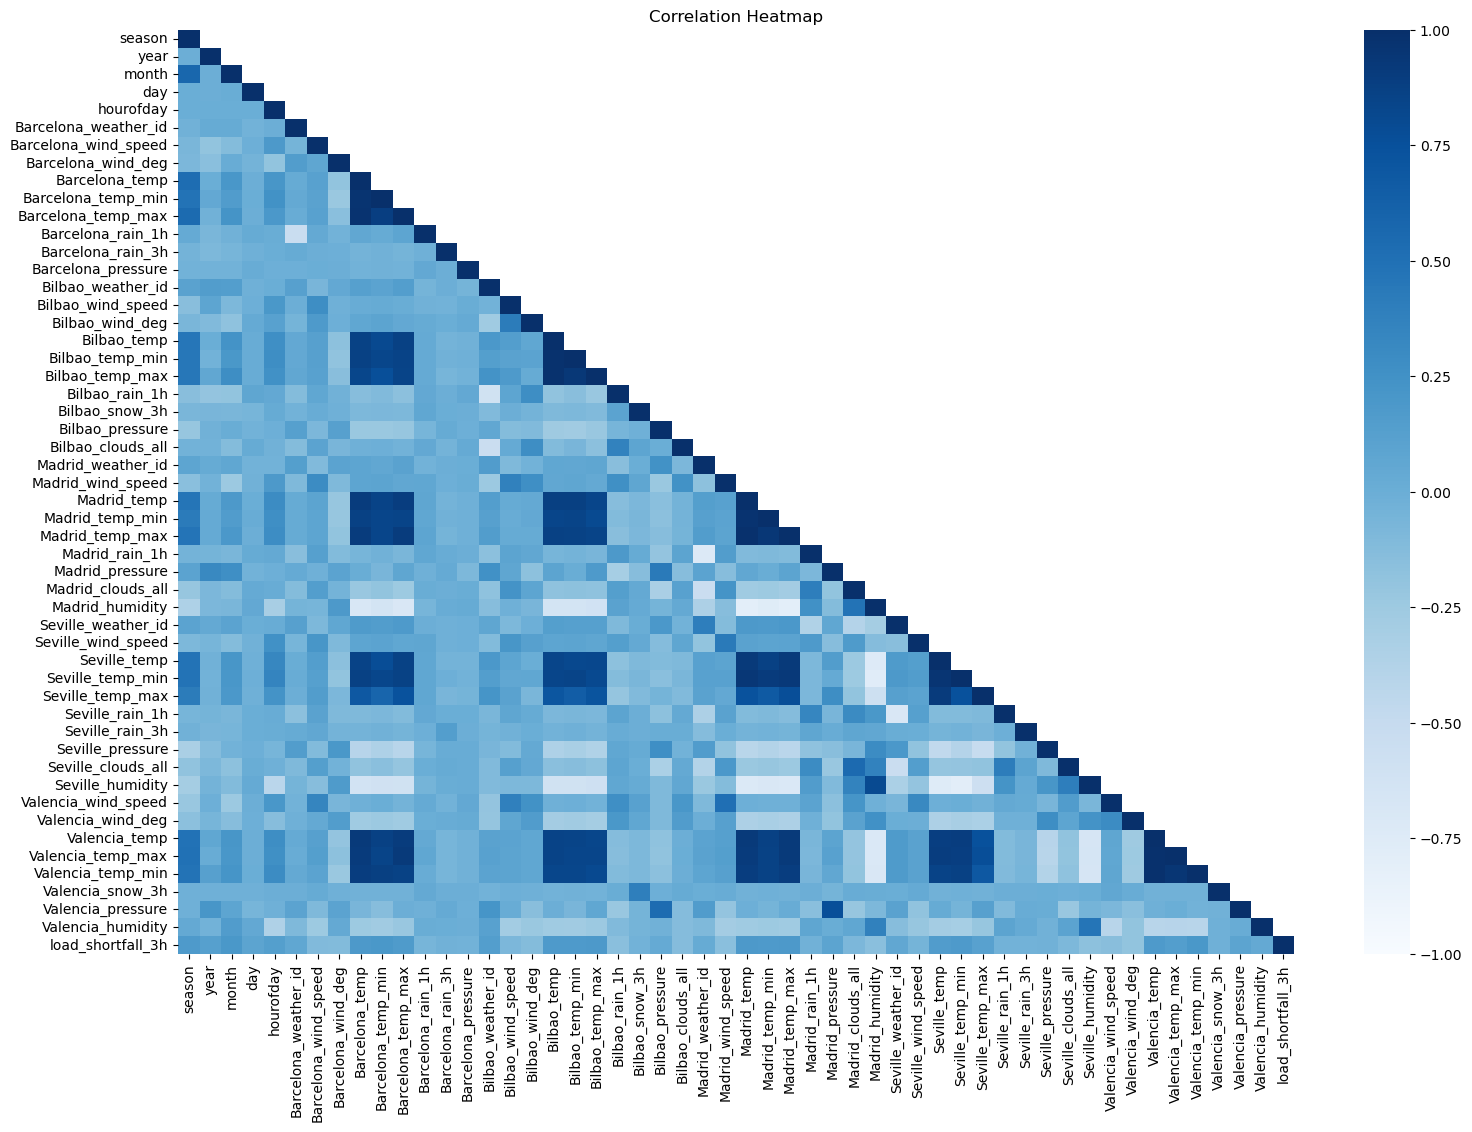

In [1713]:
# Initiate a new figure object to plot our heatmap (increased figsize)
plt.figure(figsize=(18, 12))

# We look at only the lower triangle of the array, since it is symmetric around the diagonal
mask = np.tril(df_clean.corr()) == 0

# Plotting the heatmap with blue color map
sns.heatmap(df_clean.corr(),
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap='Blues'  # Change the color map to blue
           )

plt.title('Correlation Heatmap');
plt.show() 

**Temperature and Seasonal Correlations:**
Unsurprisingly, the heatmap vividly illustrates a robust correlation between temperatures across diverse cities, aligning logically with the influence of seasons. As anticipated, cities experience similar temperature fluctuations based on their geographical locations and prevailing seasons.

**Pressure and Humidity Correlations:**
Additionally, noteworthy correlations emerge between atmospheric pressure and humidity levels within the cities. These relationships shed light on the intricate dynamics of weather patterns and atmospheric conditions, offering a glimpse into the interconnectedness of these variables.

**Load Shortfall and Multifaceted Correlations:**
One of the most intriguing findings pertains to the correlations involving `load_shortfall_3h`. This variable exhibits significant connections not only with temperatures but also with several temporal parameters, including year, month, day, and hour of the day. This intricate web of correlations suggests that electricity load shortfalls are influenced by a multitude of factors, spanning both meteorological and temporal dimensions.

In order to substantiate the inferences drawn from our analysis, a rigorous exploration of the dataset is imperative. One pivotal aspect is to identify the variables most intricately linked with `load_shortfall_3h`. This discernment will not only bolster our understanding but also serve as a cornerstone for the subsequent modeling endeavors. Let us now proceed to ascertain the ten most highly correlated variables with `load_shortfall_3h`, thereby elucidating the intricate relationships within the dataset.

In [1714]:
# Find the ten most correlated variables with the target variable
corr_top10_df = (
    df_clean.corr()['load_shortfall_3h']
    .apply(lambda x : abs(x))
    .sort_values(ascending=False)
    .head(11)
)

# Display predictor variables
corr_top10_df[1:11]

Valencia_temp_min     0.201863
month                 0.199048
Barcelona_temp_min    0.195984
Valencia_wind_deg     0.188674
Madrid_temp           0.186036
Barcelona_temp        0.182673
Madrid_temp_max       0.182548
Bilbao_temp_max       0.180934
season                0.176688
Bilbao_temp           0.176411
Name: load_shortfall_3h, dtype: float64

The analysis reveals compelling correlations between `load_shortfall_3h` and various environmental and temporal factors. Specifically, higher minimum temperatures in Valencia and Barcelona, along with elevated temperatures in Madrid and Bilbao, are positively associated with increased `load_shortfall_3h`. Additionally, wind direction in Valencia, maximum temperatures in Madrid and Bilbao, and specific months and seasons also exhibit positive correlations with `load_shortfall_3h`. These findings underscore the multifaceted nature of energy shortfalls, indicating that both weather-related variables and temporal patterns significantly impact the energy demand-supply dynamics in the studied regions.

Based on the aforementioned data, it is evident that even our most highly correlated predictor variable shows a relatively modest correlation with our target variable. To gain deeper insights, let's explore this further by visualizing the correlations between the top ten variables.

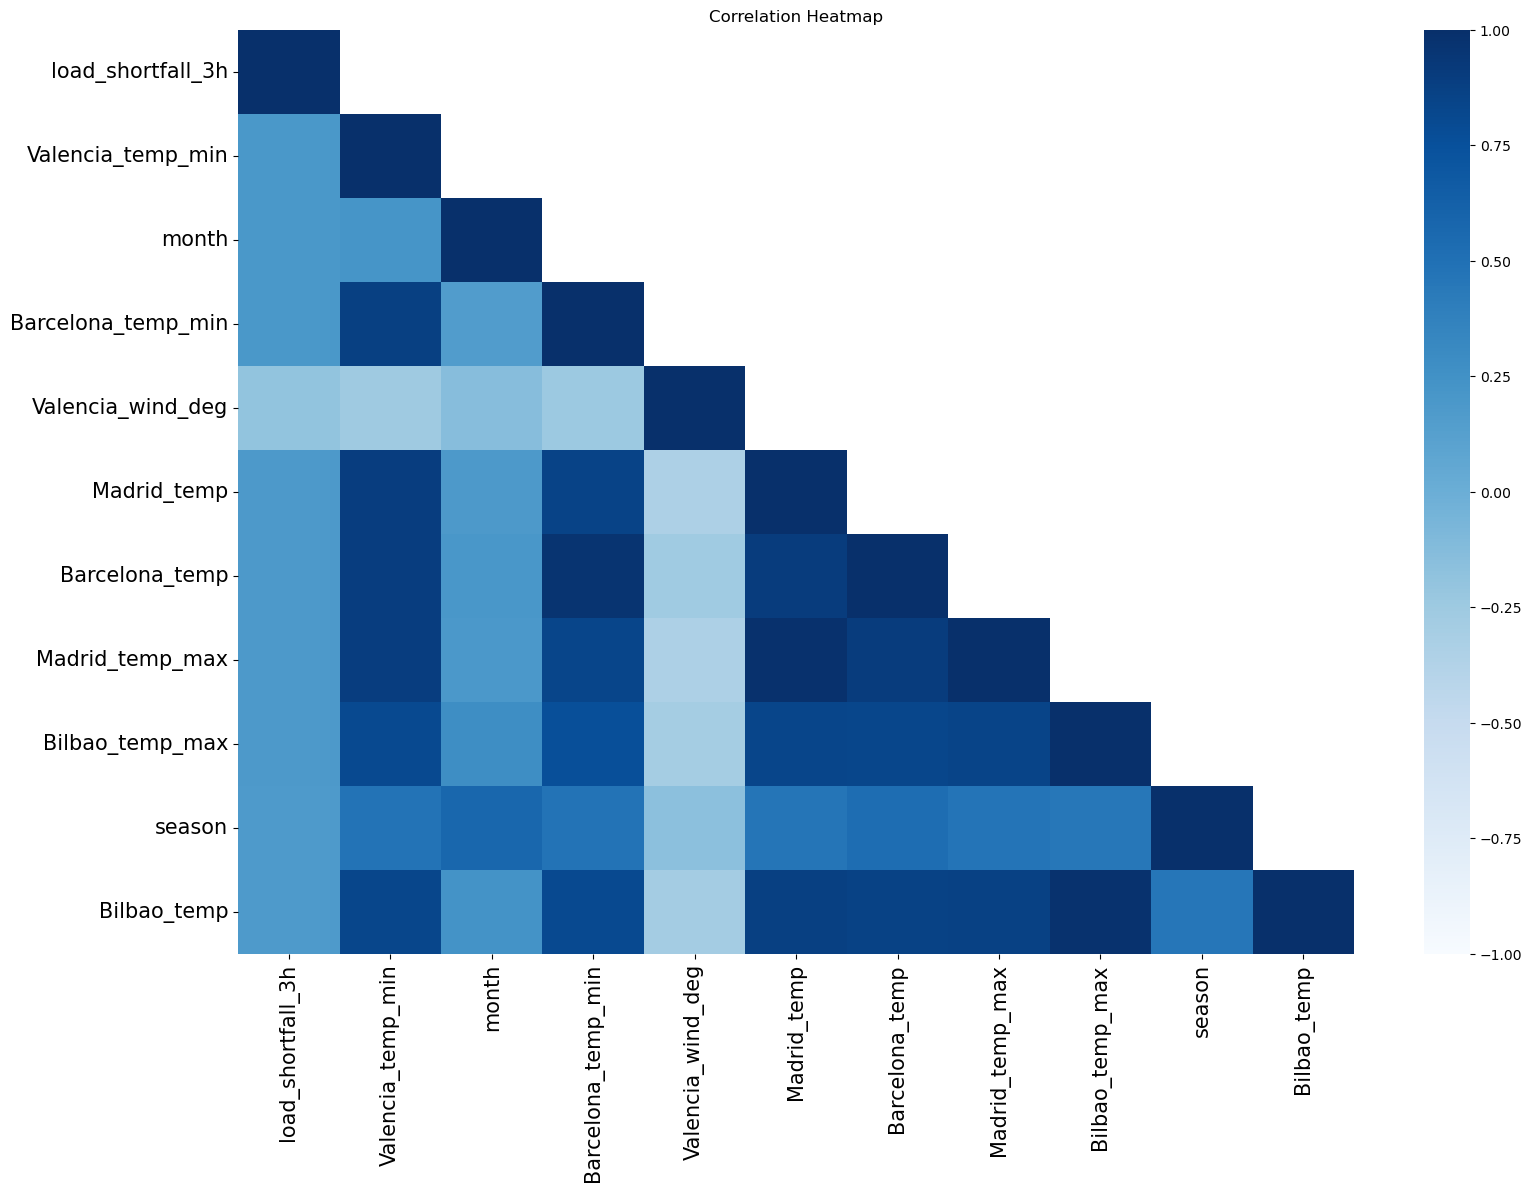

In [1715]:
# Find the ten most correlated variables with the target variable
corr_top10_vars = (
    df_clean.corr()['load_shortfall_3h']
    .apply(lambda x: abs(x))
    .sort_values(ascending=False)
    .head(11)
    .index  # Extracting the variable names
)

# Extract the corresponding subset of the DataFrame
corr_top10_df = df_clean[corr_top10_vars]

# Initiate a new figure object to plot our heatmap (increased figsize)
plt.figure(figsize=(18, 12))

# We look at only the lower triangle of the array, since it is symmetric around the diagonal
mask = np.tril(corr_top10_df.corr()) == 0

# Plotting the heatmap with blue color map
heatmap = sns.heatmap(corr_top10_df.corr(),
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap='Blues'  # Change the color map to blue
           )

# Adjust the axis label size
heatmap.tick_params(axis='both', labelsize=15)  # You can adjust the font size as needed

plt.title('Correlation Heatmap');
plt.savefig('correlation_heatmap', dpi=600)
plt.show()

Once more, the data presented reinforces the observation that none of the predictors exhibit a significantly high correlation with `load_shortfall_3h`. However, noteworthy correlations between predictors, such as `valencia_temp_min` and `valencia_temp`, suggest the presence of multicollinearity. This phenomenon, where predictors are strongly correlated with each other, can lead to less reliable statistical inferences when constructing predictive models. Distinguishing the individual effects of variables on the target variable becomes challenging due to this interrelation, emphasizing the need for careful consideration and handling of multicollinearity in the modeling process.

A viable approach to mitigate the impact of multicollinearity is by examining the variance of the variables and excluding features with minimal variation across observations, as they provide limited information to the model. This entails setting a specific variance threshold and eliminating all features that fall below this threshold. By implementing this method, we can enhance the quality of the data used for modeling, ensuring that the selected features contribute meaningful and distinct information, thereby improving the reliability of our predictive models.

We will address this in the next section of our notebook.

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we will create ten regression models that are able to accurately predict the thee hour load shortfall. |

---

### **6.1. Preprocessing Data:**

##### **6.1.1 Variance Threshold:**

A variance threshold is a technique used in feature selection to identify and remove features (variables) with low variance from a dataset. Variance measures the spread of values in a feature. Features with low variance indicate that their values don't vary much across different observations in the dataset. In the context of machine learning, these low-variance features carry minimal information as they don't contribute significantly to distinguishing between different instances. By removing these low-variance features, you can simplify the model, reduce overfitting, and improve its performance.

Since variance is dependent on scale, we will first need to standardise the features. Feature standardisation is a technique used in machine learning to transform the variables of a dataset so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1.

In [1716]:
# Split predictor variables from target variable
x_data = df_clean.drop(columns=['load_shortfall_3h'])  # Predictor variables (all columns except 'load_shortfall_3h')
y_data = df_clean['load_shortfall_3h']  # Target variable

# Standardising the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_data)
X_standardise_data = pd.DataFrame(X_scaled, columns=x_data.columns)

We can then implement an instance of the VarianceThreshold class contained in sklearn.feature_selection to select the correct subset of our features based on our chosen threshold (0.03 in this case):

In [1717]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_standardise_data)

VarianceThreshold(threshold=0.03)

Having applied this threshold to the data, we can view the calculated variance for each predictor variable:

In [1718]:
# Get column variances
column_variances = selector.variances_

# Create dictionary of column variances
vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_standardise_data.columns, column_variances)]

# Transform dictionary into a dataframe for better visualization
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

Variable_Name  Variance
1                   year  0.166467
0                 season  0.138013
4              hourofday  0.107136
23     Bilbao_clouds_all  0.105945
44     Valencia_wind_deg  0.102221
2                  month  0.098241
40      Seville_pressure  0.090924
3                    day  0.086009
16       Bilbao_wind_deg  0.080656
31     Madrid_clouds_all  0.078692
32       Madrid_humidity  0.067493
41    Seville_clouds_all  0.062181
7     Barcelona_wind_deg  0.061218
42      Seville_humidity  0.060892
50     Valencia_humidity  0.046143
27       Madrid_temp_min  0.041115
30       Madrid_pressure  0.040475
28       Madrid_temp_max  0.038809
14     Bilbao_weather_id  0.037692
26           Madrid_temp  0.037678
35          Seville_temp  0.034066
37      Seville_temp_max  0.033598
36      Seville_temp_min  0.033520
8         Barcelona_temp  0.031985
49     Valencia_pressure  0.031408
45         Valencia_temp  0.031211
10    Barcelona_temp_max  0.030093
9     Barcelona_temp_min  0.029827
47     Valencia_temp_min  0.029252
46     Valencia_temp_max  0.029065
17           Bilbao_temp  0.024880
18       Bilbao_temp_min  0.021878
5   Barcelona_weather_id  0.021340
19       Bilbao_temp_max  0.021109
34    Seville_wind_speed  0.020559
25     Madrid_wind_speed  0.020257
22       Bilbao_pressure  0.020208
6   Barcelona_wind_speed  0.020017
15     Bilbao_wind_speed  0.017923
24     Madrid_weather_id  0.016996
20        Bilbao_rain_1h  0.015615
33    Seville_weather_id  0.014185
38       Seville_rain_1h  0.003436
11     Barcelona_rain_1h  0.002797
29        Madrid_rain_1h  0.002588
43   Valencia_wind_speed  0.002150
12     Barcelona_rain_3h  0.001844
39       Seville_rain_3h  0.001537
21        Bilbao_snow_3h  0.000684
48      Valencia_snow_3h  0.000225
13    Barcelona_pressure  0.000198

The variables in the dataset exhibit varying levels of variance, with `year` having the highest variance and `Barcelona_pressure` having the lowest variance. Variability in the dataset decreases as you move down the list.

Variables related to time and weather conditions, such as `season`, `hourofday`, and various temperature and humidity measurements, demonstrate significant variance, indicating fluctuations in these factors over the observed period. Other weather-related variables like 'cloud coverage' and 'rain/snow amounts' also show notable variance.

In contrast, variables like `Barcelona_pressure` and `Valencia_snow_3h` exhibit very low variance, suggesting limited changes or fluctuations in these parameters.

In summary, the dataset contains a mix of highly variable and relatively stable factors. The variables with high variance are likely to have a more significant impact on the overall dataset, capturing a wide range of conditions, while those with low variance may have a more consistent and stable behavior over the observed period.

Based on these findings, let's drop the variables with a high variance:

In [1719]:
# Find columns to remove:
df_vars_remove = df_vars[df_vars['Variance']<0.03]


# Make a list of column names to remove
columns_to_remove = list(df_vars_remove["Variable_Name"])

# Display variables to be removed, along with their variances
df_vars_remove.sort_values(by="Variance", ascending=False)

Variable_Name  Variance
9     Barcelona_temp_min  0.029827
47     Valencia_temp_min  0.029252
46     Valencia_temp_max  0.029065
17           Bilbao_temp  0.024880
18       Bilbao_temp_min  0.021878
5   Barcelona_weather_id  0.021340
19       Bilbao_temp_max  0.021109
34    Seville_wind_speed  0.020559
25     Madrid_wind_speed  0.020257
22       Bilbao_pressure  0.020208
6   Barcelona_wind_speed  0.020017
15     Bilbao_wind_speed  0.017923
24     Madrid_weather_id  0.016996
20        Bilbao_rain_1h  0.015615
33    Seville_weather_id  0.014185
38       Seville_rain_1h  0.003436
11     Barcelona_rain_1h  0.002797
29        Madrid_rain_1h  0.002588
43   Valencia_wind_speed  0.002150
12     Barcelona_rain_3h  0.001844
39       Seville_rain_3h  0.001537
21        Bilbao_snow_3h  0.000684
48      Valencia_snow_3h  0.000225
13    Barcelona_pressure  0.000198

Now, we can select our new columns to include in the model:

In [1720]:
# Select new columns
x_new = X_standardise_data[X_standardise_data.columns[selector.get_support(indices=True)]]

# Save variable names for later
x_var_names = x_new.columns

# Comparing predictor variable count before and after applying variance threshold:
print("Before threshold: ", len(df_vars.T.columns), " predictors")
print("After threshold: ", len(x_new.columns), " predictors")

Before threshold:  51  predictors
After threshold:  27  predictors


In [1721]:
# Standardising the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_new)
X_standardise = pd.DataFrame(X_scaled, columns=x_new.columns)

In [1722]:
X_standardise.head(-20)

season  year  month       day  hourofday  Barcelona_wind_deg  \
0        0.0   0.0    0.0  0.000000   0.142857            0.118519   
1        0.0   0.0    0.0  0.000000   0.285714            0.386111   
2        0.0   0.0    0.0  0.000000   0.428571            0.905556   
3        0.0   0.0    0.0  0.000000   0.571429            0.758333   
4        0.0   0.0    0.0  0.000000   0.714286            0.722222   
...      ...   ...    ...       ...        ...                 ...   
8738     0.0   1.0    1.0  0.900000   1.000000            0.250000   
8739     0.0   1.0    1.0  0.933333   0.000000            0.268519   
8740     0.0   1.0    1.0  0.933333   0.142857            0.572222   
8741     0.0   1.0    1.0  0.933333   0.285714            0.109259   
8742     0.0   1.0    1.0  0.933333   0.428571            0.783333   

      Barcelona_temp  Barcelona_temp_max  Bilbao_weather_id  Bilbao_wind_deg  \
0           0.279352            0.211393           0.993296         0.621521   
1           0.266986            0.200628           0.993296         0.615028   
2           0.294986            0.225004           0.993296         0.596475   
3           0.345683            0.269139           0.993296         0.555659   
4           0.367027            0.287721           0.993296         0.514842   
...              ...                 ...                ...              ...   
8738        0.232877            0.214661           0.491061         0.844156   
8739        0.221461            0.198760           0.602793         0.712430   
8740        0.214612            0.174909           0.827374         0.536178   
8741        0.161553            0.143107           0.378771         0.160482   
8742        0.187215            0.159008           0.491061         0.278293   

      ...  Seville_temp  Seville_temp_min  Seville_temp_max  Seville_pressure  \
0     ...      0.051072          0.091896          0.045263          1.000000   
1     ...      0.067158          0.107351          0.059520          1.000000   
2     ...      0.156803          0.193478          0.138971          1.000000   
3     ...      0.310647          0.341284          0.275318          1.000000   
4     ...      0.313437          0.343964          0.277791          1.000000   
...   ...           ...               ...               ...               ...   
8738  ...      0.399337          0.402985          0.387310          0.666667   
8739  ...      0.382403          0.395522          0.359773          0.750000   
8740  ...      0.371684          0.380597          0.352889          0.750000   
8741  ...      0.365237          0.373134          0.352889          0.750000   
8742  ...      0.368267          0.373134          0.359773          0.833333   

      Seville_clouds_all  Seville_humidity  Valencia_wind_deg  Valencia_temp  \
0               0.000000          0.720000           0.444444       0.000000   
1               0.000000          0.763636           1.000000       0.045397   
2               0.000000          0.687273           0.888889       0.200319   
3               0.000000          0.621818           0.777778       0.370302   
4               0.000000          0.552727           0.666667       0.323817   
...                  ...               ...                ...            ...   
8738            0.650685          0.767273           0.666667       0.458706   
8739            0.821918          0.821818           0.000000       0.417593   
8740            0.363014          0.858182           1.000000       0.351812   
8741            0.821918          0.858182           0.888889       0.294254   
8742            0.873288          0.840000           0.777778       0.384703   

      Valencia_pressure  Valencia_humidity  
0              0.612245           0.728625  
1              0.646259           0.676580  
2              0.666667           0.617100  
3              0.741497           0.486989  
4              0.925170           0.535316  


In [1723]:
X_standardise_data.head(-20)

season  year  month       day  hourofday  Barcelona_weather_id  \
0        0.0   0.0    0.0  0.000000   0.142857              0.993370   
1        0.0   0.0    0.0  0.000000   0.285714              0.993370   
2        0.0   0.0    0.0  0.000000   0.428571              0.993370   
3        0.0   0.0    0.0  0.000000   0.571429              0.993370   
4        0.0   0.0    0.0  0.000000   0.714286              0.993370   
...      ...   ...    ...       ...        ...                   ...   
8738     0.0   1.0    1.0  0.900000   1.000000              0.993370   
8739     0.0   1.0    1.0  0.933333   0.000000              0.995028   
8740     0.0   1.0    1.0  0.933333   0.142857              0.993370   
8741     0.0   1.0    1.0  0.933333   0.285714              0.993923   
8742     0.0   1.0    1.0  0.933333   0.428571              0.995028   

      Barcelona_wind_speed  Barcelona_wind_deg  Barcelona_temp  \
0                 0.500000            0.118519        0.279352   
1                 0.315789            0.386111        0.266986   
2                 0.157895            0.905556        0.294986   
3                 0.184211            0.758333        0.345683   
4                 0.342105            0.722222        0.367027   
...                    ...                 ...             ...   
8738              0.052632            0.250000        0.232877   
8739              0.078947            0.268519        0.221461   
8740              0.105263            0.572222        0.214612   
8741              0.157895            0.109259        0.161553   
8742              0.157895            0.783333        0.187215   

      Barcelona_temp_min  ...  Seville_clouds_all  Seville_humidity  \
0               0.326311  ...            0.000000          0.720000   
1               0.313538  ...            0.000000          0.763636   
2               0.342462  ...            0.000000          0.687273   
3               0.394833  ...            0.000000          0.621818   
4               0.416882  ...            0.000000          0.552727   
...                  ...  ...                 ...               ...   
8738            0.226415  ...            0.650685          0.767273   
8739            0.216981  ...            0.821918          0.821818   
8740            0.235849  ...            0.363014          0.858182   
8741            0.160377  ...            0.821918          0.858182   
8742            0.198113  ...            0.873288          0.840000   

      Valencia_wind_speed  Valencia_wind_deg  Valencia_temp  \
0                0.012821           0.444444       0.000000   
1                0.032051           1.000000       0.045397   
2                0.019231           0.888889       0.200319   
3                0.019231           0.777778       0.370302   
4                0.019231           0.666667       0.323817   
...                   ...                ...            ...   
8738             0.051282           0.666667       0.458706   
8739             0.006410           0.000000       0.417593   
8740             0.044872           1.000000       0.351812   
8741             0.038462           0.888889       0.294254   
8742             0.096154           0.777778       0.384703   

      Valencia_temp_max  Valencia_temp_min  Valencia_snow_3h  \
0              0.000000           0.000000               0.0   
1              0.041472           0.045571               0.0   
2              0.183000           0.201086               0.0   
3              0.338286           0.371720               0.0   
4              0.295820           0.325057               0.0   
...                 ...                ...               ...   
8738           0.419047           0.460463               0.0   
8739           0.381488           0.419192               0.0   
8740           0.321395           0.353160               0.0   
8741           0.268813           0.295381               0.0   
8742           0.351441           

Later in the notebook we will see which variables was most important in creating a sucessful model. We will now only apply the top ten most important variables to train or models:

In [1724]:
variables_to_keep = ['day', 'hourofday', 'month', 'year', 'Valencia_humidity', 'Valencia_pressure', 'Madrid_pressure', 'Barcelona_temp', 
                      'Seville_pressure', 'Valencia_wind_deg']

In [1725]:
X_standardise = X_standardise_data[variables_to_keep]

In [1726]:
X_standardise

day  hourofday  month  year  Valencia_humidity  Valencia_pressure  \
0     0.0   0.142857    0.0   0.0           0.728625           0.612245   
1     0.0   0.285714    0.0   0.0           0.676580           0.646259   
2     0.0   0.428571    0.0   0.0           0.617100           0.666667   
3     0.0   0.571429    0.0   0.0           0.486989           0.741497   
4     0.0   0.714286    0.0   0.0           0.535316           0.925170   
...   ...        ...    ...   ...                ...                ...   
8758  1.0   0.428571    1.0   1.0           0.680297           0.925170   
8759  1.0   0.571429    1.0   1.0           0.334572           0.986395   
8760  1.0   0.714286    1.0   1.0           0.382900           0.755102   
8761  1.0   0.857143    1.0   1.0           0.386617           0.965986   
8762  1.0   1.000000    1.0   1.0           0.442379           0.925170   

      Madrid_pressure  Barcelona_temp  Seville_pressure  Valencia_wind_deg  
0            0.395770        0.279352          1.000000           0.444444  
1            0.407855        0.266986          1.000000           1.000000  
2            0.419940        0.294986          1.000000           0.888889  
3            0.607251        0.345683          1.000000           0.777778  
4            0.975831        0.367027          1.000000           0.666667  
...               ...             ...               ...                ...  
8758         0.873112        0.286575          0.916667           0.555556  
8759         0.870091        0.456621          0.916667           0.555556  
8760         0.851964        0.520548          0.875000           0.888889  
8761         0.864048        0.457717          0.916667           0.777778  
8762         0.903323        0.456621          1.000000           0.888889  

[8763 rows x 10 columns]

Let's limit the test dataset only to these columns as well and scale them:

In [1727]:
df_test_limited = df_test[variables_to_keep]

In [1728]:
# Standardising the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
test_scaled = scaler.fit_transform(df_test)
df_test = pd.DataFrame(test_scaled, columns=df_test.columns)

In [1729]:
# Standardising the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
test_scaled_limited = scaler.fit_transform(df_test_limited)
df_test_limited = pd.DataFrame(test_scaled_limited, columns=df_test_limited.columns)

In [1730]:
df_test

season  year  month  day  hourofday  Barcelona_weather_id  \
0        0.0   0.0    0.0  0.0   0.000000              0.993296   
1        0.0   0.0    0.0  0.0   0.142857              0.993855   
2        0.0   0.0    0.0  0.0   0.285714              0.993296   
3        0.0   0.0    0.0  0.0   0.428571              0.993296   
4        0.0   0.0    0.0  0.0   0.571429              0.993855   
...      ...   ...    ...  ...        ...                   ...   
2915     0.0   0.0    1.0  1.0   0.428571              0.993296   
2916     0.0   0.0    1.0  1.0   0.571429              0.993296   
2917     0.0   0.0    1.0  1.0   0.714286              0.993296   
2918     0.0   0.0    1.0  1.0   0.857143              0.993296   
2919     0.0   0.0    1.0  1.0   1.000000              0.993296   

      Barcelona_wind_speed  Barcelona_wind_deg  Barcelona_temp  \
0                 0.315789            0.514563        0.414272   
1                 0.368421            0.776699        0.325070   
2                 0.315789            0.766990        0.295775   
3                 0.184211            0.252427        0.296901   
4                 0.368421            0.825243        0.399061   
...                    ...                 ...             ...   
2915              0.500000            0.932039        0.154648   
2916              0.210526            0.854369        0.380282   
2917              0.210526            0.679612        0.455493   
2918              0.184211            0.737864        0.333052   
2919              0.368421            0.902913        0.238967   

      Barcelona_temp_min  ...  Seville_clouds_all  Seville_humidity  \
0               0.433962  ...            0.000000          0.852830   
1               0.339623  ...            0.000000          0.875472   
2               0.292453  ...            0.071429          0.875472   
3               0.301887  ...            0.071429          0.924528   
4               0.415094  ...            0.000000          0.607547   
...                  ...  ...                 ...               ...   
2915            0.141509  ...            0.000000          0.792453   
2916            0.405660  ...            0.000000          0.558491   
2917            0.471698  ...            0.000000          0.400000   
2918            0.330189  ...            0.000000          0.464151   
2919            0.198113  ...            0.000000          0.566038   

      Valencia_wind_speed  Valencia_wind_deg  Valencia_temp  \
0                0.348837           0.777778       0.376147   
1                0.372093           0.777778       0.284404   
2                0.348837           0.666667       0.247706   
3                0.372093           0.666667       0.266055   
4                0.604651           0.666667       0.366972   
...                   ...                ...            ...   
2915             0.139535           0.888889       0.151560   
2916             0.093023           0.777778       0.454312   
2917             0.209302           0.555556       0.541284   
2918             0.139535           0.555556       0.334679   
2919             0.162791           1.000000       0.178807   

      Valencia_temp_max  Valencia_temp_min  Valencia_snow_3h  \
0              0.376147           0.376147               0.0   
1              0.284404           0.284404               0.0   
2              0.247706           0.247706               0.0   
3              0.266055           0.266055               0.0   
4              0.366972           0.366972               0.0   
...                 ...                ...               ...   
2915           0.165138           0.137615               0.0   
2916           0.467890           0.440367               0.0   
2917           0.541284           0.541284               0.0   
2918           0.348624           0.321101               0.0   
2919           0.201835           0.155963               0.0   

      Valencia_pressure  Vale

In [1731]:
df_test_limited

day  hourofday  month  year  Valencia_humidity  Valencia_pressure  \
0     0.0   0.000000    0.0   0.0           0.383142           0.924658   
1     0.0   0.142857    0.0   0.0           0.467433           0.924658   
2     0.0   0.285714    0.0   0.0           0.333333           0.924658   
3     0.0   0.428571    0.0   0.0           0.367816           0.924658   
4     0.0   0.571429    0.0   0.0           0.321839           0.924658   
...   ...        ...    ...   ...                ...                ...   
2915  1.0   0.428571    1.0   0.0           0.651341           0.924658   
2916  1.0   0.571429    1.0   0.0           0.218391           0.924658   
2917  1.0   0.714286    1.0   0.0           0.122605           0.924658   
2918  1.0   0.857143    1.0   0.0           0.528736           0.924658   
2919  1.0   1.000000    1.0   0.0           0.758621           0.924658   

      Madrid_pressure  Barcelona_temp  Seville_pressure  Valencia_wind_deg  
0            0.935484        0.414272          1.000000           0.777778  
1            0.939068        0.325070          1.000000           0.777778  
2            0.942652        0.295775          1.000000           0.666667  
3            0.960573        0.296901          1.000000           0.666667  
4            0.960573        0.399061          1.000000           0.666667  
...               ...             ...               ...                ...  
2915         0.953405        0.154648          0.958333           0.888889  
2916         0.949821        0.380282          0.958333           0.777778  
2917         0.935484        0.455493          0.916667           0.555556  
2918         0.939068        0.333052          0.916667           0.555556  
2919         0.942652        0.238967          0.916667           1.000000  

[2920 rows x 10 columns]

Applying the variance threshold and applying the most important variables helped us eliminate variable sthat will only create noise in our model and therefore provide inaccurate predictios.

##### **6.1.2 Hold-Out Validation:**

Hold-Out Validation is a common technique in machine learning used to evaluate the performance of a predictive model. It involves splitting the available dataset into three distinct subsets: a training set, a validation set, and a test set. A validation set is when a smaller portion of the dataset, separate from the training set, is allocated to the validation set. After training the model, it is evaluated on the validation set. The validation set helps in fine-tuning the model's hyperparameters and making decisions about its architecture without touching the test set.

In [1732]:
# Use sklearn to split train dataset into training and validation sections:
x_train, x_validate, y_train, y_validate = train_test_split(X_standardise, y_data, test_size=TRAIN_TEST_VAR, random_state=RAND_STATE)

We are now prepared to commence the model fitting process employing the `x_train` and `y_train` datasets.

### **6.2. Creating machine learning model:** 

##### **6.2.1. Multiple Linear Regression:** 

A multiple linear model is a statistical method used to analyze the relationship between multiple independent variables and a single dependent variable. In contrast to a simple linear model that considers only one predictor, a multiple linear model incorporates several predictors to predict or explain variations in the outcome. The model assumes a linear relationship, meaning the effect of each predictor is additive. The goal is to find the best-fitting line that minimizes the difference between predicted and actual values, allowing for a more comprehensive understanding of how multiple factors contribute to the observed outcome.

##### *6.2.1.1 Fitting the Model:*

Create and fit the Multiple Linear Regression model:

In [1733]:
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression()

##### *6.2.1.2 Model Results:*

 We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Train the model:

In [1734]:
y_pred_lin = linear_model.predict(x_validate)

Root Mean Squared Error: 

In [1735]:
# Calculate RMSE
rmse_lr = metrics.mean_squared_error(y_validate, y_pred_lin, squared=False)

print("Root Mean Squared Error:", rmse_lr)

Root Mean Squared Error: 4977.722638271422


R-Squared:

In [1736]:
# Calculate R-squared
r_squared_lr = r2_score(y_validate, y_pred_lin)

print("R-squared:", r_squared_lr)

R-squared: 0.12019947048314561


Mean Absolute Error:

In [1737]:
# Calculate MAE
mae_lr = mean_absolute_error(y_validate, y_pred_lin)

print("Mean Absolute Error:", mae_lr)

Mean Absolute Error: 3981.91972798065


Let's visualize the results:

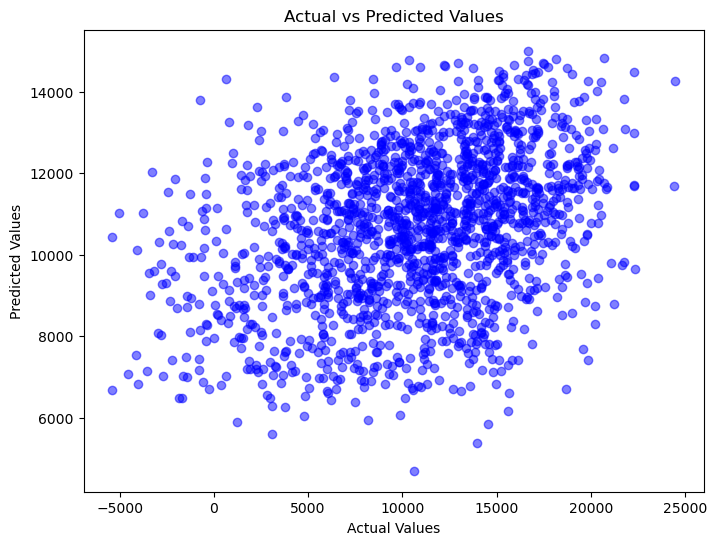

In [1738]:
# Predictions on the validation data
predicted_values = linear_model.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### *6.2.1.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

In [1739]:
linear_model.fit(X_standardise, y_data)

LinearRegression()

Make predictions using the test dataset:

In [1740]:
predicted_y_test_linear = linear_model.predict(df_test_limited)

Saving the predictions as csv files:

In [1741]:
# Make Dataframe from predicted values
linear_pred_df = pd.DataFrame(predicted_y_test_linear, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_linear = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_linear = date_df_linear.join(linear_pred_df)

#Save submission as csv
submission_df_linear.to_csv('Linear_Regression_Predictions', index=False)

submission_df_linear

time  load_shortfall_3h
0     2018-01-01 00:00:00        5775.676487
1     2018-01-01 03:00:00        5813.490537
2     2018-01-01 06:00:00        5876.507848
3     2018-01-01 09:00:00        6198.881766
4     2018-01-01 12:00:00        6864.687423
...                   ...                ...
2915  2018-12-31 09:00:00        9869.035174
2916  2018-12-31 12:00:00       10521.211165
2917  2018-12-31 15:00:00       11313.954346
2918  2018-12-31 18:00:00       11847.543764
2919  2018-12-31 21:00:00       11399.232864

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.2. Ridge Regression:** 

Ridge regression is a technique used in statistics to handle situations where there might be too many factors influencing an outcome, and some of them might be related. It helps prevent problems that can arise when factors are highly correlated. Think of it like adjusting the volume on a stereo - it keeps everything balanced. In the context of predicting something, like housing prices, ridge regression helps ensure that all the factors involved (like the number of bedrooms, location, etc.) contribute smoothly without causing issues. It's like adding a gentle constraint to the prediction to keep things stable and reliable.

##### *6.2.2.1 Fitting the Model:*

Determine the best fit:

In [1742]:
# Define a range of alpha values to search
alphas = [0.1, 1, 10, 100]  # Add more values as needed

# Create a parameter grid
param_grid = {'alpha': alphas}

# Create Ridge regression model
ridge = Ridge()

# GridSearchCV to find the best alpha using cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)  # 5-fold cross-validation

# Perform the grid search on your data
grid_search.fit(x_train, y_train)

# Best alpha found by cross-validation
best_alpha = grid_search.best_params_['alpha']

print("Best Alpha:", best_alpha)

Best Alpha: 1


We can fit our model now with the best alpha fit.

In [1743]:
# Create Ridge regression model with the best alpha value
ridge_best_alpha = Ridge(alpha=best_alpha)

# Train the model with the optimal alpha value
ridge_best_alpha.fit(x_train, y_train)

Ridge(alpha=1)

##### *6.2.2.2 Model Results:*

 We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Test the model:

In [1744]:
predicted_y = ridge_best_alpha.predict(x_validate)

Root Mean Squared Error: 

In [1745]:
# Calculate RMSE
rmse_rr = metrics.mean_squared_error(y_validate, predicted_y, squared=False)

print("Root Mean Squared Error:", rmse_rr)

Root Mean Squared Error: 4977.968866941752


R-Squared:

In [1746]:
# Calculate R-squared
r_squared_rr = r2_score(y_validate, predicted_y)

print("R-squared:", r_squared_rr)

R-squared: 0.12011242767732533


Mean Absolute Error:

In [1747]:
# Calculate MAE
mae_rr = mean_absolute_error(y_validate, predicted_y)

print("Mean Absolute Error:", mae_rr)

Mean Absolute Error: 3982.4103416038547


Let's visualize our results:

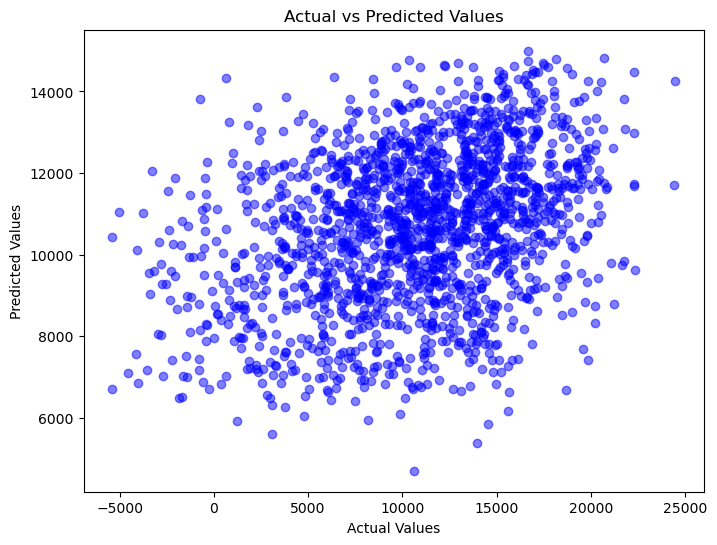

In [1748]:
# Predictions on the validation data
predicted_values = ridge_best_alpha.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [1749]:
# Find the value for the model intercept
b0_ridge = float(ridge_best_alpha.intercept_)
print("Intercept:", float(b0_ridge))

# Extract model coefficient values
coeff = pd.DataFrame(ridge_best_alpha.coef_.reshape(-1,1), X_standardise.columns, columns=['Coefficient'])
coeff.reindex(coeff.Coefficient.abs().sort_values(ascending=False).index)

Intercept: 2388.778864389127


Coefficient
Barcelona_temp     4599.355299
Valencia_pressure  2729.859005
month              2565.398752
Valencia_humidity  1953.168616
Madrid_pressure   -1909.103646
year               1886.979573
hourofday          1885.868985
Valencia_wind_deg -1866.368280
day                1560.580648
Seville_pressure   1515.610491

##### *6.2.2.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

In [1750]:
ridge_best_alpha.fit(X_standardise, y_data)

Ridge(alpha=1)

Make predictions using the test dataset:

In [1751]:
predicted_y_test = ridge_best_alpha.predict(df_test_limited)

Saving the predictions as csv files:

In [1752]:
# Make Dataframe from predicted values
ridge_pred_df = pd.DataFrame(predicted_y_test, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(ridge_pred_df)

#Save submission as csv
submission_df.to_csv('Ridge_Regression_Predictions', index=False)

submission_df

time  load_shortfall_3h
0     2018-01-01 00:00:00        5787.982437
1     2018-01-01 03:00:00        5826.779245
2     2018-01-01 06:00:00        5892.081701
3     2018-01-01 09:00:00        6214.357990
4     2018-01-01 12:00:00        6877.789474
...                   ...                ...
2915  2018-12-31 09:00:00        9877.617937
2916  2018-12-31 12:00:00       10528.935654
2917  2018-12-31 15:00:00       11320.700409
2918  2018-12-31 18:00:00       11852.431297
2919  2018-12-31 21:00:00       11402.405959

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.3. LASSO Regression:** 

Lasso regression is a technique used in statistics to simplify and improve the accuracy of predictions, especially when there are many factors involved. It works by not only predicting an outcome but also encouraging the model to ignore less important factors. It's like cleaning up unnecessary noise in the data. For instance, if you're trying to predict a student's grades and you have factors like study hours, sleep, and diet, lasso regression helps in focusing on the most significant factors, ignoring those that might not really matter much. It's a tool for more efficient and streamlined predictions.

##### *6.2.3.1 Fitting the Model:*

We can fit our model now with the best alpha fit:

In [1753]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [1754]:
# Train the LASSO model
lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

##### *6.2.3.2 Model Results:*

We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Test the model:

In [1755]:
predicted_y_lasso = lasso.predict(x_validate)

Root Mean Squared Error:

In [1756]:
# Calculate RMSE
rmse_lasso = metrics.mean_squared_error(y_validate, predicted_y_lasso, squared=False)

print("Root Mean Squared Error:", rmse_lasso)

Root Mean Squared Error: 4977.729160223469


R-Squared:

In [1757]:
# Calculate R-squared
r_squared_lasso = r2_score(y_validate, predicted_y_lasso)

print("R-squared:", r_squared_lasso)

R-squared: 0.12019716500289279


Mean Absolute Error:

In [1758]:
# Calculate MAE
mae_lasso = mean_absolute_error(y_validate, predicted_y_lasso)

print("Mean Absolute Error:", mae_lasso)

Mean Absolute Error: 3981.9332287431603


Let's visualize our results:

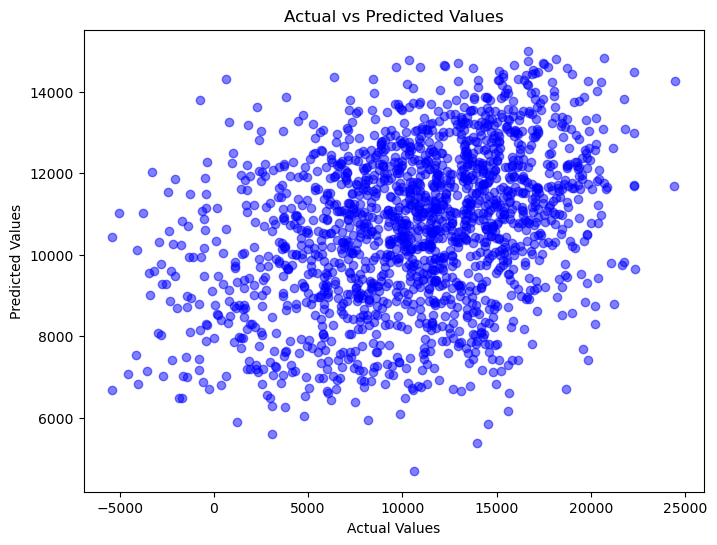

In [1759]:
# Predictions on the validation data
predicted_values = lasso.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [1760]:
# Find the value for the model intercept
b0_ridge = float(lasso.intercept_)
print("Intercept:", float(b0_ridge))

# Extract model coefficient values
coeff = pd.DataFrame(lasso.coef_.reshape(-1,1), X_standardise.columns, columns=['Coefficient'])
coeff.reindex(coeff.Coefficient.abs().sort_values(ascending=False).index)

Intercept: 2344.2327651768155


Coefficient
Barcelona_temp     4630.043624
Valencia_pressure  2778.452916
month              2569.468910
Valencia_humidity  1966.981801
Madrid_pressure   -1951.431394
year               1891.334558
hourofday          1888.897114
Valencia_wind_deg -1863.420235
day                1563.380491
Seville_pressure   1521.132257

##### *6.2.3.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

In [1761]:
lasso.fit(X_standardise, y_data)

Lasso(alpha=0.01)

Make predictions using the test dataset:

In [1762]:
predicted_y_test_lasso = lasso.predict(df_test_limited)

Saving the predictions as csv files:

In [1763]:
# Make Dataframe from predicted values
lasso_pred_df = pd.DataFrame(predicted_y_test_lasso, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_lasso = date_df.join(lasso_pred_df)

#Save submission as csv
submission_df_lasso.to_csv('LASSO_Regression_Predictions', index=False)

submission_df_lasso

time  load_shortfall_3h
0     2018-01-01 00:00:00        5776.156765
1     2018-01-01 03:00:00        5813.971941
2     2018-01-01 06:00:00        5877.038378
3     2018-01-01 09:00:00        6199.404488
4     2018-01-01 12:00:00        6865.155655
...                   ...                ...
2915  2018-12-31 09:00:00        9869.230942
2916  2018-12-31 12:00:00       10521.423534
2917  2018-12-31 15:00:00       11314.131063
2918  2018-12-31 18:00:00       11847.623516
2919  2018-12-31 21:00:00       11399.262435

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.4 Desicion Tree:** 

A Decision Tree is a popular supervised machine learning algorithm used for both regression and classification tasks. It works for both categorical and continuous input and output variables. The Decision Tree algorithm recursively splits the dataset into subsets, based on the most significant attribute at each node. This process is repeated until the data at each node is homogeneous with respect to the target variable, or a predefined stopping criterion is met.

##### *6.2.4.1 Fitting the Model:*

Create the model:

In [1764]:
regr_tree = DecisionTreeRegressor(max_depth=8, random_state=RAND_STATE)

Fit the model:

In [1765]:
regr_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

##### *6.2.4.2 Model Results:*

 We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Test the model:

In [1766]:
predicted_y_tree = regr_tree.predict(x_validate)

Root Mean Squared Error:

In [1767]:
# Calculate RMSE
rmse_dt = metrics.mean_squared_error(y_validate, predicted_y_tree, squared=False)

print("Root Mean Squared Error:", rmse_dt)

Root Mean Squared Error: 3987.6497447405595


R-Squared:

In [1768]:
# Calculate R-squared
r_squared_dt = r2_score(y_validate, predicted_y_tree)

print("R-squared:", r_squared_dt)

R-squared: 0.43537924093272096


Mean Absolute Error:

In [1769]:
# Calculate MAE
mae_dt = mean_absolute_error(y_validate, predicted_y_tree)

print("Mean Absolute Error:", mae_dt)

Mean Absolute Error: 3088.9202137579014


Let's visualize our results:

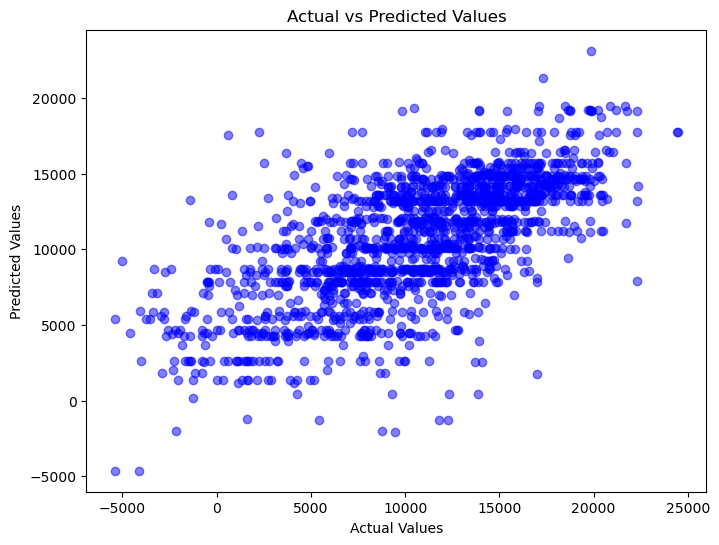

In [1770]:
# Predictions on the validation data
predicted_values = regr_tree.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### *6.2.4.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

Train model:

In [1771]:
regr_tree.fit(X_standardise, y_data)

DecisionTreeRegressor(max_depth=8, random_state=42)

Make predictions using the test dataset:

In [1772]:
predicted_y_test_tree = regr_tree.predict(df_test_limited)

In [1773]:
# Make Dataframe from predicted values
tree_pred_df = pd.DataFrame(predicted_y_test_tree, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_tree = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_tree = date_df_tree.join(tree_pred_df)

#Save submission as csv
submission_df_tree.to_csv('Decision_Tree_Predictions', index=False)

submission_df_tree

time  load_shortfall_3h
0     2018-01-01 00:00:00        5616.722222
1     2018-01-01 03:00:00        5616.722222
2     2018-01-01 06:00:00        5616.722222
3     2018-01-01 09:00:00        5616.722222
4     2018-01-01 12:00:00        5616.722222
...                   ...                ...
2915  2018-12-31 09:00:00       11233.438944
2916  2018-12-31 12:00:00       10518.599251
2917  2018-12-31 15:00:00       14628.575758
2918  2018-12-31 18:00:00       15567.846296
2919  2018-12-31 21:00:00       15567.846296

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.5. Bagging Ensemble Regression:** 

Bagging ensemble regression, short for Bootstrap Aggregating, is a method that improves prediction accuracy by combining the results of multiple models. It's like asking a bunch of different experts for their opinions and then averaging them to get a more reliable answer. In bagging, we create several slightly different versions of the original dataset by randomly sampling from it (with replacement). Then, we build a separate regression model on each of these datasets. Finally, the predictions from all the models are averaged, giving a more robust and less prone-to-error overall prediction. It's a bit like getting multiple opinions to make a more reliable decision.

##### *6.2.5.1 Fitting the Model:*

Create the model:

In [1774]:
bag_reg = BaggingRegressor(base_estimator = catboost)

Fit the model:

In [1775]:
bag_reg.fit(x_train,y_train)

Learning rate set to 0.055693
0:	learn: 5151.5934062	total: 21.1ms	remaining: 21s
1:	learn: 5065.2541037	total: 24.5ms	remaining: 12.2s
2:	learn: 4991.1687740	total: 29.1ms	remaining: 9.68s
3:	learn: 4911.5521043	total: 33.7ms	remaining: 8.4s
4:	learn: 4843.4215579	total: 40.9ms	remaining: 8.14s
5:	learn: 4779.4569452	total: 46.5ms	remaining: 7.7s
6:	learn: 4728.4059102	total: 51.9ms	remaining: 7.36s
7:	learn: 4675.5795919	total: 56.1ms	remaining: 6.95s
8:	learn: 4622.9270157	total: 60.8ms	remaining: 6.7s
9:	learn: 4585.4622874	total: 65.5ms	remaining: 6.49s
10:	learn: 4553.9269320	total: 69.6ms	remaining: 6.26s
11:	learn: 4512.5768510	total: 74ms	remaining: 6.09s
12:	learn: 4471.2371202	total: 77.5ms	remaining: 5.88s
13:	learn: 4433.2371037	total: 83ms	remaining: 5.85s
14:	learn: 4396.5687619	total: 86.3ms	remaining: 5.67s
15:	learn: 4361.4792908	total: 90.3ms	remaining: 5.55s
16:	learn: 4327.5529318	total: 95.3ms	remaining: 5.51s
17:	learn: 4303.6251376	total: 99ms	remaining: 5.4s
18

BaggingRegressor(base_estimator=<catboost.core.CatBoostRegressor object at 0x000001F09889CBB0>)

##### *6.2.5.2 Model Results:*

We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Test the model:

In [1776]:
y_pred_bag = bag_reg.predict(x_validate)

Root Mean Squared Error:

In [1777]:
# Calculate RMSE
rmse_bag = metrics.mean_squared_error(y_validate, y_pred_bag, squared=False)

print("Root Mean Squared Error:", rmse_bag)

Root Mean Squared Error: 3065.0899928408876


R-Squared:

In [1778]:
# Calculate R-squared
r_squared_bag = r2_score(y_validate, y_pred_bag)

print("R-squared:", r_squared_bag)

R-squared: 0.6664128662629889


Mean Absolute Error:

In [1779]:
# Calculate MAE
mae_bag = mean_absolute_error(y_validate, y_pred_bag)

print("Mean Absolute Error:", mae_bag)

Mean Absolute Error: 2408.834370467015


Let's visualize our results:

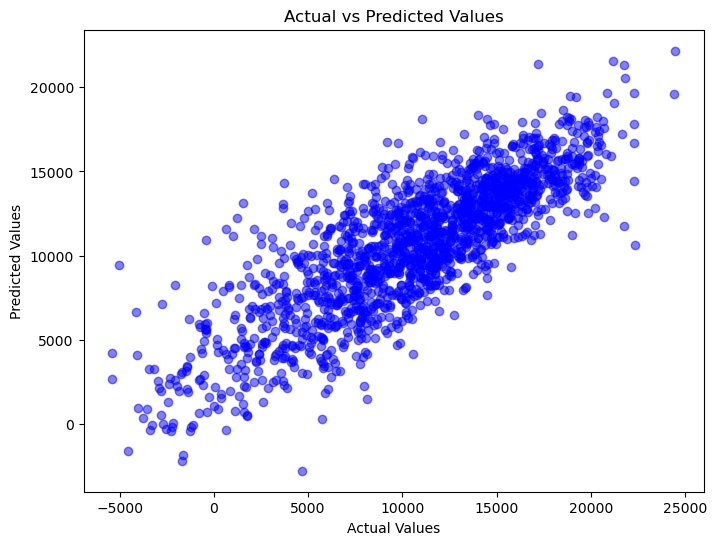

In [1780]:
# Predictions on the validation data
predicted_values = bag_reg.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### *6.2.5.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

Train model:

In [1781]:
bag_reg.fit(X_standardise, y_data)

Learning rate set to 0.057692
0:	learn: 5132.2341356	total: 4.9ms	remaining: 4.9s
1:	learn: 5046.2731861	total: 10.5ms	remaining: 5.26s
2:	learn: 4984.3611902	total: 14.8ms	remaining: 4.92s
3:	learn: 4920.2450271	total: 21.2ms	remaining: 5.29s
4:	learn: 4853.6550898	total: 27.9ms	remaining: 5.56s
5:	learn: 4793.0553189	total: 31.6ms	remaining: 5.23s
6:	learn: 4745.9070346	total: 35.8ms	remaining: 5.08s
7:	learn: 4680.1768338	total: 40.5ms	remaining: 5.02s
8:	learn: 4630.9352540	total: 44.6ms	remaining: 4.91s
9:	learn: 4595.3016588	total: 48.7ms	remaining: 4.82s
10:	learn: 4550.0827495	total: 52.5ms	remaining: 4.72s
11:	learn: 4505.7475335	total: 57.5ms	remaining: 4.74s
12:	learn: 4470.4077661	total: 61.4ms	remaining: 4.66s
13:	learn: 4434.1453655	total: 65.8ms	remaining: 4.63s
14:	learn: 4402.0550140	total: 69.5ms	remaining: 4.56s
15:	learn: 4368.8065933	total: 74.1ms	remaining: 4.55s
16:	learn: 4337.7416100	total: 78.2ms	remaining: 4.52s
17:	learn: 4310.8562040	total: 83.4ms	remaining

BaggingRegressor(base_estimator=<catboost.core.CatBoostRegressor object at 0x000001F09889CBB0>)

Make predictions using the test dataset:

In [1782]:
predicted_y_test_bag = bag_reg.predict(df_test_limited)

In [1783]:
# Make Dataframe from predicted values
bag_pred_df = pd.DataFrame(predicted_y_test_bag, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_bag = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_bag = date_df_bag.join(bag_pred_df)

#Save submission as csv
submission_df_bag.to_csv('Bagging_Predictions', index=False)

submission_df_bag

time  load_shortfall_3h
0     2018-01-01 00:00:00        6832.276232
1     2018-01-01 03:00:00        2966.626604
2     2018-01-01 06:00:00        2163.429421
3     2018-01-01 09:00:00        4504.950177
4     2018-01-01 12:00:00        4488.080934
...                   ...                ...
2915  2018-12-31 09:00:00        7330.122393
2916  2018-12-31 12:00:00        8741.827078
2917  2018-12-31 15:00:00        7978.235483
2918  2018-12-31 18:00:00        9869.335380
2919  2018-12-31 21:00:00       12582.125548

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.6. Random Forest Regression:** 

Random Forest regression is a powerful tool in statistics for making predictions. It's like having a group of experts (trees) work together to provide a more accurate forecast. In a Random Forest, we create multiple decision trees, each trained on a different part of the data. Each tree makes its own prediction, and then they all vote on the final outcome. It helps prevent overfitting and gives a more reliable result, like getting advice from various experts to make a better decision.

##### *6.2.6.1 Fitting the Model:*

Create the model:

In [1784]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  

Fit the model:

In [1785]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

##### *6.2.6.2 Model Results:*

We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Test the model:

In [1786]:
y_pred_rf = model_rf.predict(x_validate)

Root Mean Squared Error:

In [1787]:
# Calculate RMSE
rmse_rf = metrics.mean_squared_error(y_validate, y_pred_rf, squared=False)

print("Root Mean Squared Error:", rmse_rf)

Root Mean Squared Error: 3098.779040494096


R-Squared:

In [1788]:
# Calculate R-squared
r_squared_rf = r2_score(y_validate, y_pred_rf)

print("R-squared:", r_squared_rf)

R-squared: 0.659039514250658


Mean Absolute Error:

In [1789]:
# Calculate MAE
mae_rf = mean_absolute_error(y_validate, y_pred_rf)

print("Mean Absolute Error:", mae_rf)

Mean Absolute Error: 2396.168745483934


Let's visualize our results:

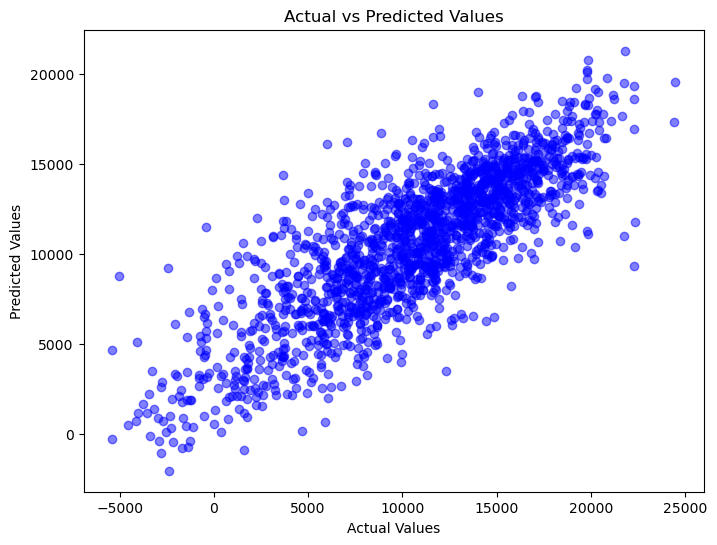

In [1790]:
# Predictions on the validation data
predicted_values = model_rf.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### *6.2.6.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

Train model:

In [1791]:
model_rf.fit(X_standardise, y_data)

RandomForestRegressor(random_state=42)

Make predictions using the test dataset:

In [1792]:
predicted_y_test_rf = model_rf.predict(df_test_limited)

In [1793]:
# Make Dataframe from predicted values
rf_pred_df = pd.DataFrame(predicted_y_test_rf, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_rf = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_rf = date_df_rf.join(rf_pred_df)

#Save submission as csv
submission_df_rf.to_csv('Random_Forest_Predictions', index=False)

submission_df_rf

time  load_shortfall_3h
0     2018-01-01 00:00:00        6046.113333
1     2018-01-01 03:00:00        6600.210000
2     2018-01-01 06:00:00        5623.556667
3     2018-01-01 09:00:00        5687.786667
4     2018-01-01 12:00:00        4640.603333
...                   ...                ...
2915  2018-12-31 09:00:00        9049.506667
2916  2018-12-31 12:00:00        9110.290000
2917  2018-12-31 15:00:00       11489.543333
2918  2018-12-31 18:00:00       11555.346667
2919  2018-12-31 21:00:00       14831.306667

[2920 rows x 2 columns]

##### **6.2.7. XGBoost:** 

 XGBoost stands for eXtreme Gradient Boosting. XGBoost is a powerful machine learning algorithm used for both classification and regression tasks. It's like training a team of models in a smart way: each new model corrects the errors of the previous ones, improving overall accuracy. XGBoost is particularly effective in handling complex relationships in data, providing robust predictions by combining the strengths of multiple models.

##### *6.2.7.1 Fitting the Model:*

Create the model:

In [1794]:
# Define your XGBoost model for regression
xgboost = xgb.XGBRegressor(objective='reg:squarederror', max_depth=3, learning_rate=0.1, n_estimators=100)

Fit the model:

In [1795]:
# Fit the model to your training data
xgboost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##### *6.2.7.2 Model Results:*

We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Test the model:

In [1796]:
# Make predictions
xgb_pred = xgboost.predict(x_validate)

Root Mean Squared Error:

In [1797]:
# Calculate RMSE
rmse_xgb = metrics.mean_squared_error(y_validate, xgb_pred, squared=False)

print("Root Mean Squared Error:", rmse_xgb)

Root Mean Squared Error: 3721.5547092190673


R-Squared:

In [1798]:
# Calculate R-squared
r_squared_xgb = r2_score(y_validate, xgb_pred)

print("R-squared:", r_squared_xgb)

R-squared: 0.5082191117956352


Mean Absolute Error:

In [1799]:
# Calculate MAE
mae_xgb = mean_absolute_error(y_validate, xgb_pred)

print("Mean Absolute Error:", mae_xgb)

Mean Absolute Error: 2974.803192098053


Let's visualize our results:

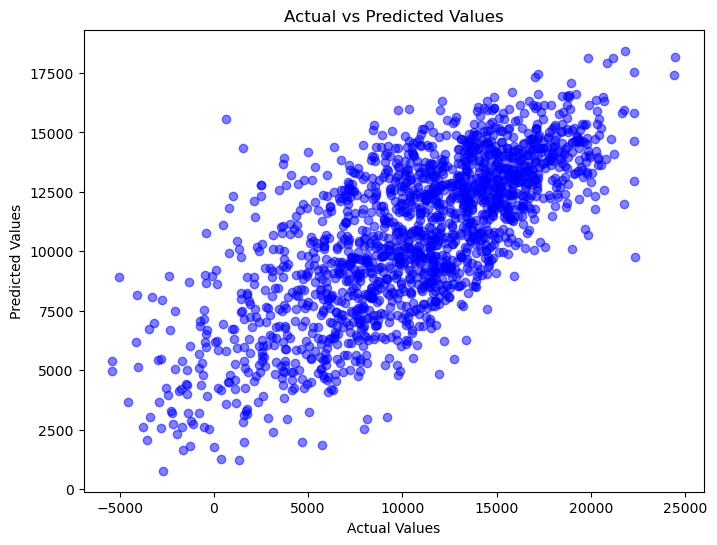

In [1800]:
# Predictions on the validation data
predicted_values = xgboost.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### *6.2.7.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

Train model:

In [1801]:
xgboost.fit(X_standardise, y_data)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Make predictions using the test dataset:

In [1802]:
predicted_y_test_xgb = xgboost.predict(df_test_limited)

In [1803]:
# Make Dataframe from predicted values
xgb_pred_df = pd.DataFrame(predicted_y_test_xgb, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_xgb = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_xgb = date_df_xgb.join(xgb_pred_df)

#Save submission as csv
submission_df_xgb.to_csv('XGBoost_Predictions', index=False)

submission_df_xgb

time  load_shortfall_3h
0     2018-01-01 00:00:00        8554.702148
1     2018-01-01 03:00:00        5008.777344
2     2018-01-01 06:00:00        3747.857910
3     2018-01-01 09:00:00        8245.476562
4     2018-01-01 12:00:00        9942.233398
...                   ...                ...
2915  2018-12-31 09:00:00        8517.862305
2916  2018-12-31 12:00:00        8806.197266
2917  2018-12-31 15:00:00       10080.083008
2918  2018-12-31 18:00:00       11287.629883
2919  2018-12-31 21:00:00       13537.118164

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.8. CatBoost:** 

CatBoost is a machine learning algorithm designed for handling categorical features efficiently. It's like a smart teammate that automatically understands and works well with data that includes categories, such as colors or types. CatBoost is especially useful when dealing with diverse datasets, as it can handle different types of information without requiring extensive preprocessing. It's like having a reliable teammate that quickly adapts to various aspects of the data, making the machine learning process more effective and straightforward.

##### *6.2.8.1 Fitting the Model:*

Create the model:

In [1804]:
catboost = cb.CatBoostRegressor(random_seed=42)

Fit the model:

In [1805]:
catboost.fit(x_train, y_train)

Learning rate set to 0.055693
0:	learn: 5092.2720291	total: 8.29ms	remaining: 8.28s
1:	learn: 5002.6153251	total: 14ms	remaining: 6.96s
2:	learn: 4933.1181271	total: 19.4ms	remaining: 6.44s
3:	learn: 4856.8394797	total: 26.8ms	remaining: 6.67s
4:	learn: 4782.5126413	total: 31.2ms	remaining: 6.22s
5:	learn: 4724.4849833	total: 34.8ms	remaining: 5.76s
6:	learn: 4680.2361379	total: 42.2ms	remaining: 5.99s
7:	learn: 4629.0367858	total: 46.3ms	remaining: 5.74s
8:	learn: 4580.9848931	total: 50.3ms	remaining: 5.54s
9:	learn: 4546.2609112	total: 57.6ms	remaining: 5.7s
10:	learn: 4506.8374372	total: 61.3ms	remaining: 5.51s
11:	learn: 4462.8001664	total: 65.4ms	remaining: 5.38s
12:	learn: 4429.0545192	total: 73.2ms	remaining: 5.56s
13:	learn: 4391.9742504	total: 77.6ms	remaining: 5.46s
14:	learn: 4363.8879954	total: 83.1ms	remaining: 5.45s
15:	learn: 4334.8322016	total: 93.2ms	remaining: 5.73s
16:	learn: 4305.2140545	total: 98.4ms	remaining: 5.69s
17:	learn: 4283.4626978	total: 107ms	remaining: 

##### *6.2.8.2 Model Results:*

We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Test the model:

In [1806]:
catboost_pred = catboost.predict(x_validate)

Root Mean Square Error:

In [1807]:
# Calculate RMSE
rmse_cb = metrics.mean_squared_error(y_validate, catboost_pred, squared=False)

print("Root Mean Squared Error:", rmse_cb)

Root Mean Squared Error: 2943.9312498523336


R_Squared:

In [1808]:
# Calculate R-squared
r_squared_cb = r2_score(y_validate, catboost_pred)

print("R-squared:", r_squared_cb)

R-squared: 0.6922641032887298


Mean Absolute Error:

In [1809]:
# Calculate MAE
mae_cb = mean_absolute_error(y_validate, catboost_pred)

print("Mean Absolute Error:", mae_cb)

Mean Absolute Error: 2307.5324233964284


Let's visualize our results:

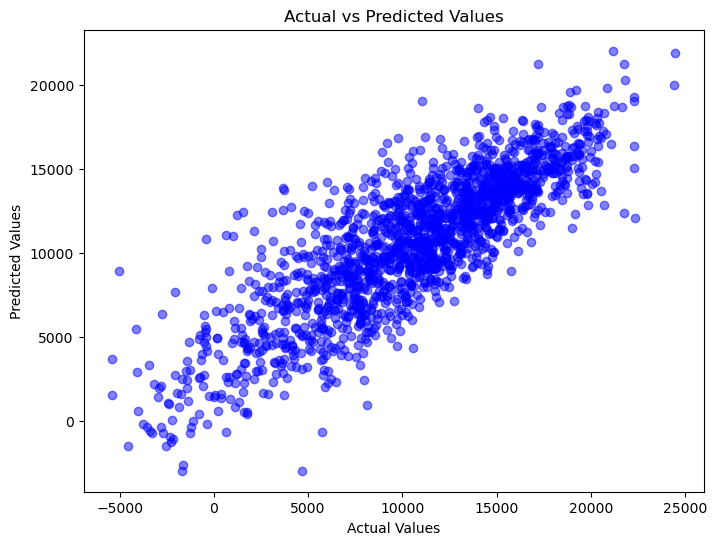

In [1810]:
# Predictions on the validation data
predicted_values = catboost.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### *6.2.8.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

Train model:

In [1811]:
catboost.fit(X_standardise, y_data)

Learning rate set to 0.057692
0:	learn: 5111.1371167	total: 10.5ms	remaining: 10.5s
1:	learn: 5019.0437492	total: 14.4ms	remaining: 7.19s
2:	learn: 4947.0159090	total: 24.9ms	remaining: 8.29s
3:	learn: 4875.1260880	total: 30.3ms	remaining: 7.55s
4:	learn: 4810.3311593	total: 34.9ms	remaining: 6.95s
5:	learn: 4748.9372531	total: 42.2ms	remaining: 6.99s
6:	learn: 4696.9008568	total: 46ms	remaining: 6.53s
7:	learn: 4640.6939753	total: 51ms	remaining: 6.33s
8:	learn: 4592.8483201	total: 57.9ms	remaining: 6.38s
9:	learn: 4554.6933870	total: 62.9ms	remaining: 6.22s
10:	learn: 4514.5613134	total: 68.4ms	remaining: 6.15s
11:	learn: 4468.7883591	total: 76.1ms	remaining: 6.27s
12:	learn: 4434.0131757	total: 87.1ms	remaining: 6.62s
13:	learn: 4397.1782800	total: 93.1ms	remaining: 6.55s
14:	learn: 4371.3830761	total: 100ms	remaining: 6.58s
15:	learn: 4342.0790798	total: 106ms	remaining: 6.5s
16:	learn: 4313.2538988	total: 110ms	remaining: 6.36s
17:	learn: 4284.4271111	total: 120ms	remaining: 6.52s

Make predictions using the test dataset:

In [1812]:
predicted_y_test_cat = catboost.predict(df_test_limited)

In [1813]:
# Make Dataframe from predicted values
cat_pred_df = pd.DataFrame(predicted_y_test_cat, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_cat = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_cat = date_df_cat.join(cat_pred_df)

#Save submission as csv
submission_df_cat.to_csv('Catboost_Predictions', index=False)

submission_df_cat

time  load_shortfall_3h
0     2018-01-01 00:00:00        7241.710274
1     2018-01-01 03:00:00        2355.436698
2     2018-01-01 06:00:00        1145.634984
3     2018-01-01 09:00:00        3841.797097
4     2018-01-01 12:00:00        4364.178088
...                   ...                ...
2915  2018-12-31 09:00:00        8099.340979
2916  2018-12-31 12:00:00        9378.719504
2917  2018-12-31 15:00:00        7899.663352
2918  2018-12-31 18:00:00        9757.409605
2919  2018-12-31 21:00:00       12723.180272

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.9. Extra Trees Regression:** 

Extra Trees or Extreme Trees refers to an ensemble learning technique that builds multiple decision trees and combines their predictions for improved accuracy. Extra Trees are similar to Random Forests but with a slight difference in how they create and combine trees. They are robust and effective for various prediction tasks, offering a straightforward way to get more accurate results by leveraging the collective insights of multiple decision trees.

##### *6.2.9.1 Fitting the Model:*

Create the model:

In [1814]:
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

Fit the model:

In [1815]:
extra_trees.fit(x_train, y_train)

ExtraTreesRegressor(random_state=42)

##### *6.2.9.2 Model Results:*

We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Test the model:

In [1816]:
et_pred = extra_trees.predict(x_validate)

Root Mean Squared Error:

In [1817]:
# Calculate RMSE
rmse_et = metrics.mean_squared_error(y_validate, et_pred, squared=False)

print("Root Mean Squared Error:", rmse_et)

Root Mean Squared Error: 2936.479047908089


R-Squared:

In [1818]:
# Calculate R-squared
r_squared_et = r2_score(y_validate, et_pred)

print("R-squared:", r_squared_et)

R-squared: 0.6938201229348627


Mean Absolute Error:

In [1819]:
# Calculate MAE
mae_et = mean_absolute_error(y_validate, et_pred)

print("Mean Absolute Error:", mae_et)

Mean Absolute Error: 2272.796834474236


Let's visualize our results:

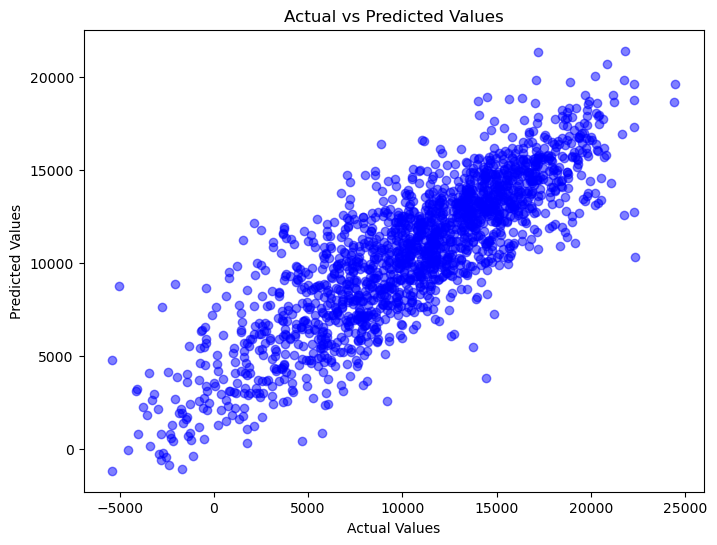

In [1820]:
# Predictions on the validation data
predicted_values = extra_trees.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### *6.2.9.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

Train model:

In [1821]:
extra_trees.fit(X_standardise, y_data)

ExtraTreesRegressor(random_state=42)

Make predictions using the test dataset:

In [1822]:
predicted_y_test_et = extra_trees.predict(df_test_limited)

In [1823]:
# Make Dataframe from predicted values
et_pred_df = pd.DataFrame(predicted_y_test_et, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_et = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_et = date_df_et.join(et_pred_df)

#Save submission as csv
submission_df_et.to_csv('Extra_Trees_Predictions', index=False)

submission_df_et

time  load_shortfall_3h
0     2018-01-01 00:00:00        8008.783333
1     2018-01-01 03:00:00        6081.153333
2     2018-01-01 06:00:00        4415.893333
3     2018-01-01 09:00:00        5496.723333
4     2018-01-01 12:00:00        6316.730000
...                   ...                ...
2915  2018-12-31 09:00:00        7052.616667
2916  2018-12-31 12:00:00       10534.570000
2917  2018-12-31 15:00:00       11020.748333
2918  2018-12-31 18:00:00       10988.733333
2919  2018-12-31 21:00:00       12829.066667

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.10. Weighted Voting Ensemble:**  

##### *6.2.10.1 Fitting the Model:*

Define the models which we'll include in our ensemble and create the model:

In [1824]:
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("ET",extra_trees),("CB",catboost)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.6,0.4])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

Fit the model:

In [1825]:
v_reg.fit(x_train,y_train)

Learning rate set to 0.055693
0:	learn: 5092.2720291	total: 7.33ms	remaining: 7.32s
1:	learn: 5002.6153251	total: 14.6ms	remaining: 7.27s
2:	learn: 4933.1181271	total: 22ms	remaining: 7.32s
3:	learn: 4856.8394797	total: 26.8ms	remaining: 6.68s
4:	learn: 4782.5126413	total: 37.4ms	remaining: 7.45s
5:	learn: 4724.4849833	total: 42.8ms	remaining: 7.09s
6:	learn: 4680.2361379	total: 52.1ms	remaining: 7.38s
7:	learn: 4629.0367858	total: 57.4ms	remaining: 7.11s
8:	learn: 4580.9848931	total: 64.3ms	remaining: 7.07s
9:	learn: 4546.2609112	total: 70.2ms	remaining: 6.95s
10:	learn: 4506.8374372	total: 74.7ms	remaining: 6.71s
11:	learn: 4462.8001664	total: 85.5ms	remaining: 7.04s
12:	learn: 4429.0545192	total: 91.3ms	remaining: 6.93s
13:	learn: 4391.9742504	total: 103ms	remaining: 7.25s
14:	learn: 4363.8879954	total: 107ms	remaining: 7.05s
15:	learn: 4334.8322016	total: 119ms	remaining: 7.3s
16:	learn: 4305.2140545	total: 123ms	remaining: 7.13s
17:	learn: 4283.4626978	total: 134ms	remaining: 7.29

VotingRegressor(estimators=[('ET', ExtraTreesRegressor(random_state=42)),
                            ('CB',
                             <catboost.core.CatBoostRegressor object at 0x000001F09A806EE0>)],
                weights=array([0.6, 0.4]))

##### *6.2.10.2 Model Results:*

We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Test model:

In [1826]:
y_pred_ve = v_reg.predict(x_validate)

Root Mean Square:

In [1827]:
# Calculate RMSE
rmse_ve = metrics.mean_squared_error(y_validate, y_pred_ve, squared=False)

print("Root Mean Squared Error:", rmse_ve)

Root Mean Squared Error: 2855.405626133754


R-Squared:

In [1828]:
# Calculate R-squared
r_squared_ve = r2_score(y_validate, y_pred_ve)

print("R-squared:", r_squared_ve)

R-squared: 0.7104934104937376


Mean Absolute Error:

In [1829]:
# Calculate MAE
mae_ve = mean_absolute_error(y_validate, y_pred_ve)

print("Mean Absolute Error:", mae_ve)

Mean Absolute Error: 2229.4640016920507


Let's visualize our results:

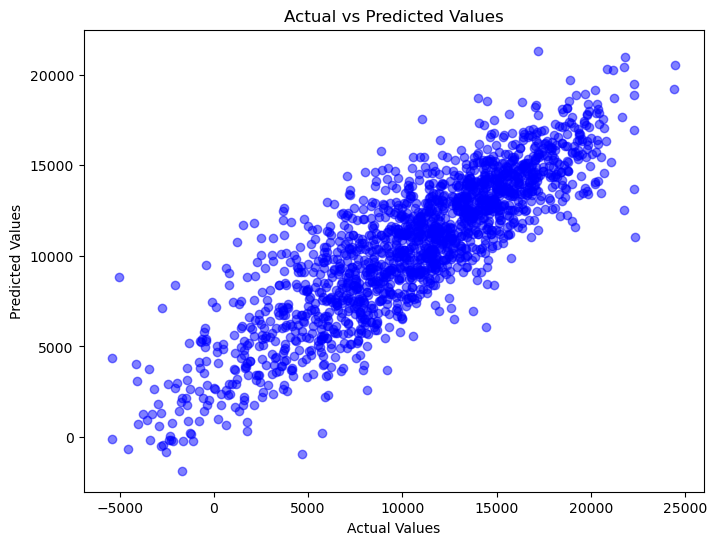

In [1830]:
# Predictions on the validation data
predicted_values = v_reg.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### *6.2.10.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

Train model:

In [1831]:
v_reg.fit(X_standardise,y_data)

Learning rate set to 0.057692
0:	learn: 5111.1371167	total: 5.36ms	remaining: 5.35s
1:	learn: 5019.0437492	total: 9.38ms	remaining: 4.68s
2:	learn: 4947.0159090	total: 13.1ms	remaining: 4.37s
3:	learn: 4875.1260880	total: 19.7ms	remaining: 4.91s
4:	learn: 4810.3311593	total: 23.5ms	remaining: 4.68s
5:	learn: 4748.9372531	total: 28.4ms	remaining: 4.7s
6:	learn: 4696.9008568	total: 34.4ms	remaining: 4.87s
7:	learn: 4640.6939753	total: 38.3ms	remaining: 4.75s
8:	learn: 4592.8483201	total: 42.9ms	remaining: 4.73s
9:	learn: 4554.6933870	total: 50.9ms	remaining: 5.04s
10:	learn: 4514.5613134	total: 54.9ms	remaining: 4.93s
11:	learn: 4468.7883591	total: 59.4ms	remaining: 4.89s
12:	learn: 4434.0131757	total: 66.8ms	remaining: 5.07s
13:	learn: 4397.1782800	total: 71.4ms	remaining: 5.03s
14:	learn: 4371.3830761	total: 75.2ms	remaining: 4.94s
15:	learn: 4342.0790798	total: 82.8ms	remaining: 5.09s
16:	learn: 4313.2538988	total: 88.2ms	remaining: 5.1s
17:	learn: 4284.4271111	total: 94ms	remaining: 

VotingRegressor(estimators=[('ET', ExtraTreesRegressor(random_state=42)),
                            ('CB',
                             <catboost.core.CatBoostRegressor object at 0x000001F09A806EE0>)],
                weights=array([0.6, 0.4]))

Make predictions using the test dataset:

In [1832]:
predicted_y_test_ve = v_reg.predict(df_test_limited)

Save as CSV file:

In [1833]:
# Make Dataframe from predicted values
ve_pred_df = pd.DataFrame(predicted_y_test_ve, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_ve = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_ve = date_df_ve.join(ve_pred_df)

#Save submission as csv
submission_df_ve.to_csv('Voting_Ensemble_Predictions', index=False)

submission_df_ve

time  load_shortfall_3h
0     2018-01-01 00:00:00        7701.954110
1     2018-01-01 03:00:00        4590.866679
2     2018-01-01 06:00:00        3107.789994
3     2018-01-01 09:00:00        4834.752839
4     2018-01-01 12:00:00        5535.709235
...                   ...                ...
2915  2018-12-31 09:00:00        7471.306392
2916  2018-12-31 12:00:00       10072.229801
2917  2018-12-31 15:00:00        9772.314341
2918  2018-12-31 18:00:00       10496.203842
2919  2018-12-31 21:00:00       12786.712109

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model Performance ⚡ |
| :--------------------------- |
| In this section compare the relative performance of the various trained models on a holdout dataset and comment on what model is the best and why. |

---

### **7.1. Model comparisons:** 

#### 7.1.1 Compare RMSE, R-squared, and MAE:

We will compare the RMSE, R-Squared, and MAE with one another, but first let's break down what these measures mean:

**Root Mean Squared Error (RMSE):**

RMSE measures the average size of errors between predicted and observed values. It emphasizes larger errors, providing a comprehensive evaluation of overall model accuracy. A lower RMSE indicated a better model.

**R-squared (Coefficient of Determination):**

R-squared indicates the proportion of variance in the dependent variable explained by the model. It ranges from 0 to 1, with higher values signifying a better fit and greater explanatory power. A higher R-squared indicates a better model.

**Mean Absolute Error (MAE):**

MAE calculates the average absolute differences between predicted and observed values. It provides a simple and balanced measure of overall model accuracy, treating all errors equally. A lower MAE indicates a better model.

In [1834]:
# Displaying results in a readable and organized manner
results = [
    ("Linear Regression", rmse_lr, r_squared_lr, mae_lr),
    ("Ridge Regression", rmse_rr, r_squared_rr, mae_rr),
    ("LASSO Regression", rmse_lasso, r_squared_lasso, mae_lasso),
    ("Decision Tree", rmse_dt, r_squared_dt, mae_dt),
    ("Voting Ensemble", rmse_ve, r_squared_ve, mae_ve),
    ("Bagging Ensemble", rmse_bag, r_squared_bag, mae_bag),
    ("Random Forest", rmse_rf, r_squared_rf, mae_rf),
    ("XGBoost", rmse_xgb, r_squared_xgb, mae_xgb),
    ("Catboost", rmse_cb, r_squared_cb, mae_cb),
    ("Extra Tree", rmse_et, r_squared_et, mae_et)
]

# Sorting results based on RMSE in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=False)

# Displaying sorted results
for model, rmse, r_squared, mae in sorted_results:
    print(f"{model}:\n  RMSE: {rmse}\n  R-squared: {r_squared}\n  MAE: {mae}\n")

Voting Ensemble:
  RMSE: 2855.405626133754
  R-squared: 0.7104934104937376
  MAE: 2229.4640016920507

Extra Tree:
  RMSE: 2936.479047908089
  R-squared: 0.6938201229348627
  MAE: 2272.796834474236

Catboost:
  RMSE: 2943.9312498523336
  R-squared: 0.6922641032887298
  MAE: 2307.5324233964284

Bagging Ensemble:
  RMSE: 3065.0899928408876
  R-squared: 0.6664128662629889
  MAE: 2408.834370467015

Random Forest:
  RMSE: 3098.779040494096
  R-squared: 0.659039514250658
  MAE: 2396.168745483934

XGBoost:
  RMSE: 3721.5547092190673
  R-squared: 0.5082191117956352
  MAE: 2974.803192098053

Decision Tree:
  RMSE: 3987.6497447405595
  R-squared: 0.43537924093272096
  MAE: 3088.9202137579014

Linear Regression:
  RMSE: 4977.722638271422
  R-squared: 0.12019947048314561
  MAE: 3981.91972798065

LASSO Regression:
  RMSE: 4977.729160223469
  R-squared: 0.12019716500289279
  MAE: 3981.9332287431603

Ridge Regression:
  RMSE: 4977.968866941752
  R-squared: 0.12011242767732533
  MAE: 3982.4103416038547

Voting Ensemble has the lowest RMSE (2855.41) among the models, indicating it has the smallest average prediction error. It also shows a relatively high R-squared value (0.71), suggesting a good fit to the data, and the lowest MAE (2229.46), indicating smaller average prediction errors.

Therefore, the Voting Ensemble is the most effective model among the ones evaluated, providing the lowest RMSE and MAE, as well as a relatively high R-squared value.

Let's preprocess some information in order to create some graphs:

In [1835]:
# List of model labels for better readability
labels = ['Linear Regression', 'Ridge Regression', 'LASSO Regression', 'Decision Tree', 'Voting Ensemble', 'Bagging Ensemble', 'Random Forest', 
          'XGBoost', 'Catboost', 'Extra Tree']

# RMSE values corresponding to each model
rmse_values = [rmse_lr, rmse_rr, rmse_lasso, rmse_dt, rmse_ve, rmse_bag, rmse_rf, rmse_xgb, rmse_cb, rmse_et]

# R-squared values corresponding to each model
r2_values = [r_squared_lr, r_squared_rr, r_squared_lasso, r_squared_dt, r_squared_ve, r_squared_bag, r_squared_rf, r_squared_xgb, r_squared_cb, r_squared_et]

# MAE values corresponding to each model
mae_values = [mae_lr, mae_rr, mae_lasso, mae_dt, mae_ve, mae_bag, mae_rf, mae_xgb, mae_cb, mae_et]


In [1836]:
# Sort values and labels by RMSE in descending order
# This creates a new list of labels sorted based on corresponding RMSE values
rmse_sorted = [x for _, x in sorted(zip(rmse_values, labels), reverse=True)]

# Sort R-squared values and labels based on RMSE in descending order
r2_sorted = [x for _, x in sorted(zip(r2_values, labels), reverse=True)]

# Sort MAE values and labels based on RMSE in descending order
mae_sorted = [x for _, x in sorted(zip(mae_values, labels), reverse=True)]

# Sort RMSE values in descending order
rmse_values_sorted = sorted(rmse_values, reverse=True)

# Sort R-squared values in descending order based on corresponding RMSE order
r2_values_sorted = sorted(r2_values, reverse=True)

# Sort MAE values in descending order based on corresponding RMSE order
mae_values_sorted = sorted(mae_values, reverse=True)


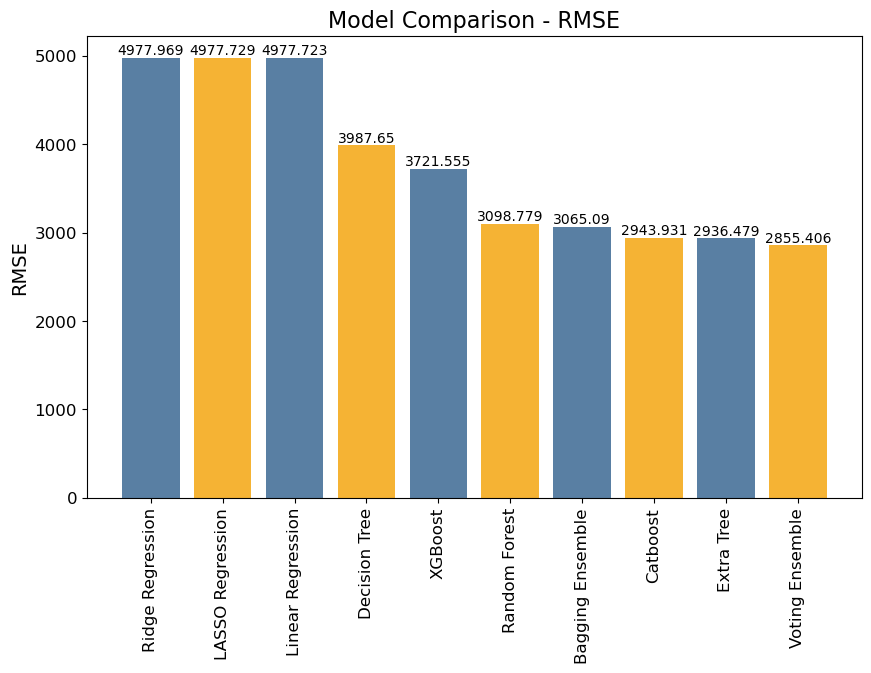

In [1837]:
# Plotting RMSE with vertical x-axis labels in descending order
plt.figure(figsize=(10, 6))
bars = plt.bar(rmse_sorted, rmse_values_sorted, color=['#597FA3', '#F5B334'])

plt.ylabel('RMSE', fontsize=14)  # Increase font size for y-axis label
plt.title('Model Comparison - RMSE', fontsize=16)  # Increase font size for title
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels and increase font size

# Increase font size for y-axis ticks
plt.yticks(fontsize=12)

# Add labels on top of the bars with increased font size
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10)

plt.show()

This graph confirms that the Voting Ensemble has the lowest RMSE and is thus the best model.

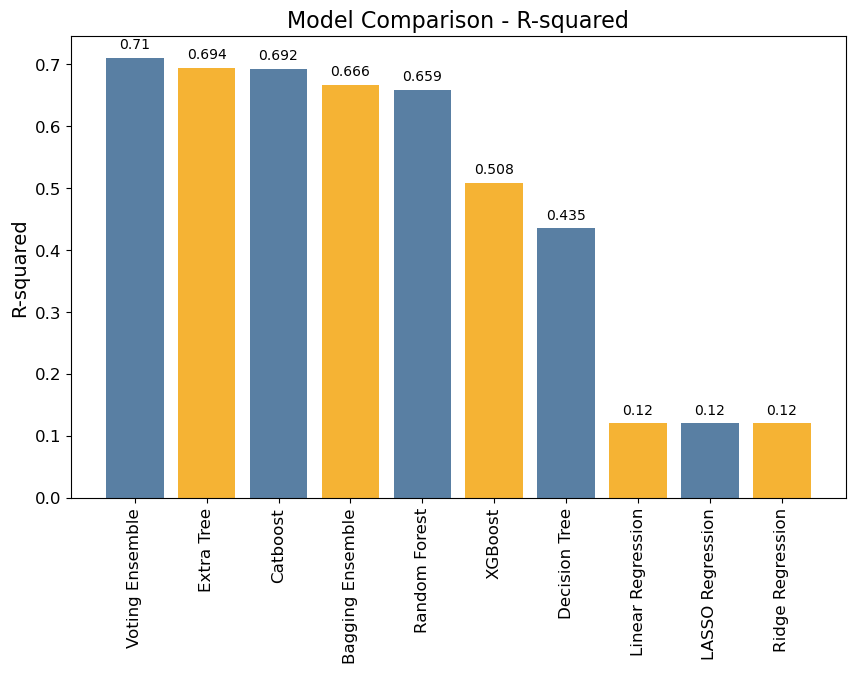

In [1838]:
# Plotting R-squared with vertical x-axis labels in descending order
plt.figure(figsize=(10, 6))
bars = plt.bar(r2_sorted, r2_values_sorted, color=['#597FA3', '#F5B334'])

plt.ylabel('R-squared', fontsize=14)  # Increase font size for the y-axis label
plt.title('Model Comparison - R-squared', fontsize=16)  # Increase font size for the title

# Increase font size for x-axis tick labels
plt.xticks(rotation=90, fontsize=12)

# Increase font size for y-axis tick labels
plt.yticks(fontsize=12)

# Increase font size for bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10)

plt.show()

This graph confirms that the Voting Ensemble has the highest R-squared and is thus the best model.

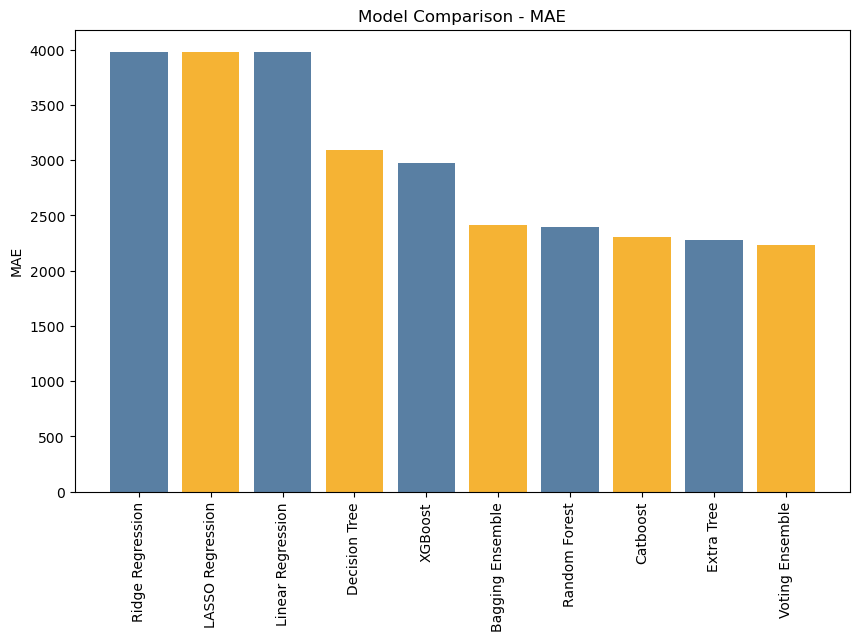

In [1839]:
# Plotting MAE with vertical x-axis labels in descending order
plt.figure(figsize=(10, 6))
plt.bar(mae_sorted, mae_values_sorted, color=['#597FA3', '#F5B334'])
plt.ylabel('MAE')
plt.title('Model Comparison - MAE')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

This graph confirms that the Voting Ensemble has the lowest MAE and is thus the best model.

#### 7.1.2 Important factors in the models used for teh Voring Ensemble:

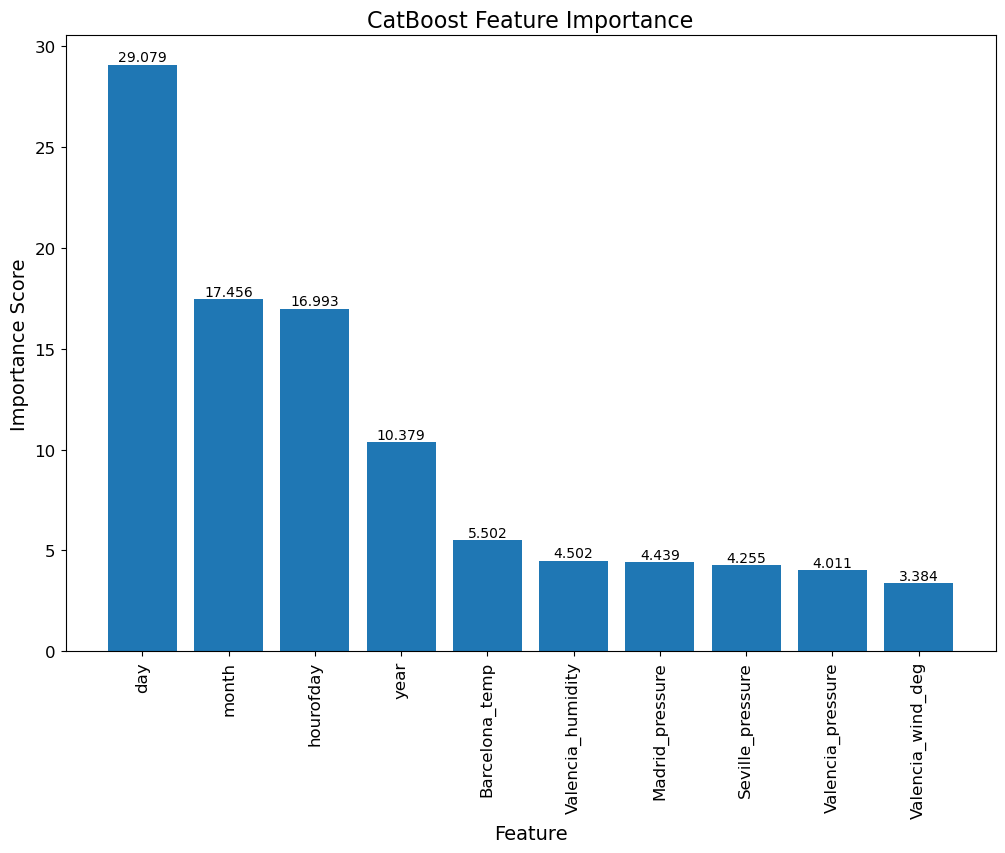

In [1840]:
# Get feature importance
feature_importance = catboost.get_feature_importance()

# Get feature names
feature_names = x_train.columns

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot feature importance with increased font size
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')

plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90, fontsize=12)  # Increase font size for x-axis labels
plt.yticks(fontsize=12)  # Increase font size for y-axis labels
plt.xlabel('Feature', fontsize=14)  # Increase font size for x-axis label
plt.ylabel('Importance Score', fontsize=14)  # Increase font size for y-axis label
plt.title('CatBoost Feature Importance', fontsize=16)  # Increase font size for title

# Add labels on top of the bars with increased font size
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10)

plt.show()

These are the top 10 most important factors of the Catboost model, a model with attrubutes 40% to the Voting Ensemble. We also used the results of this graph to determine our variables we were going to keep.

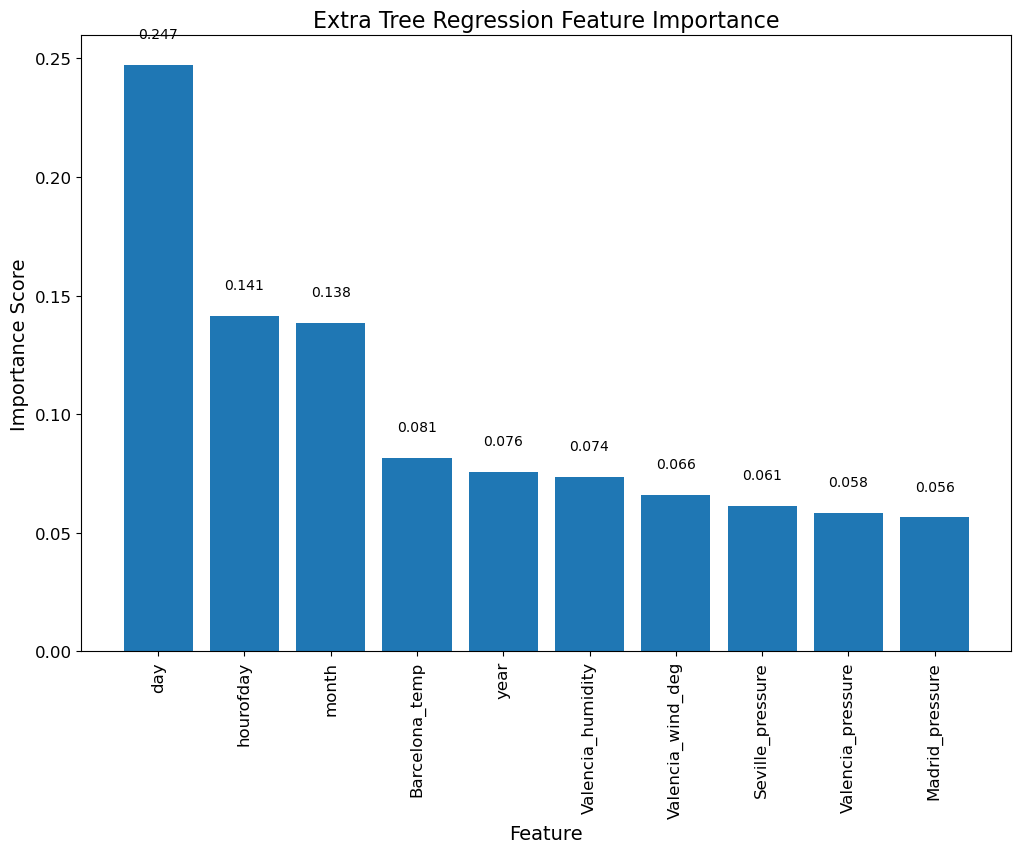

In [1841]:
# Get feature importance
feature_importance = extra_trees.feature_importances_

# Get feature names
feature_names = x_train.columns

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot feature importance with increased font size
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')

plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90, fontsize=12)  # Increase font size for x-axis labels
plt.yticks(fontsize=12)  # Increase font size for y-axis labels
plt.xlabel('Feature', fontsize=14)  # Increase font size for x-axis label
plt.ylabel('Importance Score', fontsize=14)  # Increase font size for y-axis label
plt.title('Extra Tree Regression Feature Importance', fontsize=16)  # Increase font size for title

# Add labels on top of the bars with increased font size
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10)

plt.show()

These are the top 10 most important factors of the Extra Tree model, a model with attrubutes 60% to the Voting Ensemble. 

In conclusion, the Voting Ensamle proved to be the best model and will be the model we use to predict values for DRS.

<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| We will discuss how the best performing model works. |

---

## Weighted Voting Ensemble:

##### **8.1. What is Weighted Voting Ensemble?**

A weighted voting ensemble is a type of ensemble learning where predictions from multiple models are combined, and each model's contribution is weighted based on its perceived reliability or accuracy. Instead of treating all models equally, we assign different weights to each model, allowing us to emphasize the influence of more accurate or specialized models.

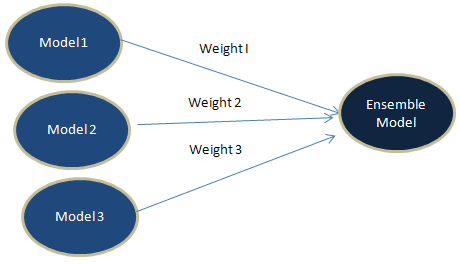

##### **8.2. Why Weighted Voting Ensemble?**

1. **Model Diversity:** The strength of ensemble methods lies in combining diverse models that capture different aspects of the data. By training various models, we leverage their unique strengths and perspectives.

2. **Addressing Model Biases:** Some models may have biases or limitations in certain scenarios. Weighted voting allows us to downplay the impact of less reliable models and focus more on those that consistently perform well.

3. **Handling Specialized Tasks:** In situations where certain models excel at specific tasks, assigning higher weights to these models ensures their opinions carry more weight when making predictions related to their area of expertise.

##### **8.3. Possible Reasons for Success:**

The success of the weighted voting ensemble in our case could be attributed to the following factors:

- **Effective Combination of Strengths:** By assigning weights, we ensured that the ensemble leveraged the strengths of each model, mitigating individual weaknesses.

- **Adaptability to Varied Scenarios:** The weighted approach allows the ensemble to adapt to different scenarios by dynamically adjusting the influence of each model based on its recent performance.

- **Robustness to Outliers:** Outliers or noisy predictions from individual models have less impact due to the weighted aggregation, leading to a more robust and reliable overall prediction.

In conclusion, the weighted voting ensemble demonstrated superior performance by intelligently combining the strengths of individual models. This approach provides a powerful tool for improving predictive accuracy and robustness in various machine learning tasks.

<a id="nine"></a>
## 9. Conclusion 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

| ⚡ Conclusion ⚡ |
| :--------------------------- |
| In this section, we will discuss the reasons why DRS should use our product as well as make some recommendations based on our analysis. |

### **DRS 'Load Shortfall Predictor' application mock-up:**

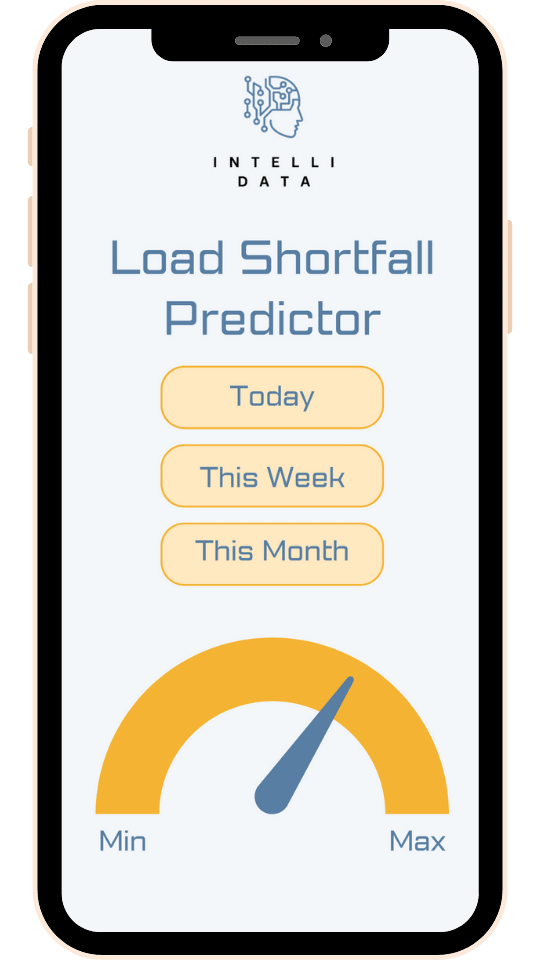

##### **9.1. Why should you choose Intelli Data?**

1. **Successful Deployment: Access to Our Model from Anywhere in the World**

   After successful deployment, users gain the convenience of accessing our energy forecasting model from any location globally. This ensures flexibility and availability, allowing users to make informed decisions and retrieve predictions irrespective of their geographical location.

2. **Real-time Monitoring: Provide Up-to-Date Predictions**

   Our system incorporates real-time monitoring, constantly updating predictions as new data becomes available. This feature ensures that users receive the most current and accurate forecasts. Real-time monitoring is crucial for adapting to rapidly changing conditions, enabling proactive decision-making in dynamic environments.

3. **Dynamic Resource Allocation: Resource Allocation Based on Forecasted Energy Demand**

   The forecasting model facilitates dynamic resource allocation by providing insights into anticipated energy demand. This information empowers organizations to allocate resources efficiently and proactively, optimizing energy distribution and ensuring that resources are aligned with forecasted demand. This proactive approach contributes to enhanced operational efficiency.

4. **Customizable Alerts: Timely Alerts and Notifications**

   The system is equipped with customizable alert features, allowing users to set specific thresholds or conditions. When these conditions are met or exceeded, timely alerts and notifications are triggered. Customizable alerts enable users to stay informed about critical events, deviations from predictions, or other significant changes, facilitating prompt responses and mitigating potential issues.

5. **User-Friendly Interface: Intuitive Dashboard for Easy Interpretation**

   The user-friendly interface includes an intuitive dashboard designed for easy interpretation of the model's outputs. This dashboard presents the forecasted data and relevant insights in a visually accessible format, making it user-friendly for individuals with varying levels of technical expertise. The intuitive design enhances the user experience, promoting efficient utilization of the model's capabilities for decision-making purposes.

##### **9.2. Recommendations to DRS based on our analysis:**

We recommend that Disaster Resilience Solution (DRS) consider investing in renewable energy sources, as suggested by our analysis. This strategic investment aims to complement their existing non-renewable sources, particularly during periods of load shortfall. Our analysis indicates that high load shortfalls frequently occur during daylight hours when there is reduced cloud coverage, elevated temperatures, and slower wind speeds. These conditions create an opportune environment for harnessing solar and wind power, making the integration of renewable energy sources a viable and effective solution for enhancing energy resilience and sustainability within DRS operations.

<a id="ten"></a>
## 10. Appendix A: Model Deployment
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

| ⚡ Description: Model Deployment ⚡ |
| :--------------------------- |
| In this section, we will engineer the data and train the model for deployment on AWS |


This section contains the very rudimentary data engineering, as well as model fitting for the model deployed on our web server. The model that we deployed on our web server was that of a random forrest regression. To start off, we read our data from the file:

In [1842]:
# Read the datasets into dataframes
df = pd.read_csv('df_train.csv')
df_test = pd.read_csv("df_test.csv")

The data cleaning was done in a very siple fashion, since we are less concerned with the predictive quality of our model than demonstrating the deployment of our model on a web server. First, we remove any features from our data that is not numeric:

In [1843]:
# Create a list of numerical datatypes
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Filter dataframe to contain only numerical values
newdf = df.select_dtypes(include=numerics)


Next, we drop our redundant index feature `Unnamed :0`, and our feature `Valencia_pressure`  since it contains missing values 

In [1844]:
# Remove troublesome features from dataset
newdf = newdf.drop('Valencia_pressure', axis = 'columns')
newdf = newdf.drop("Unnamed: 0", axis = 'columns')



Verifying that the features were dropped successfully:

In [1845]:
# Display remaining features in dataset
cols = list(newdf)
print(cols)

['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id', 'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']


Next, we split our data into the predictors and the target variable:

In [1846]:
# Split data into features and target
x_deploy = newdf.drop('load_shortfall_3h', axis = 'columns')
y_deploy = newdf['load_shortfall_3h']

# Verify the change was made
x_deploy

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
0              0.666667             0.0             0.666667   
1              0.333333             0.0             1.666667   
2              1.000000             0.0             1.000000   
3              1.000000             0.0             1.000000   
4              1.000000             0.0             1.000000   
...                 ...             ...                  ...   
8758           1.000000             0.0             2.666667   
8759           5.000000             0.0             2.000000   
8760           6.333333             0.4             7.333333   
8761           7.333333             0.2             7.333333   
8762           4.333333             0.0             7.000000   

      Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0            74.333333        64.000000           0.000000           1.000000   
1            78.333333        64.666667           0.000000           1.000000   
2            71.333333        64.333333           0.000000           1.000000   
3            65.333333        56.333333           0.000000           1.000000   
4            59.000000        57.000000           2.000000           0.333333   
...                ...              ...                ...                ...   
8758         89.000000        95.666667          56.666667           4.333333   
8759         82.000000        85.000000          26.666667           8.000000   
8760         67.666667        71.000000          63.333333           8.333333   
8761         67.666667        79.000000          63.333333           2.666667   
8762         78.666667        68.666667          20.000000           1.666667   

      Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  ...  \
0               0.000000       223.333333              6.333333  ...   
1               0.000000       221.000000              4.000000  ...   
2               0.000000       214.333333              2.000000  ...   
3               0.000000       199.666667              2.333333  ...   
4               0.000000       185.000000              4.333333  ...   
...                  ...              ...                   ...  ...   
8758           80.000000       226.666667              1.666667  ...   
8759           75.000000       220.000000              3.000000  ...   
8760           33.333333       283.333333              5.333333  ...   
8761           51.666667       220.000000              5.333333  ...   
8762           33.333333       156.666667              4.333333  ...   

      Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  \
0             281.013000       265.938000      281.013000       269.338615   
1             280.561667       266.386667      280.561667       270.376000   
2             281.583667       272.708667      281.583667       275.027229   
3             283.434104       281.895219      283.434104       281.135063   
4             284.213167       280.678437      284.213167       282.252063   
...                  ...              ...             ...              ...   
8758          282.150000       280.816667      281.276667       285.150000   
8759          287.816667       283.483333      287.483333       286.483333   
8760          290.483333       285.150000      289.816667       283.816667   
8761          288.150000       283.483333      287.523333       278.816667   
8762          287.816667       282.150000      287.483333       276.816667   

      Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  \
0      269.338615          281.013000       269.338615        274.254667   
1      270.376000          280.561667       270.376000        274.945000   
2      275.027229          281.583667       275.027229        278.792000   
3      281.135063          283.434104       281.135063        285.394000   
4      282.252063          284.213167       282.252063        285.513719   
...   

Finally, we fit a new random forrest regressor to the data, and save the model with the _pickle_ package:

In [1847]:
# Initiate a new random forest model
deploy_random_forest = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=RAND_STATE)

# Fit the model to the data
deploy_random_forest.fit(x_deploy,y_deploy)

# Choose a filename to save model as
model_save_path = 'RandomForrest_Deployment_VerySimple.pkl'

# Save model to specified filename
with open(model_save_path, 'wb') as file:
    pickle.dump(deploy_random_forest,file)